<a href="https://colab.research.google.com/github/gm965/iNeuron-Assignments/blob/main/Linear_Regression_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOSTON HOUSING PREDICTION - LINEAR REGRESSION APPROACH**

This notebook showcases various **Linear regression** approaches predicting housing price in Boston area. Following linear regression techniques has been explored:

1.   Multiple linear regression
2.   Polynomial regression
3.   Ridge regression
4.   Lasso regression
5.   ElasticNet
6.   Hyper-parameter tuning (GridSearchCV, RandomizedSearchCV, BayesSearchCV, Optuna)
8.   RidgeCV
9.   LassoCV
10.  ElasticNetCV

But before applying these techniques, necessary **Exploratory Data Analysis** has been performed to see the impact of individual features on target "MEDV" variable. 

In addition, necessary **scaling** and **transformation** techniques (like StandardScaler, MinMaxScaler, power transforms) is applied for scaling and transforming the data meant for regression. 

For evaluating the performance of individual regression model, **Root Mean Square Error (RMSE)** is choosen as evaluation metrics. 

###**Importing libraries and dataset**

In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 1.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


In [3]:
print(sklearn.__version__)

0.24.2


In [4]:
#Loading Boston data
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
#Check what other data are available in the boston dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#Details of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#Add the target column to "bos" dataframe
bos["MEDV"]=boston.target

In [8]:
#Sample rows
bos.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

###**EXPLORATORY DATA ANALYSIS (EDA) on *Boston* Data** 

In [9]:
#Shape of "bos" dataframe
print("The shape of dataframe: ",bos.shape)

The shape of dataframe:  (506, 14)


In [10]:
#Checking the datatype and check if any data missing is there?
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


As shown above, 
1.   there are a total of 506 entries in the dataframe with total 13 features and one target variable
2.   there is no missing data in the dataframe and 
2.   there is no object type features (categorical features) present in the data

In [11]:
#Ascertain if any null values
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
mask = bos.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,inplace=True)
print(missing_data)

         count_missing  perc_missing
CRIM                 0           0.0
ZN                   0           0.0
INDUS                0           0.0
CHAS                 0           0.0
NOX                  0           0.0
RM                   0           0.0
AGE                  0           0.0
DIS                  0           0.0
RAD                  0           0.0
TAX                  0           0.0
PTRATIO              0           0.0
B                    0           0.0
LSTAT                0           0.0
MEDV                 0           0.0


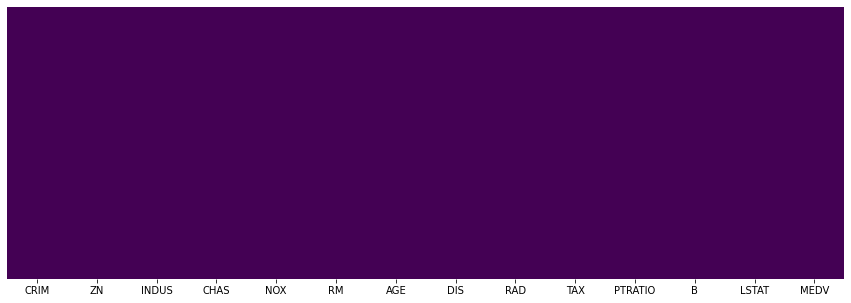

In [13]:
# Checking the null values using heatmap
# There is any null values are occupyed here
plt.figure(figsize=(15,5))
sns.heatmap(bos.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [14]:
#Descriptive statistics
bos.describe().T

count        mean         std  ...        50%         75%       max
CRIM     506.0    3.613524    8.601545  ...    0.25651    3.677083   88.9762
ZN       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
INDUS    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
CHAS     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
NOX      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
RM       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
AGE      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
DIS      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
RAD      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
TAX      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
PTRATIO  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
B        506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000
LSTAT    506.0   12.653063    7.141062  ...   11.36000   16.955000   37.9700
MEDV     506.0   22.532806    9.197104  ...   21.20000   25.000000   50.0000

[14 rows x 8 columns]

In [15]:
#Checking for unique values present in each feature
bos.iloc[:,:-1].nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

As shown above,  

1.   "CHAS" features has only two unique values (0 & 1). This data is a byproduct of dummy variable creation which is already done on the data
2.   RAD has 9 distinct values and may be a byproduct of label encoder
3.   ZN has 26 distinct values and may be a byproduct of label encoder






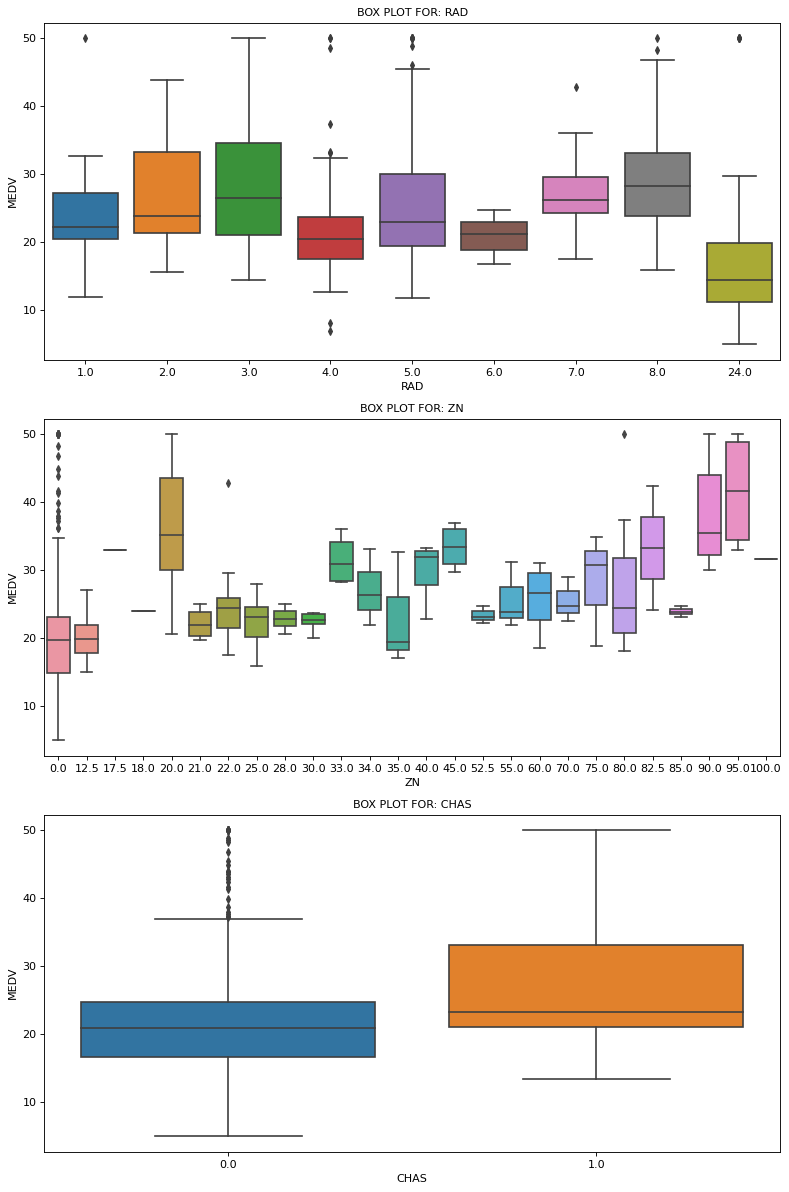

In [16]:
# Box plots of above Categorical variables with respect to "MEDV" Target Variable
CategoricalColsList=['RAD', 'ZN', 'CHAS']

plt.figure(figsize=(10,15),dpi = 80)

for i in range(len(CategoricalColsList)):
  col_idx = i+1
  ax1 = plt.subplot(3, 1, col_idx)
  sns.boxplot(x = CategoricalColsList[i], y = 'MEDV', data = bos )
  ax1.set_title("BOX PLOT FOR: "+ str(CategoricalColsList[i]),fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

**Interpreting Box plot:**

These plots gives an idea about the data distribution of target variable (in  Y-axis) for each of the category variable (in the X-Axis).

If the distribution looks similar for each distinct value under a category(i.e. the boxes are more or less in the same line), that means the categorical variable has NO/little effect on the target variable. Hence, the categorical variable and target variable are not correlated to each other.

On the other hand, if the distribution is different for each distinct value under a category(i.e. the boxes are not in same line!), then it means that these categorical and target variables are correlated.

As shown above, the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below:

**ANOVA TEST**

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

H0: *There is NO RELATIONSHIP between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)*

H1: *H0 is FALSE*

ANOVA Test result: Probability of H0 being true

In [17]:
from scipy.stats import f_oneway
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [18]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAD', 'ZN', 'CHAS']
FunctionAnova(inpData=bos, 
              TargetVariable='MEDV', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
ZN is correlated with MEDV | P-Value: 2.1871940303958843e-17
CHAS is correlated with MEDV | P-Value: 7.390623170520815e-05


['RAD', 'ZN', 'CHAS']

The results of ANOVA confirm our visual analysis using box plots above. All the categorical variables are correlated with the Target "MEDV" variable. This is something we guessed by looking at the box plots!

####**Visualising features**

The real world data is always contaminated with noise and hence it is difficult to get the distribution of any variable to be perfect Gaussian normal. Either the distribution will be skewed or bimodal or exponential in nature. 

> In right (positive) skewed scenario: mu > median

> In left (negative) skewed scenario: mu < median

However this is not the only indicator, even if mu and sigma are nearly equal, the proportion must be symmetrical around mean value. 

In above descriptive statistics, the distribution of **RM** is having a near normal distribuion and rest all are non-normal. 

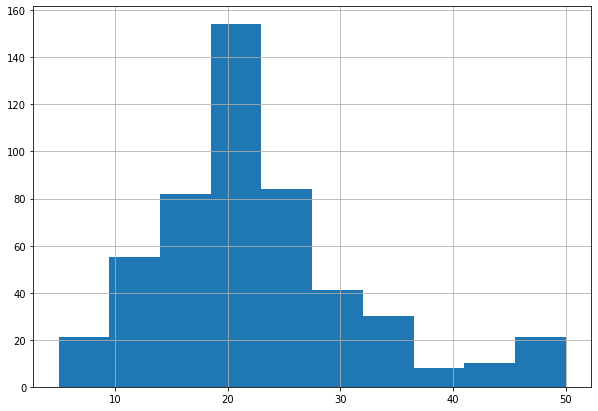

In [19]:
#Distribution of target variable "MEDV"
#np.log(bos['MEDV']).hist() #Log distribution
bos["MEDV"].hist(figsize=(10,7))
plt.show()

As shown above, there are few extreme values (which if untreated may impact the regression modeling and results)

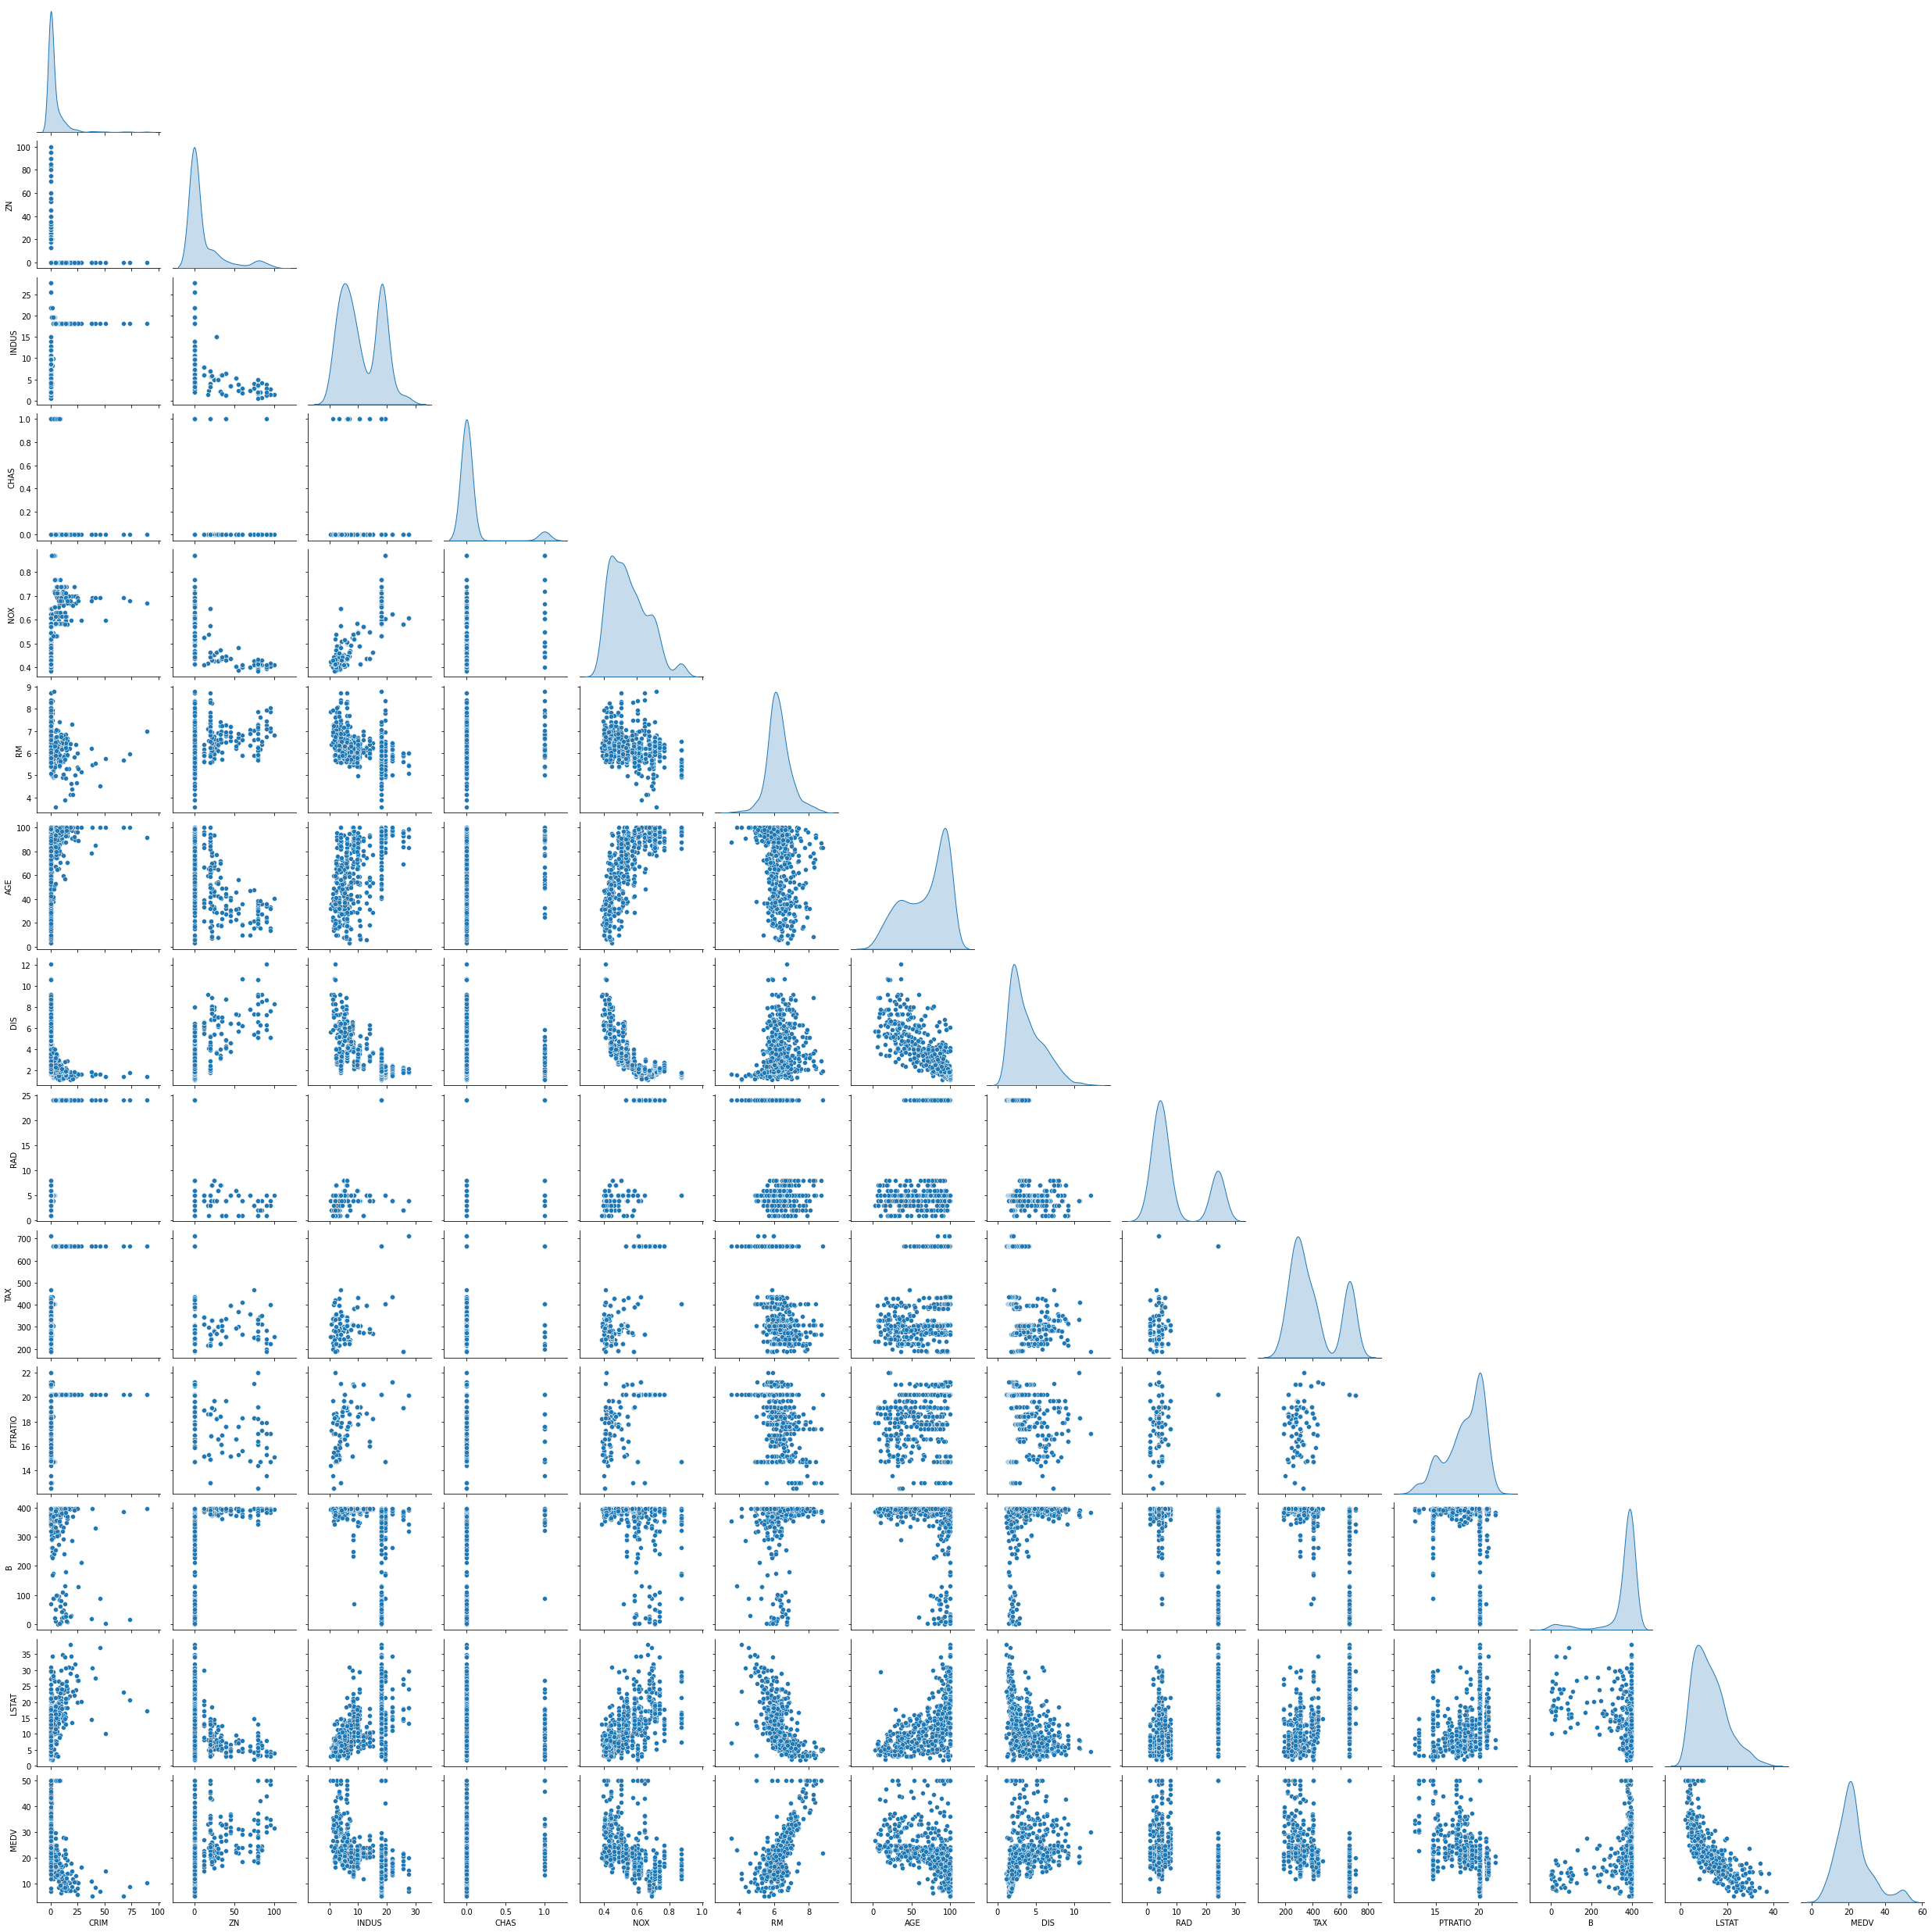

In [20]:
#Relationship between variables
import seaborn as sns
# Relationships between features
sns.pairplot(bos,diag_kind='kde', corner=True)

It is observed from above plot (by looking at diagonals only):

1.   Variables having exponential distribution: ***CRIM, ZN, CHAS, DIS, B*** 
2.   Features having bimodal distribution: ***INDUS, RAD, TAX***
3.   Features having skewed Gaussian distribution: ***NOX, LSTAT, AGE, PTRATIO***
4.   Features having normal distribution: ***RM***

However, this is only the visual interpretation. Let's check individual features whether they are from a normal distribution by:

1.   Performing skewness and Kurtosis test
2.   conducting normality test (Using QQ plot and other hypothese testing like Shapiro Wilk/KS test).

**Identifying individual features probable distribution**

We know that in the regression analysis the response variable should be normally distributed to get better prediction results. So essentially, skew correction for the independent variables is required before modeling. Lower the skewness better the result.

In statistics, *skewness* and *kurtosis* are two ways to measure the shape of a distribution.

**Skewness** is a measure of the asymmetry of a distribution. This value can be positive or negative.

A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values.
A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values.
A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

**Kurtosis** is on the other hand is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

The **kurtosis** of a normal distribution is 3.
If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.


In [21]:
from scipy.stats import skew, kurtosis

#function for skewness and kurtosis
def df_skew_kurtosis(df):
  """ 
  This will list down skewness and kurtosis of all features. This will help in ascertaining whether a feature is normal or non-normal.
          Input:    This function accepts any dataframe as an input.

          output:   normal_feature_details - List down Skewness and Kurtosis of features having near Gaussian distribution.
                    dist_characteristics_df - List down Skewness and Kurtosis of all features.

  """
  
  dist_characteristics = {}
  dist_characteristics["Feature"]=[]
  dist_characteristics["Skew"] = []
  dist_characteristics["Skew interpretation"] = []
  dist_characteristics["Kurtosis"] = []
  dist_characteristics["Kurtosis interpretation"]=[]
  numeric_columns = df.select_dtypes('number').columns
  for col in numeric_columns:
    dist_characteristics["Feature"].append (col)
    dist_characteristics["Skew"].append(round(skew(df[col]),2))
    dist_skew = round(skew(df[col]),2)
    if abs(dist_skew) <= 0.10: # though 0 is the desired value for normality, we set a cushion around 0.1 value 
      dist_characteristics["Skew interpretation"].append("~ Normal")
    elif dist_skew >= 0.1:
      dist_characteristics["Skew interpretation"].append("Positive skew (longer tail on right side of distribution)")
    else:
      dist_characteristics["Skew interpretation"].append("Negative skew (longer tail on left side of distribution)")
    dist_characteristics["Kurtosis"].append(round(kurtosis(df[col]),2))
    dist_kurtosis = round(kurtosis(df[col]),2)
    if dist_kurtosis >= 0.95 * 3 and dist_kurtosis <1.05 * 3:
      dist_characteristics["Kurtosis interpretation"].append("~ normal")
    elif dist_kurtosis < 0.95 * 3:
      dist_characteristics["Kurtosis interpretation"].append("Playkurtic (tends to produce fewer and less extreme outliers than the normal distribution)")
    else:
      dist_characteristics["Kurtosis interpretation"].append("Leptokurtic (tends to produce more outliers than the normal distribution)")

  dist_characteristics_df = pd.DataFrame.from_dict(dist_characteristics)
  normal_feature_details = pd.DataFrame()
  if len(dist_characteristics_df.loc[(abs(dist_characteristics_df['Skew'])<=0.5) | ((dist_characteristics_df['Kurtosis'] >= 0.95*3) & (dist_characteristics_df['Kurtosis']< 1.05*3))]) > 0:
    normal_feature_details = dist_characteristics_df.loc[(abs(dist_characteristics_df['Skew'])<=0.5) | ((dist_characteristics_df['Kurtosis'] >= 0.95*3) & (dist_characteristics_df['Kurtosis']< 1.05*3))]
  
  return normal_feature_details, dist_characteristics_df

normal_feat, all_feat = df_skew_kurtosis(bos)
all_feat

Feature  Skew  ... Kurtosis                            Kurtosis interpretation
0      CRIM  5.21  ...    36.75  Leptokurtic (tends to produce more outliers th...
1        ZN  2.22  ...     3.98  Leptokurtic (tends to produce more outliers th...
2     INDUS  0.29  ...    -1.23  Playkurtic (tends to produce fewer and less ex...
3      CHAS  3.40  ...     9.53  Leptokurtic (tends to produce more outliers th...
4       NOX  0.73  ...    -0.08  Playkurtic (tends to produce fewer and less ex...
5        RM  0.40  ...     1.86  Playkurtic (tends to produce fewer and less ex...
6       AGE -0.60  ...    -0.97  Playkurtic (tends to produce fewer and less ex...
7       DIS  1.01  ...     0.47  Playkurtic (tends to produce fewer and less ex...
8       RAD  1.00  ...    -0.87  Playkurtic (tends to produce fewer and less ex...
9       TAX  0.67  ...    -1.14  Playkurtic (tends to produce fewer and less ex...
10  PTRATIO -0.80  ...    -0.29  Playkurtic (tends to produce fewer and less ex...
11        B -2.88  ...     7.14  Leptokurtic (tends to produce more outliers th...
12    LSTAT  0.90  ...     0.48  Playkurtic (tends to produce fewer and less ex...
13     MEDV  1.10  ...     1.47  Playkurtic (tends to produce fewer and less ex...

[14 rows x 5 columns]

**QQ Plot**

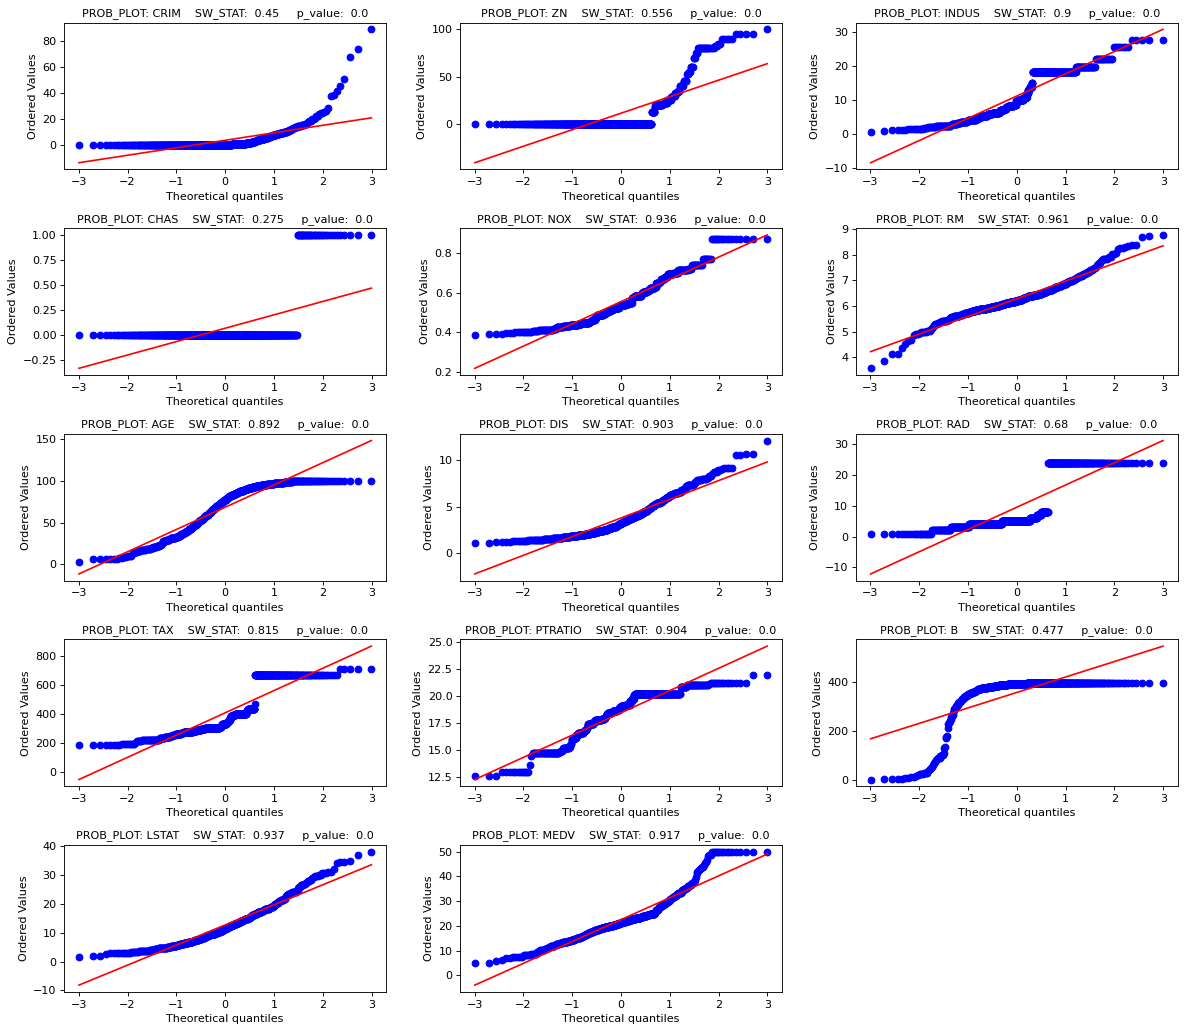

In [22]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import kstest, norm
from scipy.stats import shapiro

ncols = 3
nrows = (len(bos.columns)//ncols)+1

plt.figure(figsize=(15,13),dpi = 80)

for i in range(len(bos.columns)):
  #ks_statistic, p_value = kstest(bos.iloc[:,i], 'norm')
  #print(ks_statistic, p_value)
  shap = shapiro(bos.iloc[:,i])
  col_idx = i+1
  ax1 = plt.subplot(nrows, ncols, col_idx)
  res = stats.probplot(bos.iloc[:,i], plot=plt)
  #ax1.set_title("Probplot: "+ str(bos.columns[i]) + ", KS_STAT:" + str(round(ks_statistic,3))+ ", p_value:" + str(round(p_value,3)))
  ax1.set_title("PROB_PLOT: "+ str(bos.columns[i]) + "    SW_STAT:  " + str(round(shap[0],3))+ "     p_value:  " + str(round(shap[1],3)),fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

**Interpreting QQ Plot result**

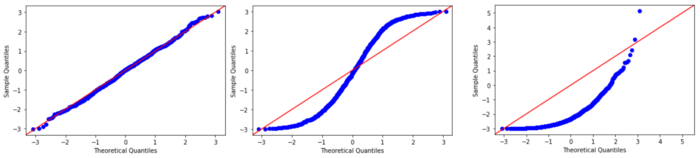



As seen in the picture, the points on a normal QQ Plot follow a straight line, whereas other distributions deviate strongly.
The uniform distribution has too many observations in both extremities (very high and very low values).
The exponential distribution has too many observations on the lower values, but too little in the higher values.


The **shapiro**() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value. 

Interpretation:

1.   If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
2.   If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

As shown above, the **RM** variable which seems to have a normal distribution fails both in QQ plot as well as other normality hypothesis test. Rest other REJECTED the null hypothesis that distribution is normal.

**Identifying a distribution type**

We will try to approximate individual features using the following distributions and see which distribution performs the best in terms of Chi-square Statistics -

`# dist_names = ['weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang']`

In [23]:
# Search spectrum of candidate distributions 
dist_names = ['weibull_min','norm','weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang']

In [24]:
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler

def standarise(df,column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [25]:
#Function to identify duplicate in a list
def checkDuplicate(List):
    duplicate={}
    for i in List:
            ## checking whether the item is already present in dictionary or not
            ## increasing count if present
            ## initializing count to 1 if not present
        duplicate[i]=duplicate.get(i,0)+1
    return [k for k,v in duplicate.items() if v>1]

#Function to fit data to a most fitted distribution
def get_most_fitted_distribution(df,column,pct,pct_lower):
    """
    This function will identify two best distributions that best fits the "column" data of "df" dataframe

    Output:
    best_fit_distribution1, best_fit_distribution2

    """
    y_std,size,y_org = standarise(df,column,pct,pct_lower)

    params_list = []
    
    chi_square_statistics = []
    # create 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.round(np.percentile(y_std, percentile_bins),8)
    """
    #added this section separately to handle duplicacy in percentile_cutoffs array
    if len(checkDuplicate(percentile_cutoffs))>0:
      arr_list = percentile_cutoffs.tolist()
      final_list = []
      for i in range(len(arr_list)):
        if i == 0:
          final_list.append(arr_list[i])
        elif arr_list[i]==arr_list[i-1]:
          final_list.append(final_list[i-1]+np.random.rand())
        else:
          final_list.append(arr_list[i])
      percentile_cutoffs = np.array(final_list)
    """
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        #print("{}\n{}\n".format(dist, param)) #Enable this for finding best parameters
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)
        params_list.append(param) #


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results['Parameters'] = params_list #
    #results['params'] = param
    results.sort_values(['chi_square'], inplace=True)

    return results.iloc[0:2,0:3:2]

In [26]:
feature_wise_most_fitted_distribution = pd.DataFrame(columns = ["Col_name", "Best_distribution1","Dist1_parameter","Best_distribution2","Dist2_parameter"])
numeric_columns = bos.select_dtypes('number').columns
temp_df = pd.DataFrame()
for col in numeric_columns:
  temp_df = get_most_fitted_distribution(bos,col,0.99,0.01)
  to_append = [col, temp_df.iloc[0,0], temp_df.iloc[0,1],temp_df.iloc[1,0],temp_df.iloc[1,1]]
  a_series = pd.Series(to_append, index = feature_wise_most_fitted_distribution.columns)
  feature_wise_most_fitted_distribution = feature_wise_most_fitted_distribution.append(a_series, ignore_index=True)

feature_wise_most_fitted_distribution

Col_name  ...                                    Dist2_parameter
0      CRIM  ...  (2.305344150273796, -0.5279962452501161, 0.068...
1        ZN  ...       (-2.870879740444849e-17, 0.9999999999999997)
2     INDUS  ...  (1.563500983201404, -1.112230269488976e-16, 1....
3      CHAS  ...                       (2.870879740444849e-17, 1.0)
4       NOX  ...  (1.5361290056381152, -1.422299105335658, 0.925...
5        RM  ...  (35.03365592553503, -5.884523426876141, 0.1679...
6       AGE  ...  (0.999999991524937, -2.5183443156565515, 3.651...
7       DIS  ...  (1.6546733899123278, -2.8779369507492134e-17, ...
8       RAD  ...  (0.9459410966781363, -1.0421178394273896, 0.67...
9       TAX  ...  (0.6994784604824098, -1.5128261736161075, 1.20...
10  PTRATIO  ...  (1.2627090621799937, 1.3222210204621572, 1.418...
11        B  ...  (407323688.0805938, -150093611.08509284, 15009...
12    LSTAT  ...  (1.4300055909246114, -1.4585843286627727, 1.60...
13     MEDV  ...  (0.31927336237428616, -3.0169095372473556, 2.8...

[14 rows x 5 columns]

###**Feature transformation**

One of the basic assumption in Linear regression is that predictor variables must have Gaussian distribution. So in this step, care has been taken to transform all features to make them Gaussian in case they are non-Gaussian.



In [27]:
pd.options.display.float_format = '{:,.2f}'.format

In [28]:
X = bos.drop("MEDV", axis = 1)
y = bos["MEDV"]

In [29]:
#Method 1 (Plotting histogram of individual columns)
#This method will generate individual variable's distribution plot (not that efficient when trying to look all variables distibution plot at a glance)
"""
for i, col in enumerate(bos.columns):
    plt.figure(i)
    sns.distplot(bos[col])
"""

'\nfor i, col in enumerate(bos.columns):\n    plt.figure(i)\n    sns.distplot(bos[col])\n'

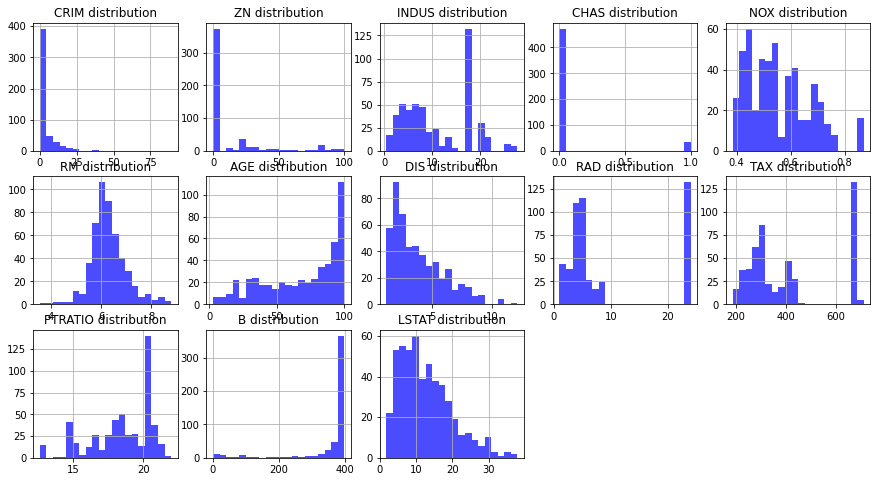

In [30]:
#Method 2 (Functional approach for plotting histogram of individual columns)
def histograms_plot(df, features, rows, cols):
  fig=plt.figure(figsize=(15,8))
  for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='blue',alpha=0.7)
    ax.set_title(feature+" distribution",color='black')

  plt.show()

col_plots = 5
row_plots = (X.shape[1]//col_plots)+1
histograms_plot(X,X.columns,row_plots,col_plots)


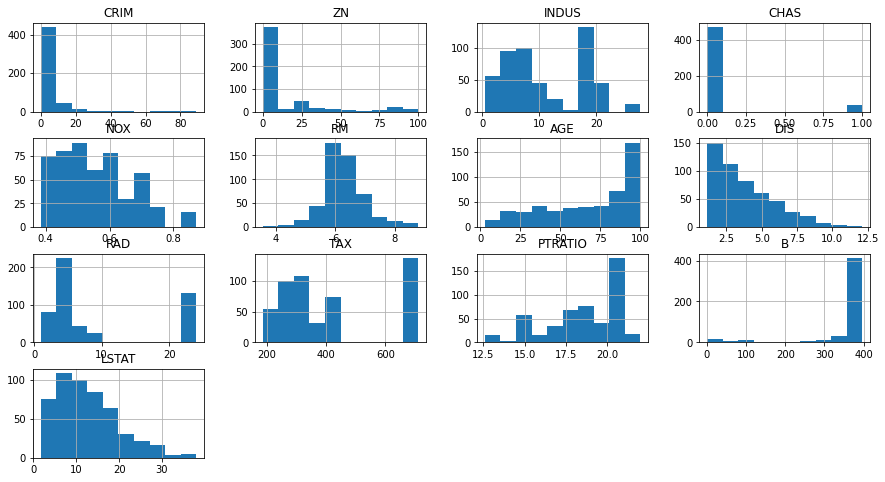

In [31]:
#Method 3
X.hist(figsize=(15,8))
plt.show()

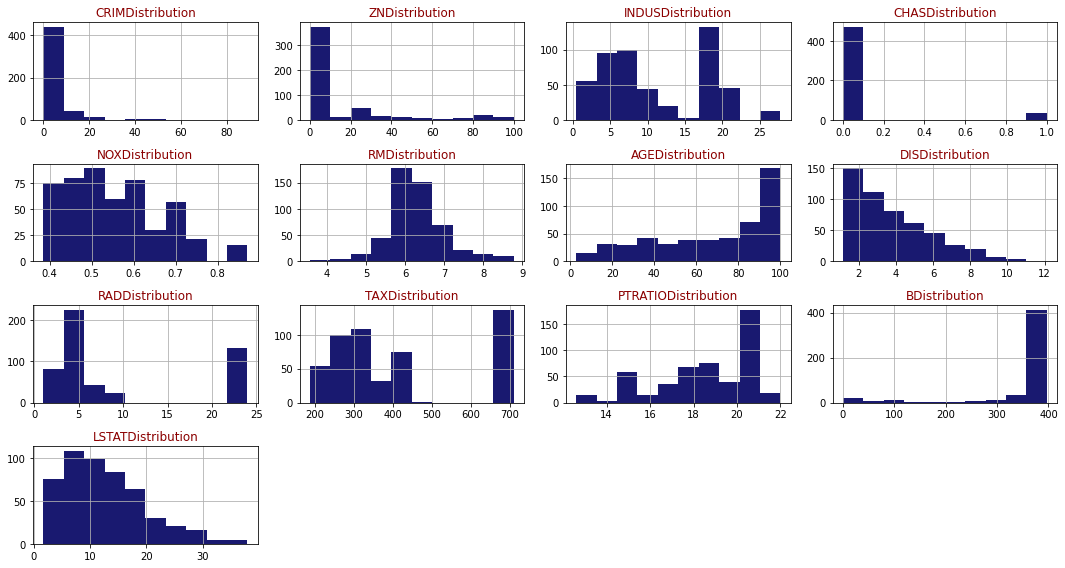

In [32]:
#Method 3
def draw_plots(df, var, rows, cols):
  fig = plt.figure(figsize = (15,8))
  for i, f in enumerate(var):
    ax = fig.add_subplot(rows,cols,i+1)
    df[f].hist(ax = ax, facecolor = 'midnightblue')
    ax.set_title(f+"Distribution",color="DarkRed")
  fig.tight_layout()
  plt.show()

draw_plots(X,X.columns,4,4)  

In [33]:
#Method to check whether any column has a negative value or not (This  is essentially required when trying to transform data using Box-cox transformation)
print((bos < 0).any().any())
print((bos < 0).values.any())

False
False


####Box-Cox Transformation

In [34]:
#Using Box-coz transform
from sklearn.preprocessing import PowerTransformer

In [35]:
#This section is not working as (ValueError: The Box-Cox transformation can only be applied to strictly positive data)
"""
pt = PowerTransformer(method='box-cox')
data_tf = pt.fit_transform(X)
# convert the array back to a dataframe
bos_tf = pd.DataFrame(data_tf,X.columns)
histograms_plot(bos_tf,bos_tf.columns,row_plots,col_plots)
"""

"\npt = PowerTransformer(method='box-cox')\ndata_tf = pt.fit_transform(X)\n# convert the array back to a dataframe\nbos_tf = pd.DataFrame(data_tf,X.columns)\nhistograms_plot(bos_tf,bos_tf.columns,row_plots,col_plots)\n"

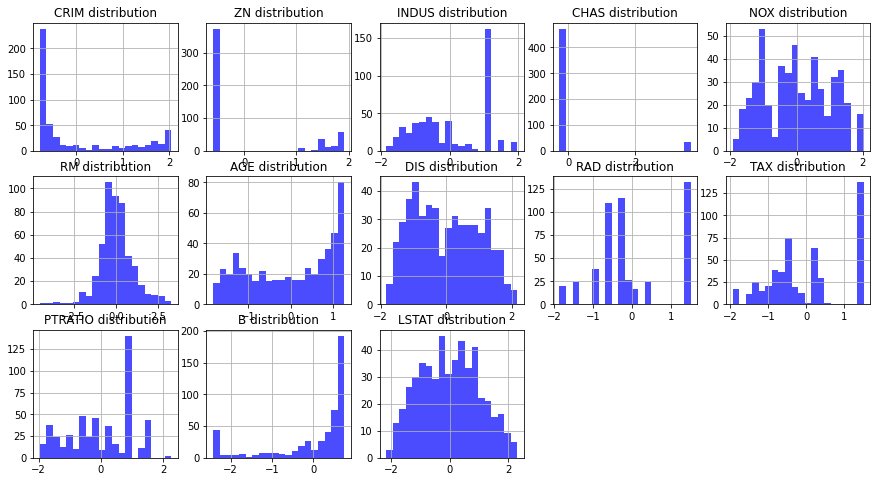

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_bc = pipeline.fit_transform(X)
df_bc = pd.DataFrame(data_bc,columns=X.columns)
histograms_plot(df_bc,df_bc.columns,row_plots,col_plots)

####Yeo-Johnson Transformation

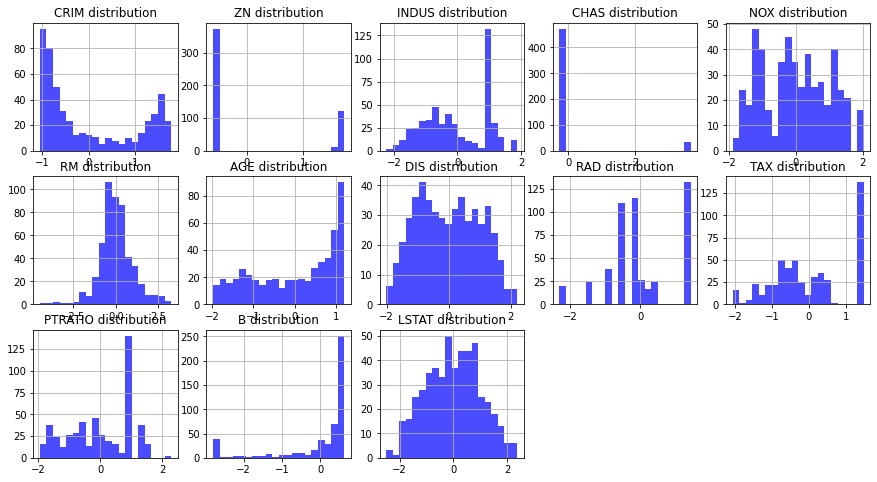

In [37]:
# perform a yeo-johnson transform of the dataset
pt_yj = PowerTransformer(method='yeo-johnson')
data_yj = pt_yj.fit_transform(X)
df_yj = pd.DataFrame(data_yj,columns=X.columns)
histograms_plot(df_yj,df_yj.columns,row_plots,col_plots)

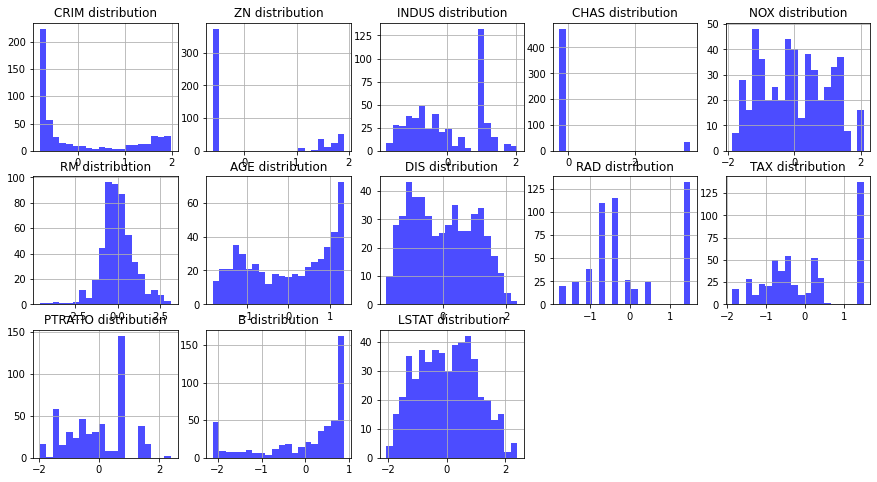

In [38]:
from sklearn.preprocessing import StandardScaler
# perform a yeo-johnson transform of the dataset after performing StandardScaling
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_yjs = pipeline.fit_transform(X)
df_yjs = pd.DataFrame(data_yjs,columns=X.columns)
histograms_plot(df_yjs,df_yjs.columns,row_plots,col_plots)

In [39]:
# perform a Robust Scaler transform of the dataset (Not worthy for this case study)
"""
from sklearn.preprocessing import RobustScaler
pt_rs = RobustScaler()
data_rs = pt_rs.fit_transform(X)
df_rs = pd.DataFrame(data_rs,columns=X.columns)
histograms_plot(X,X.columns, row_plots, col_plots)
histograms_plot(df_rs,df_rs.columns,row_plots,col_plots)
"""

'\nfrom sklearn.preprocessing import RobustScaler\npt_rs = RobustScaler()\ndata_rs = pt_rs.fit_transform(X)\ndf_rs = pd.DataFrame(data_rs,columns=X.columns)\nhistograms_plot(X,X.columns, row_plots, col_plots)\nhistograms_plot(df_rs,df_rs.columns,row_plots,col_plots)\n'

In [40]:
# perform a Unit Vector Scaler/Normalizer (No change in shape and hence not worthy for this case study)
"""
Normalization is the process of scaling individual samples to have unit norm. 
The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! 
Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one
"""

"""
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled = scaler.fit_transform(X)
df_uv = pd.DataFrame(df_scaled,columns=X.columns)
histograms_plot(df_uv,df_uv.columns,row_plots,col_plots)
"""

"\nfrom sklearn.preprocessing import Normalizer\nscaler = Normalizer(norm = 'l2')\n# norm = 'l2' is default\n\ndf_scaled = scaler.fit_transform(X)\ndf_uv = pd.DataFrame(df_scaled,columns=X.columns)\nhistograms_plot(df_uv,df_uv.columns,row_plots,col_plots)\n"

####Quantile Transformer

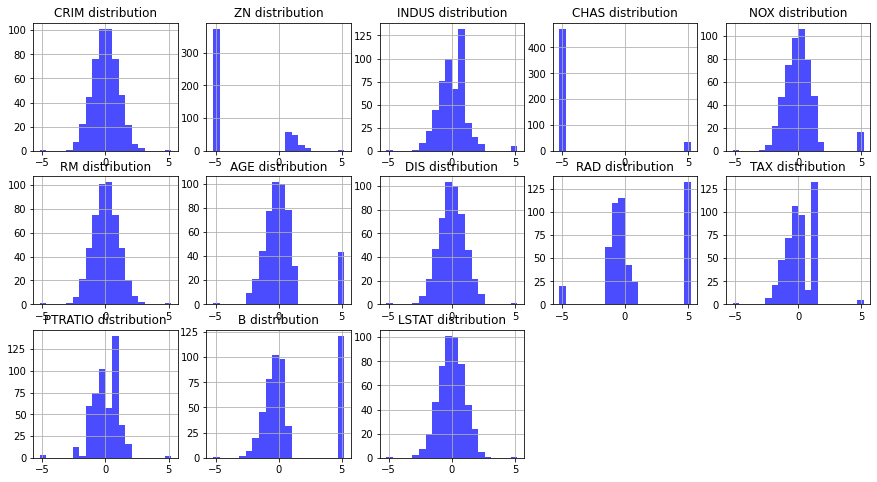

In [41]:
#Quantile transformer
from sklearn.preprocessing import QuantileTransformer 
transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
X_qt= transformer.fit_transform(X)
df_qt = pd.DataFrame(X_qt,columns=X.columns)
histograms_plot(df_qt,df_qt.columns,row_plots,col_plots)

####Discrete Transformer

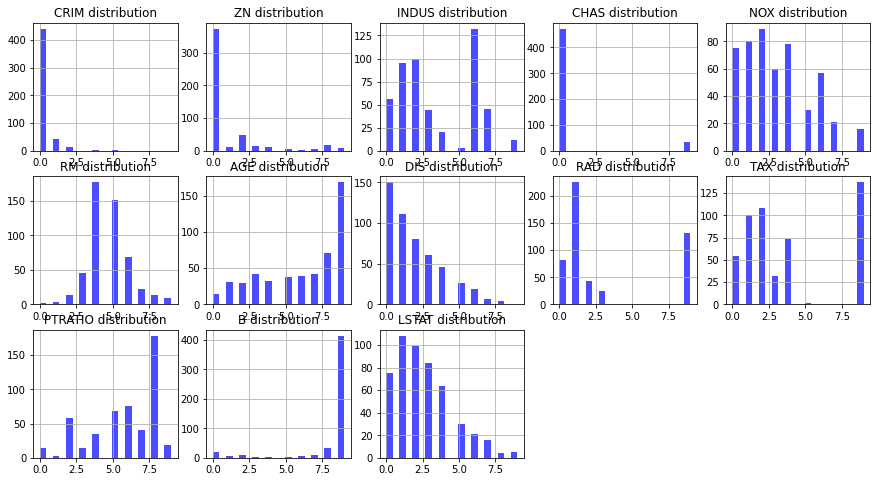

In [42]:
#Discrete Transformer
from sklearn.preprocessing import KBinsDiscretizer 
dt = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_dt = dt.fit_transform(X)
df_dt = pd.DataFrame(X_dt,columns=X.columns)
histograms_plot(df_dt,df_dt.columns,row_plots,col_plots)

####Using ColumnTransformer API

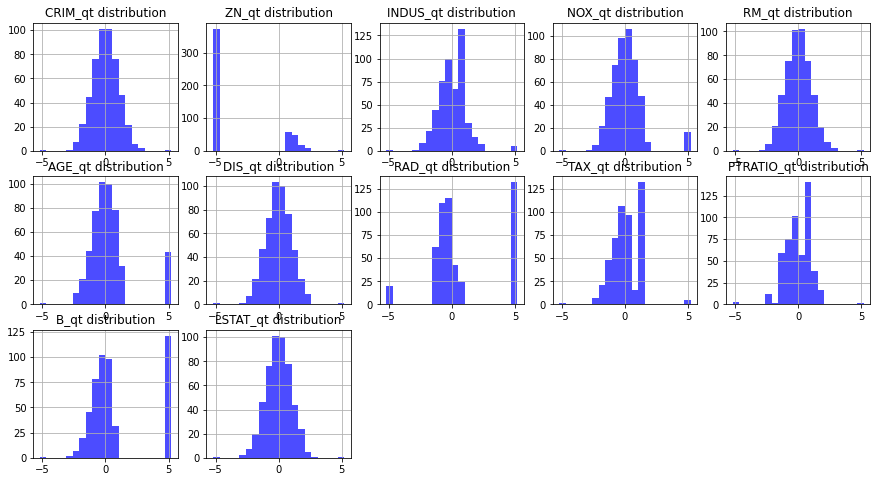

In [43]:
#Using ColumnTransformer for customised transformation feature wise (refer B_qt column transformation)
#in first it is QuantileTransformer
#in second, it is Yeo-Johnson power transformer
from sklearn.compose import ColumnTransformer
column_trans = ColumnTransformer(
    [('CRIM_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['CRIM']),
     ('ZN_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['ZN']),
     ('INDUS_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['INDUS']),
     ('NOX_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['NOX']),
     ('RM_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['RM']),
     ('AGE_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['AGE']),
     ('DIS_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['DIS']),
     ('RAD_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['RAD']),
     ('TAX_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['TAX']),
     ('PTRATIO_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['PTRATIO']),
     ('B_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['B']),
     #('B_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['B']),
     ('LSTAT_qt', QuantileTransformer(n_quantiles=100, output_distribution='normal'), ['LSTAT']),
    ])

transformed_ct = column_trans.fit_transform(X)
new_cols = ['CRIM_qt', 'ZN_qt', 'INDUS_qt', 'NOX_qt', 'RM_qt', 'AGE_qt', 'DIS_qt','RAD_qt','TAX_qt','PTRATIO_qt', 'B_qt', 'LSTAT_qt']

X_ct = pd.DataFrame(transformed_ct, columns=new_cols)
pd.concat([X_ct], axis = 1)
histograms_plot(X_ct,X_ct.columns,row_plots,col_plots)

In [44]:
#Applying Yeo-Johnson transformation to each column using ColumnTransformer
"""
column_trans = ColumnTransformer(
    [('CRIM_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['CRIM']),
     ('ZN_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['ZN']),
     ('INDUS_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['INDUS']),
     ('NOX_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['NOX']),
     ('RM_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['RM']),
     ('AGE_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['AGE']),
     ('DIS_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['DIS']),
     ('RAD_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['RAD']),
     ('TAX_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['TAX']),
     ('PTRATIO_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['PTRATIO']),
     ('B_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['B']),
     ('LSTAT_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['LSTAT']),
    ])

transformed_yj = column_trans.fit_transform(X)
new_cols = ['CRIM_yj', 'ZN_yj', 'INDUS_yj', 'NOX_yj', 'RM_yj', 'AGE_yj', 'DIS_yj','RAD_yj','TAX_yj','PTRATIO_yj', 'B_yj', 'LSTAT_yj']

X_CT_yj = pd.DataFrame(transformed_yj, columns=new_cols)
pd.concat([X_CT_yj], axis = 1)
histograms_plot(X_CT_yj,X_CT_yj.columns,row_plots,col_plots)
"""

"\ncolumn_trans = ColumnTransformer(\n    [('CRIM_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['CRIM']),\n     ('ZN_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['ZN']),\n     ('INDUS_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['INDUS']),\n     ('NOX_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['NOX']),\n     ('RM_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['RM']),\n     ('AGE_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['AGE']),\n     ('DIS_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['DIS']),\n     ('RAD_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['RAD']),\n     ('TAX_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['TAX']),\n     ('PTRATIO_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['PTRATIO']),\n     ('B_yj', PowerTransformer(method='yeo-johnson', standardize=True), ['B']),\n     ('LSTAT_yj', Pow

**Transforming Target variable (MEDV)**

It is observed earlier that MEDV (the target variable) is not proper Gaussian as it has some extreme values and hence there is a need to do the transformation to see it we can fit a Gaussian distribution to it. In this case Quantile transformation technique is used to check whether the resulting transformed data is Gaussian.

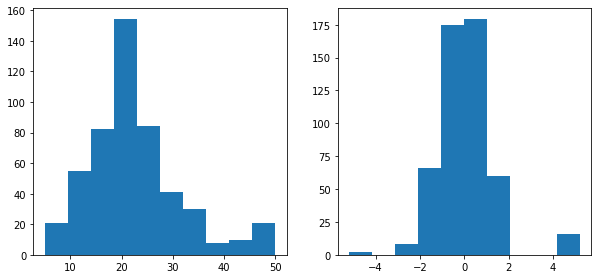

In [45]:
#from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
no = qt.fit_transform(bos[["MEDV"]])

# Plot histograms to see before vs after.
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.hist(bos["MEDV"])
plt.subplot(2, 2, 2)
plt.hist(no)
plt.show()

**Bivariate Analysis**

Correlation between predictor variables and target variables.

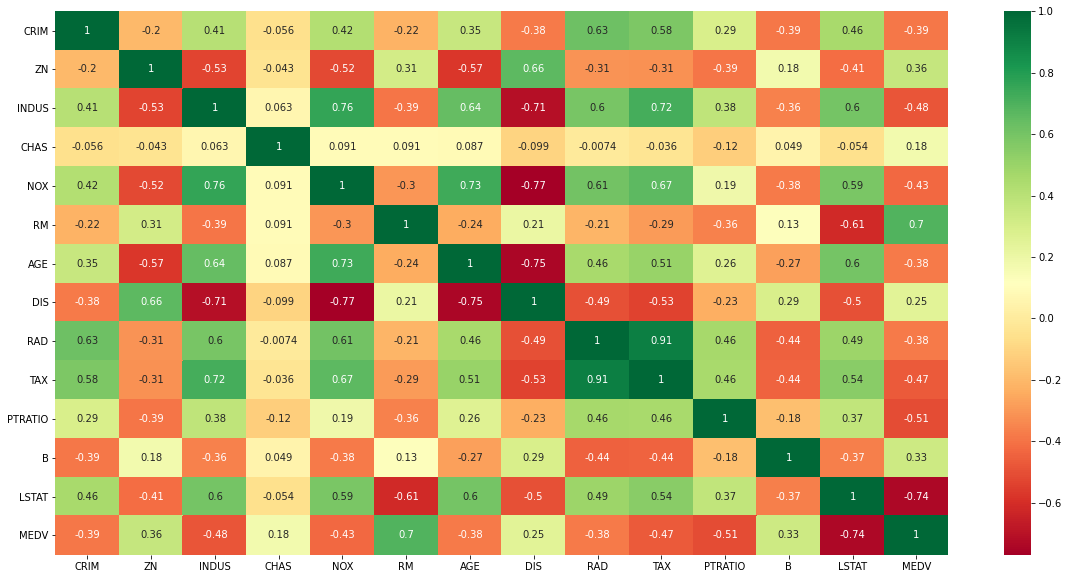

In [46]:
#Correlation between different features
corr = bos.corr()
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
#sns.heatmap(corr, mask = mask, annot=True )
sns.heatmap(corr, annot=True,cmap='RdYlGn') #cmap='Greens' )
plt.show()

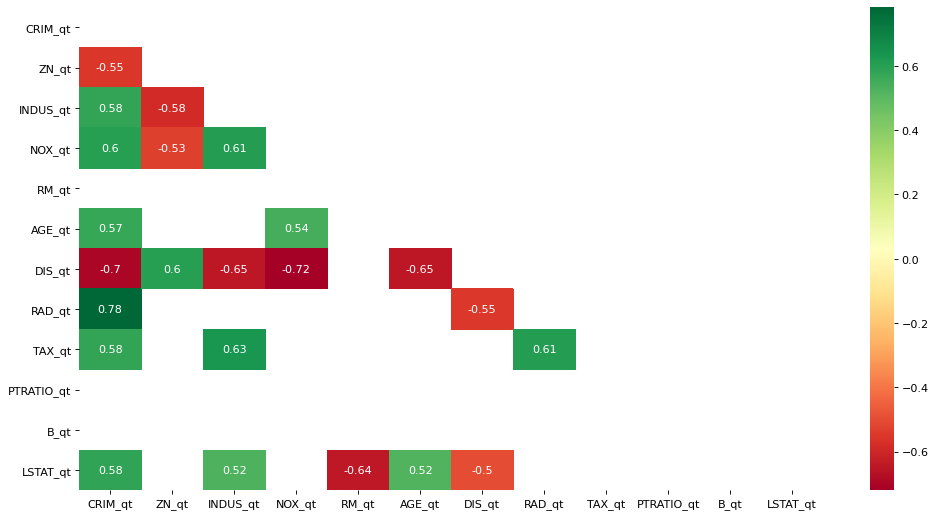

In [47]:
#Correlation between different features (after quantile transformation)
#Correlation of target variable with independent variables where correlation is more than 0.5
#Only lower triangle values are shown
X_ct_corr = X_ct.corr()
X_ct_filtered_corr = X_ct_corr[(abs(X_ct_corr)>=.5) & (abs(X_ct_corr) < 1)]
mask1 = np.zeros_like(X_ct_corr)
mask1[np.triu_indices_from(mask1)] = True
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(X_ct_filtered_corr,mask = mask1, annot=True,cmap="RdYlGn")
plt.show()

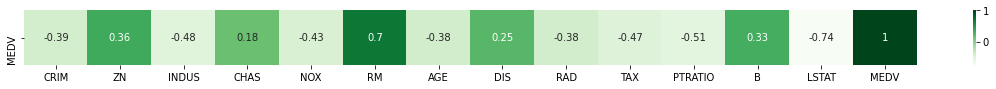

In [48]:
#Correlation of target variable with independent variables
plt.figure(figsize = (20,1))
sns.heatmap(corr[["MEDV"]].T, annot=True,cmap='Greens')
plt.show()

In [49]:
#Highlighting predictor variables where correlation coefficient is more than threshold
threshold = 0.5
MEDV_corr = np.round(corr[["MEDV"]],2)#.sort_values(by = 'MEDV',ascending = False)
MEDV_corr.style.apply(lambda x: ["background-color : yellow" if abs(v) > threshold else "" for v in x], axis = 1)

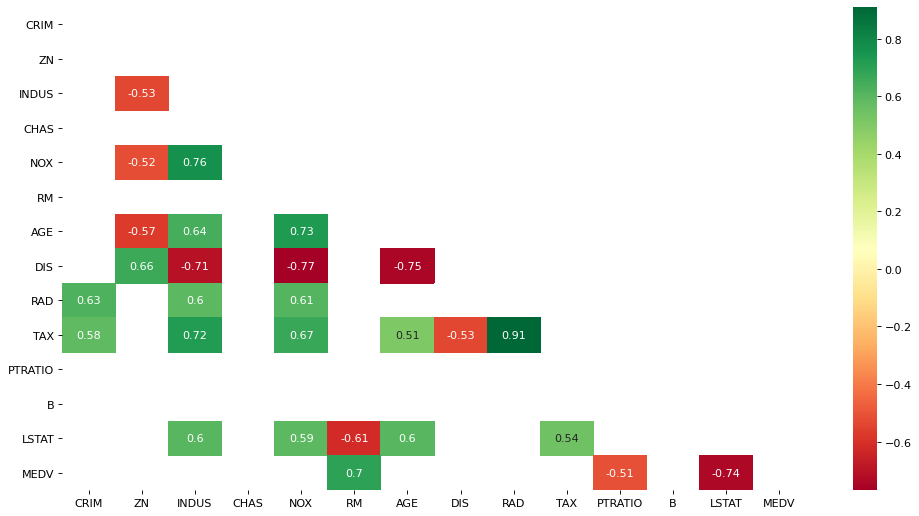

In [50]:
#Correlation of target variable with independent variables where correlation is more than 0.5
#Only lower triangle values are shown
filtered_corr = corr[(abs(corr)>=.5) & (abs(corr) < 1)]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(filtered_corr,mask = mask, annot=True,cmap="RdYlGn")
plt.show()

In [51]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(bos, 0.5)

NOX      DIS     -0.77
AGE      DIS     -0.75
MEDV     LSTAT   -0.74
DIS      INDUS   -0.71
RM       LSTAT   -0.61
AGE      ZN      -0.57
DIS      TAX     -0.53
INDUS    ZN      -0.53
NOX      ZN      -0.52
PTRATIO  MEDV    -0.51
TAX      AGE      0.51
LSTAT    TAX      0.54
TAX      CRIM     0.58
LSTAT    NOX      0.59
INDUS    RAD      0.60
LSTAT    AGE      0.60
         INDUS    0.60
NOX      RAD      0.61
CRIM     RAD      0.63
INDUS    AGE      0.64
DIS      ZN       0.66
TAX      NOX      0.67
MEDV     RM       0.70
INDUS    TAX      0.72
NOX      AGE      0.73
INDUS    NOX      0.76
TAX      RAD      0.91
CRIM     CRIM      nan
dtype: float64

**Observations from the above Heatmap:**

From the above correlation plots, we can see that 

1.   MEDV is strongly correlated to LSTAT (Negatively)
2.   MEDV is also strongly correlated to RM (Positively)
3.   MEDV has good correlation with PTRATIO variable (Negatively)
4.   RAD and TAX are strongly correlated (positive)
5.   DIS and  AGE are also strongly correlated (negative)
6.   NOX and INDUS are positively correlated
7.   NOX and DIS are negatively correlated
8.   TAX and INDUS are positively correlated


There exists a multi-collinearity between independent features. This must be eliminated before fitting any Linear Regression model (as the basic assumption in Linear regression is features must not be multi-collinear)

First approach is to manually filter out features having correlation more than a "threshold" limit.

Feature Selection using correlation coefficient method:

In [52]:
def find_correlated_features(data,threshold):
    col_corr = set()
    corr_metrix = data.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if((corr_metrix.iloc[i,j])>threshold):
                column_name = corr_metrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [53]:
corelated_features = find_correlated_features(X,0.7)
print(corelated_features)
x_correlated = X.drop(corelated_features,axis=1)
x_correlated.head()
#['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] #Features found using Boruta (Automated feature selection library)

{'AGE', 'TAX', 'NOX'}


CRIM    ZN  INDUS  CHAS   RM  DIS  RAD  PTRATIO      B  LSTAT
0  0.01 18.00   2.31  0.00 6.58 4.09 1.00    15.30 396.90   4.98
1  0.03  0.00   7.07  0.00 6.42 4.97 2.00    17.80 396.90   9.14
2  0.03  0.00   7.07  0.00 7.18 4.97 2.00    17.80 392.83   4.03
3  0.03  0.00   2.18  0.00 7.00 6.06 3.00    18.70 394.63   2.94
4  0.07  0.00   2.18  0.00 7.15 6.06 3.00    18.70 396.90   5.33

##**FEATURE SELECTION**
Feature Selection using Variance Threshold method in Scikit-learn

In [54]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.1)
X_VarianceT = var_thresh.fit_transform(X)
#print(X.columns)
#print(var_thresh.get_support())
remaining_cols = X.columns[var_thresh.get_support()]
X_vt = pd.DataFrame(X_VarianceT, columns = remaining_cols)
X_vt.head()

CRIM    ZN  INDUS   RM   AGE  DIS  RAD    TAX  PTRATIO      B  LSTAT
0  0.01 18.00   2.31 6.58 65.20 4.09 1.00 296.00    15.30 396.90   4.98
1  0.03  0.00   7.07 6.42 78.90 4.97 2.00 242.00    17.80 396.90   9.14
2  0.03  0.00   7.07 7.18 61.10 4.97 2.00 242.00    17.80 392.83   4.03
3  0.03  0.00   2.18 7.00 45.80 6.06 3.00 222.00    18.70 394.63   2.94
4  0.07  0.00   2.18 7.15 54.20 6.06 3.00 222.00    18.70 396.90   5.33

In [55]:
#Using manual method of finding correlation greater than a threshold limit (after variance threshold method)
corelated_features = find_correlated_features(X_vt,0.7)
print(corelated_features)
x_vt_correlated = X_vt.drop(corelated_features,axis=1)
x_vt_correlated.head()
#['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] #Features found using Boruta (Automated feature selection library)

{'TAX'}


CRIM    ZN  INDUS   RM   AGE  DIS  RAD  PTRATIO      B  LSTAT
0  0.01 18.00   2.31 6.58 65.20 4.09 1.00    15.30 396.90   4.98
1  0.03  0.00   7.07 6.42 78.90 4.97 2.00    17.80 396.90   9.14
2  0.03  0.00   7.07 7.18 61.10 4.97 2.00    17.80 392.83   4.03
3  0.03  0.00   2.18 7.00 45.80 6.06 3.00    18.70 394.63   2.94
4  0.07  0.00   2.18 7.15 54.20 6.06 3.00    18.70 396.90   5.33

Feature Selection using VIF (Variance Inflation Factor)

In [56]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [57]:
calc_vif(X).sort_values(by='VIF', ascending = True)

variables   VIF
3       CHAS  1.15
0       CRIM  2.10
1         ZN  2.84
12     LSTAT 11.10
2      INDUS 14.49
7        DIS 14.70
8        RAD 15.17
11         B 20.10
6        AGE 21.39
9        TAX 61.23
4        NOX 73.89
5         RM 77.95
10   PTRATIO 85.03

In [58]:
def calculate_vif_2(X, thresh=10):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
    dropped=False
    c = X[cols[variables]].values
    vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

  print('Remaining variables:')
  print(X.columns[variables])
  return X[cols[variables]]

X_vif = calculate_vif_2(X)

dropping 'PTRATIO' at index: 10
dropping 'NOX' at index: 4
dropping 'TAX' at index: 8
dropping 'RM' at index: 4
dropping 'AGE' at index: 4
dropping 'B' at index: 6
Remaining variables:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT'], dtype='object')


**Feature Selection using Boruta library:**

In [59]:
!pip install Boruta

     |████████████████████████████████| 61kB 7.5MB/s 


In [60]:
from sklearn.ensemble import RandomForestRegressor

# define random forest classifier
forest = RandomForestRegressor(n_jobs=-1, max_depth=5)

In [61]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(np.array(X), np.array(y))

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(np.array(X))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	3
Iteration:

In [62]:
### print results
# check selected features
#feat_selector.support_
# check ranking of features
#feat_selector.ranking_

green_area = X.columns[feat_selector.support_].to_list()
blue_area = X.columns[feat_selector.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
X_boruta = X[green_area]
X_boruta.head()

features in the green area: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features in the blue area: []


CRIM  NOX   RM   AGE  DIS    TAX  PTRATIO      B  LSTAT
0  0.01 0.54 6.58 65.20 4.09 296.00    15.30 396.90   4.98
1  0.03 0.47 6.42 78.90 4.97 242.00    17.80 396.90   9.14
2  0.03 0.47 7.18 61.10 4.97 242.00    17.80 392.83   4.03
3  0.03 0.46 7.00 45.80 6.06 222.00    18.70 394.63   2.94
4  0.07 0.46 7.15 54.20 6.06 222.00    18.70 396.90   5.33

**Univariate feature selection method for feature selection:**
<br>It is nothing but a scoring mechanism for each feature against target variable. *Mutual information*, *ANOVA F-test* and *chi2* are some of the most popular methods for univariate feature selection. 

There are two ways of using these in scikit-learn.
- SelectKBest: It keeps the top-k scoring features
- SelectPercentile: It keeps the top features which are in a percentage
specified by the user

Special note: *chi2* can only be used for data which is non-negative in nature.
This is a particularly useful feature selection technique in natural language
processing when we have a bag of words or tf-idf based features. 

It’s best to create a wrapper for univariate feature selection that you can use for almost any new problem.

*Book Reference: Approaching (almost) any machine learning problem by Abhishek Thakur*

In [63]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
class UnivariateFeatureSelction:
  def __init__(self, n_features, problem_type, scoring):
    """
    Custom univariate feature selection wrapper on different univariate feature selection models from scikit-learn.
      :param n_features: SelectPercentile if float else SelectKBest
      :param problem_type: classification or regression
      :param scoring: scoring function, string
    """
    # for a given problem type, there are only a few valid scoring methods
    # you can extend this with your own custom methods if you wish
    if problem_type == "classification":
      valid_scoring = {
          "f_classif": f_classif,
          "chi2": chi2,
          "mutual_info_classif": mutual_info_classif
      }
    else:
      valid_scoring = {
          "f_regression": f_regression,
          "mutual_info_regression": mutual_info_regression
          }
    # raise exception if we do not have a valid scoring method
    if scoring not in valid_scoring:
      raise Exception("Invalid scoring function")
    # if n_features is int, we use selectkbest
    # if n_features is float, we use selectpercentile
    # please note that it is int in both cases in sklearn
    if isinstance(n_features, int):
      self.selection = SelectKBest(valid_scoring[scoring],k=n_features)
    elif isinstance(n_features, float):
      self.selection = SelectPercentile(valid_scoring[scoring],percentile=int(n_features * 100))
    else:
      raise Exception("Invalid type of feature")

  # same fit function
  def fit(self, X, y):
    return self.selection.fit(X, y)
  # same transform function
  def transform(self, X):
    return self.selection.transform(X)
  # same fit_transform function
  def fit_transform(self, X, y):
    return self.selection.fit_transform(X, y)
  #Get feature support
  def features(self):
    masks =  self.selection.get_support()
    return X.columns[masks].to_list()

In [64]:
ufs = UnivariateFeatureSelction(n_features=6,problem_type="regression",scoring="f_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)
#List of features
ufs.features()

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

**Greedy Feature Selection:**
<br>**Recursive feature elimination (RFE)** - In this, initially start with all features and keep removing one feature in every iteration that provides the least value to a given model. 

<br>But how do we know which feature offers the least value? 
<br>Well, if we use models like linear support vector machine (SVM) or logistic regression, we get a coefficient for each feature which decides the importance of the features. In case of any tree-based models, we get feature importance in place of coefficients. In each iteration, we can eliminate the least important feature and keep eliminating it until we reach the number of features needed. 

<br>When we are doing recursive feature elimination, in each iteration, we remove the feature which has the feature importance or the feature which has a coefficient close to 0. 

<br>Please remember that when you use a model like logistic regression for
binary classification, the coefficients for features are more positive if they are important for the positive class and more negative if they are important for the negative class. 

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# initialize the model
lr_model = LinearRegression()
# initialize RFE
rfe = RFE(estimator=lr_model,n_features_to_select=8)
# fit RFE
rfe.fit(X, y)
# get the transformed data with selected columns
X_rfe = rfe.transform(X)
#Columns having significant contribution
X.columns[rfe.get_support()]

Index(['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

**Feature importance using Machine learning model (Random Forest)**

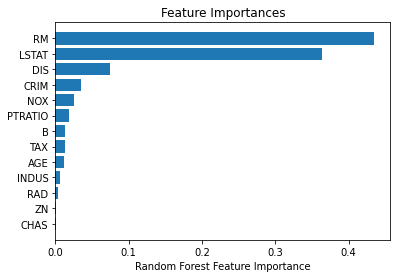

In [66]:
from sklearn.ensemble import RandomForestRegressor
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
#Plotting Feature importance from random forest (or any model)
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [X.columns[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

rf_features = X.columns[np.where(importances>0.01)]

In [67]:
#Scikit-learn also offers SelectFromModel class that helps you choose features directly from a given model. 
#You can also specify the threshold for coefficients or feature importance if you want and the maximum number of features you want to select
from sklearn.feature_selection import SelectFromModel
# select from the model
sfm = SelectFromModel(estimator=model,threshold='median' )
X_transformed = sfm.fit_transform(X, y)
# see which features were selected
support = sfm.get_support()
# get feature names
imp_features_selectfrommodel = X.columns[support].to_list()
print(imp_features_selectfrommodel) #Method 1
#print([x for x, y in zip(X.columns, support) if y == True]) #Method 2


['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


In [68]:
#Using Lasso regression as an estimator to SelectFromModel API
from sklearn.linear_model import Lasso
sel_= SelectFromModel(Lasso(random_state=0)) #alpha=0.5,
# train Lasso model and select features
sel_.fit(X,y)
# let's print the number of total and selected features
selected_feats = X.columns[(sel_.get_support())]
#print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_== 0)))


In [69]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator= model, step=1, cv=5)
selector = selector.fit(X, y)
selected_feats_using_RFECV = X.columns[(sel_.get_support())]


In [70]:
#Sequential forward selection
import statsmodels.api as sm

def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
  
    """ Perform a forward-backward feature selection based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details

    Ref: 
    [1]: http://planspace.org/20150423-forward_selection_with_statsmodels/
    [2]: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
    https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm


    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print(result)    

Add  LSTAT                          with p-value 5.0811e-88
Add  RM                             with p-value 3.47226e-27
Add  PTRATIO                        with p-value 1.64466e-14
Add  DIS                            with p-value 1.66847e-05
Add  NOX                            with p-value 5.48815e-08
Add  CHAS                           with p-value 0.000265473
Add  B                              with p-value 0.000771946
Add  ZN                             with p-value 0.00465162
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']


In [71]:
#!pip install mlxtend

In [72]:
#importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(RandomForestRegressor(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)
sfs.fit(X, y)
list(sfs.k_feature_names_)      #with LinearRegression -  ['CRIM', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
                                #With Randomforest -      ['ZN', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'B', 'LSTAT']

['ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'B', 'LSTAT']

In [73]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=7,
         forward=False,
         floating=False,
         cv=0)

sbs.fit(np.array(X), np.array(y))
sbs_features = [X.columns.to_list()[int(i)] for i in sbs.k_feature_names_]

In [74]:
!pip install pymrmr

     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276580 sha256=618bb6e71872cbd1c6a9b0799818115e0160f0ffc7713d02e6b421c7263a2ba1
  Stored in directory: /root/.cache/pip/wheels/9b/e2/c2/4b232fc0b8128263b518808866f5797070fe6750203ad1027a
Successfully built pymrmr


In [75]:
#MRMR - Minimal Redundancy and Maximal Relevance
import pymrmr
df = pd.concat([y,X], axis = 1)
df.head()
selected_features_mrmr = pymrmr.mRMR(df, 'MIQ',8)

In [76]:
selected_features_mrmr

['AGE', 'RM', 'CRIM', 'ZN', 'LSTAT', 'CHAS', 'B', 'PTRATIO']

**Feature selection summary (various methods):**

In [77]:
print("Features using correlation method:\t\t\t\t\t",x_correlated.columns.to_list())
print("Features using Variance Threshold method:\t\t\t\t",X_vt.columns.to_list())
print("Features using Variance Threshold followed by correlation method:\t",x_vt_correlated.columns.to_list())
print("Features using VIF method:\t\t\t\t\t\t",X_vif.columns.to_list())
print("Features using Boruta package:\t\t\t\t\t\t",X_boruta.columns.to_list())
print("Features using Univariate analysis:\t\t\t\t\t",ufs.features())
print("Features using RFE analysis:\t\t\t\t\t\t",X.columns[rfe.get_support()].to_list())
print("Features using ML model (Random Forest):\t\t\t\t",rf_features.to_list())
print("Features using ML model (SelectFromModel - RF):\t\t\t\t",imp_features_selectfrommodel)
print("Features using ML model (SelectFromModel - Lasso):\t\t\t",selected_feats.to_list())
print("Features using ML model with RFE (Random Forest):\t\t\t",selected_feats_using_RFECV.to_list())
print("Features using SFS from scratch:\t\t\t\t\t",result)
print("Features using SFS using mlxtend package:\t\t\t\t",list(sfs.k_feature_names_))
print("Features using SBS using mlxtend package:\t\t\t\t",sbs_features)
print("Features using MRMR :\t\t\t\t\t\t\t",selected_features_mrmr)

Features using correlation method:					 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
Features using Variance Threshold method:				 ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Features using Variance Threshold followed by correlation method:	 ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
Features using VIF method:						 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT']
Features using Boruta package:						 ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Features using Univariate analysis:					 ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
Features using RFE analysis:						 ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
Features using ML model (Random Forest):				 ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Features using ML model (SelectFromModel - RF):				 ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
Feature

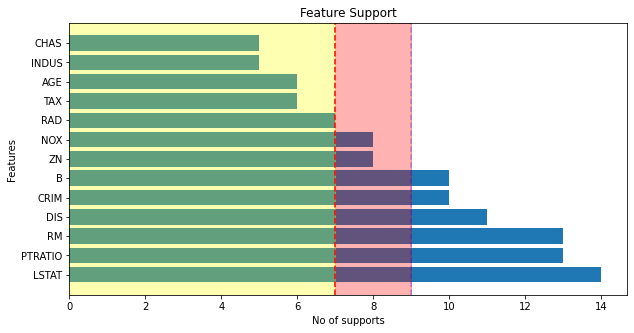

In [78]:
final_feature_list = x_correlated.columns.to_list() + x_vt_correlated.columns.to_list() + X_vif.columns.to_list() \
                    + X_boruta.columns.to_list() + ufs.features() + X.columns[rfe.get_support()].to_list() + rf_features.to_list() \
                    + imp_features_selectfrommodel + selected_feats.to_list() + selected_feats_using_RFECV.to_list() + result + list(sfs.k_feature_names_) \
                    + sbs_features + selected_features_mrmr
sr = pd.Series(final_feature_list)
feature_summary = pd.DataFrame(sr.value_counts()).reset_index()
feature_summary.columns = ["Feature","Support"]
#print(sr.value_counts())
first_cutoff = 0.75
second_cutoff = 0.60

no_of_features_in_first_cutoff = round(first_cutoff * len(feature_summary))-1
no_of_features_in_second_cutoff = round(second_cutoff * len(feature_summary))-1

plt.figure(figsize=(10,5))
plt.title('Feature Support')
plt.barh(feature_summary["Feature"],feature_summary["Support"])
plt.axvline(x=no_of_features_in_first_cutoff, color='b', ls = "--", alpha=0.3)
plt.axvspan(no_of_features_in_second_cutoff, no_of_features_in_first_cutoff, alpha=0.3, color='red')
plt.axvspan(0, no_of_features_in_second_cutoff, alpha=0.3, color='yellow')
plt.axvline(x=no_of_features_in_second_cutoff, color='r', ls = "--")
plt.xlabel('No of supports')
plt.ylabel("Features")
plt.show()

In [79]:
important_features_first_cutoff = feature_summary[feature_summary["Support"]>=round(first_cutoff * len(feature_summary))]
important_features_second_cutoff = feature_summary[feature_summary["Support"]>=round(second_cutoff * len(feature_summary))]

In [80]:
print("Important features in first cutoff list:\n\n ",important_features_first_cutoff)

Important features in first cutoff list:

     Feature  Support
0    LSTAT       14
1  PTRATIO       13
2       RM       13
3      DIS       11
4     CRIM       10
5        B       10


In [81]:
print("Important features in second cutoff list:\n\n ",important_features_second_cutoff)

Important features in second cutoff list:

     Feature  Support
0    LSTAT       14
1  PTRATIO       13
2       RM       13
3      DIS       11
4     CRIM       10
5        B       10
6       ZN        8
7      NOX        8


##**MULTIPLE LINEAR REGRESSION**


####**Performance metrics**

In [82]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [83]:
#RMSE
def rmse(y_true,y_pred):
  """
  This is the Root Mean Squared Error (RMSE). 
  """
  return np.sqrt(mean_squared_error(y_true,y_pred))

#R2 SCORE
def r2(y_true,y_pred):
  """
  This is the coefficient of determination. It is a measure of the linear relationship between X and Y. 
  It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.
  
  The most common interpretation of r-squared is how well the regression model fits the observed data. 
  For example, an r-squared of 60% reveals that 60% of the data fit the regression model. 
  Generally, a higher r-squared indicates a better fit for the model
  """
  return r2_score(y_true, y_pred)

def adj_r2(y_true,y_pred, X):
  """
  The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.
  """
  return 1 - ((1-r2_score(y_true, y_pred))*(len(y_true)-1)/(len(y_true)-len(X.columns)-1))
  
#SCATTER PLOT
def scatter_plot(y_true, y_pred):
  plt.scatter(y_true, y_pred)
  plt.xlabel("Actual price")
  plt.ylabel("Predicted price")
  plt.title("Actual vs predicted price")
  plt.show()

#RESIDUAL SCATTER PLOT
def residual_plot(y_true, y_pred):
  plt.scatter(y_pred, y_true - y_pred)
  plt.xlabel("Predicted price")
  plt.ylabel("Residual (Actual - Predicted) price")
  plt.title("Predicted vs residual price")
  plt.show()

#RESIDUAL NORMALITY
def residual_distribution(y_true, y_pred):
  sns.distplot(y_true - y_pred)
  plt.xlabel("Residual")
  plt.ylabel("Probability")
  plt.title("Histogram of residuals")
  plt.show()

def all_performance_plots(y_true, y_pred):
  fig=plt.figure(figsize=(10,5), dpi = 80)
  ax=fig.add_subplot(1,3,1)
  plt.scatter(y_true, y_pred)
  plt.xlabel("Actual price")
  plt.ylabel("Predicted price")
  plt.title("Actual vs predicted price")
  ax=fig.add_subplot(1,3,2)
  plt.scatter(y_pred, y_true - y_pred)
  plt.xlabel("Predicted price")
  plt.ylabel("Residual (Actual - Predicted) price")
  plt.title("Predicted vs residual price")
  ax=fig.add_subplot(1,3,3)
  sns.distplot(y_true - y_pred)
  plt.xlabel("Residual")
  plt.ylabel("Probability")
  plt.title("Histogram of residuals")
  fig.tight_layout()
  plt.show()  

def mse_rmse_r2(y_true, y_pred):
    mse_val = mean_squared_error(y_true,y_pred)
    rmse_val = np.sqrt(mean_squared_error(y_true,y_pred))
    r2_val = r2_score(y_true, y_pred)
    return mse_val, rmse_val, r2_val

###**Linear regression model "AS IS" (Baseline model)**

In this, the variables as "**IT IS**" is used in linear model building.

RESULTS OF BASELINE MODEL
----------------------------------
RMSE:  5.343  and R2_SCORE:  0.712


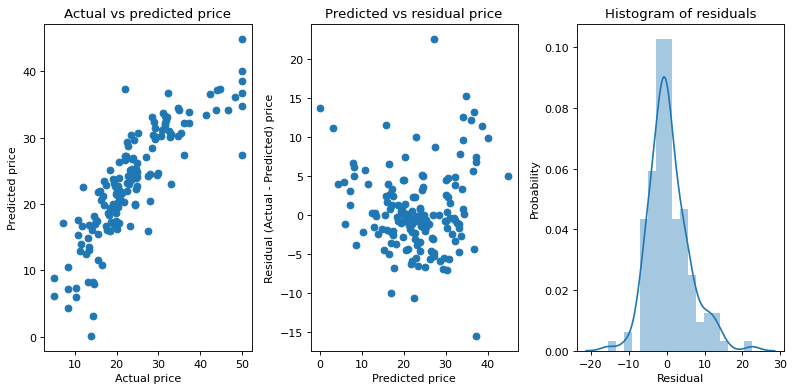

In [84]:
#Generate training and testing dataset from entire data
SEED = 101
test_data_proportion = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_data_proportion, random_state = SEED)

#Linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

baseline_mse, baseline_rmse, baseline_r2 = mse_rmse_r2(y_test,y_pred)
print("RESULTS OF BASELINE MODEL")
print("----------------------------------")
print("RMSE: ", round(baseline_rmse,3) , " and R2_SCORE: ",  round(baseline_r2,3))

all_performance_plots(y_test,y_pred)

In [85]:
#Linear regression model
def model_evaluation(model, X, y, cv_action = 1):
  if cv_action == 0 or cv_action == 1:
    #Train test split
    SEED = 101
    test_size_percentage = 0.3
    no_of_cv = 5
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED )

    #model fitting on training set
    model.fit(X_train, y_train)

    #model prediction using test data
    y_pred = model.predict(X_test)

    if cv_action == 1:
      #Cross validation on entire dataset
      kfold = KFold(n_splits=no_of_cv, random_state=SEED)
      cv_scores = cross_val_score (model, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      cv_results = pd.Series(cv_scores, range(1,len(cv_scores)+1))
      mean_cv_score = np.abs(np.mean(cv_scores))

    #Model coefficients
    model_coefs = pd.Series(model.coef_, X.columns).sort_values()

    #model results
    print("Model outcomes/results")
    print("##############################")
    mse, rmse, r2 = mse_rmse_r2(y_test,y_pred)
    print("MSE: ", round(mse,3), " , RMSE: ", round(rmse,3) , " and R2_SCORE: ",  round(r2,3))
    
    if cv_action == 1:
      print("With Cross-validation strategy, the CV score (Mean): ", round(mean_cv_score, 3)),
      #fig=plt.figure(figsize=(5,5), dpi = 80)
      cv_results.plot(kind='barh', xlabel="CV steps", ylabel="Score", figsize = (5,5))
      plt.show()
      
    print("Plotting model performance")
    print("-----------------------------")
    all_performance_plots(y_test,y_pred)
    print("\nPlotting model coefficients")
    print("-----------------------------")
    model_coefs.plot(kind='bar', xlabel="Features", ylabel="Regression coefficients")
    plt.show()

    print("Learning curve")
    print("----------------------")
    #Training sample wise training and validation error
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_test)
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
      val_errors.append(mean_squared_error(y_test, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train stage")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="testing stage")
    plt.legend()
    plt.show()
    
  else:
    print("Please enter a valid cv_action flag. (Acceptable values are 0 or 1) and you have entered {}".format(cv_action))


In [86]:
#Linear regression model
def model_eval_with_builtin_transformation(model, X, y, cv_action = 1, transfer = "StandardScaler", detailing = 0):
  """
  :transfer     None for No transformation
                "StandardScaler" for StandardScaler Transformation
                "MinMaxScaler" for MinMaxScaler transformation
                "Quantile" for Quantile Transformation 
  """
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
  from sklearn.pipeline import Pipeline

  if cv_action == 0 or cv_action == 1:
    #Train test split
    SEED = 101
    test_size_percentage = 0.3
    no_of_cv = 5

    if transfer == "StandardScaler":
      trf = StandardScaler()
    elif transfer == "MinMaxScaler":
      trf = MinMaxScaler(feature_range=(0, 1) )
    elif transfer == "Quantile":
      trf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    else:
      trf = None

    if trf == None:
      X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED)
    else:
      X_trf = trf.fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(X_trf,y, test_size = test_size_percentage, random_state = SEED )

    #model fitting on training set
    model.fit(X_train, y_train)

    #model prediction using test data
    y_pred = model.predict(X_test)

    #Cross validation method
    if cv_action == 1 and trf != None:
      pipeline = Pipeline(steps=[('t', trf), ('m', model)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      cv_results = pd.Series(cv_scores, range(1,len(cv_scores)+1))
      mean_cv_score = np.abs(np.mean(cv_scores))
    elif cv_action == 1 and trf == None:
      pipeline = Pipeline(steps=[('m', model)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      cv_results = pd.Series(cv_scores, range(1,len(cv_scores)+1))
      mean_cv_score = np.abs(np.mean(cv_scores))

    #Model coefficients
    model_coefs = pd.Series(model.coef_, X.columns).sort_values()

    #model results
    mse, rmse, r2 = mse_rmse_r2(y_test,y_pred)

    if detailing == 0:
      return rmse, r2, mean_cv_score
    else:
      print("Model outcomes/results")
      print("##############################")
      print("MSE: ", round(mse,3), " , RMSE: ", round(rmse,3) , " and R2_SCORE: ",  round(r2,3))
      
      if cv_action == 1:
        print("With Cross-validation strategy, the CV score (Mean): ", round(mean_cv_score, 3)),
        #fig=plt.figure(figsize=(5,5), dpi = 80)
        cv_results.plot(kind='barh', xlabel="CV steps", ylabel="Score", figsize = (5,5))
        plt.show()
        
      print("Plotting model performance")
      print("-----------------------------")
      all_performance_plots(y_test,y_pred)
      print("\nPlotting model coefficients")
      print("-----------------------------")
      model_coefs.plot(kind='bar', xlabel="Features", ylabel="Regression coefficients")
      plt.show()

      print("Learning curve")
      print("----------------------")
      #Training sample wise training and validation error
      train_errors, val_errors = [], []
      for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))
      plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train stage")
      plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="testing stage")
      plt.legend()
      plt.show()
      
  else:
    print("Please enter a valid cv_action flag. (Acceptable values are 0 or 1) and you have entered {}".format(cv_action))


In [87]:
#With X, y (AS IS) - BASELINE MODEL 
reg = LinearRegression()
(rmse, r2, cv_score) = model_eval_with_builtin_transformation(reg, X, y, cv_action = 1, transfer = "MinMaxScaler", detailing = 0)
rmse, r2, cv_score

(5.34299403625609, 0.7123963332666872, 24.260616035664704)

In [88]:
#Multiple Linear Regression with different transformation on X data
reg_xy = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = model_eval_with_builtin_transformation(reg_xy, X, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Multiple Linear Regression")
  result_set["Data extent"].append("X (AS IS)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results = pd.DataFrame()
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method Data extent         Scaling  rmse   r2  cv_score
0  Multiple Linear Regression   X (AS IS)            None  5.34 0.71     24.26
1  Multiple Linear Regression   X (AS IS)        Quantile  5.38 0.71     22.06
2  Multiple Linear Regression   X (AS IS)  StandardScaler  5.34 0.71     24.26
3  Multiple Linear Regression   X (AS IS)    MinMaxScaler  5.34 0.71     24.26

In [89]:
#Multiple Linear Regression with different transformation on first cutoff variable list
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]
reg_x1y = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = model_eval_with_builtin_transformation(reg_x1y, X_first_cutoff, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Multiple Linear Regression")
  result_set["Data extent"].append("X (First cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method       Data extent  ...   r2  cv_score
0  Multiple Linear Regression         X (AS IS)  ... 0.71     24.26
1  Multiple Linear Regression         X (AS IS)  ... 0.71     22.06
2  Multiple Linear Regression         X (AS IS)  ... 0.71     24.26
3  Multiple Linear Regression         X (AS IS)  ... 0.71     24.26
0  Multiple Linear Regression  X (First cutoff)  ... 0.69     26.14
1  Multiple Linear Regression  X (First cutoff)  ... 0.68     24.05
2  Multiple Linear Regression  X (First cutoff)  ... 0.69     26.14
3  Multiple Linear Regression  X (First cutoff)  ... 0.69     26.14

[8 rows x 6 columns]

In [90]:
#Multiple Linear Regression with different transformation on second cutoff variable list
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]
reg_x2y = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = model_eval_with_builtin_transformation(reg_x2y, X_second_cutoff, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Multiple Linear Regression")
  result_set["Data extent"].append("X (Second cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method        Data extent  ...   r2  cv_score
0  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
1  Multiple Linear Regression          X (AS IS)  ... 0.71     22.06
2  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
3  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
0  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
1  Multiple Linear Regression   X (First cutoff)  ... 0.68     24.05
2  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
3  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
0  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
1  Multiple Linear Regression  X (Second cutoff)  ... 0.70     22.82
2  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
3  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91

[12 rows x 6 columns]

##**POLYNOMIAL REGRESSION**

In [91]:
#Linear regression model
def polymodel_eval_with_builtin_transformation(model, X, y, cv_action = 1, transfer = "StandardScaler", detailing = 0):
  """
  :transfer     None for No transformation
                "StandardScaler" for StandardScaler Transformation
                "MinMaxScaler" for MinMaxScaler transformation
                "Quantile" for Quantile Transformation 
  """
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PolynomialFeatures
  from sklearn.pipeline import Pipeline

  if cv_action == 0 or cv_action == 1:
    #Train test split
    SEED = 101
    test_size_percentage = 0.3
    no_of_cv = 5

    if transfer == "StandardScaler":
      trf = StandardScaler()
    elif transfer == "MinMaxScaler":
      trf = MinMaxScaler(feature_range=(0, 1))
    elif transfer == "Quantile":
      trf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
    else:
      trf = None

    if trf == None:
      X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED )
    else:
      X_trf = trf.fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(X_trf,y, test_size = test_size_percentage, random_state = SEED )

    #Polynomial features
    poly = PolynomialFeatures(degree = 2)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    #model fitting on training set
    model.fit(X_train_poly, y_train)
    
    #model prediction using test data
    y_pred = model.predict(X_test_poly)
    #Cross validation method
    if cv_action == 1 and trf != None:
      pipeline = Pipeline(steps=[('p', poly), ('t', trf),('m', model)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      cv_results = pd.Series(cv_scores, range(1,len(cv_scores)+1))
      mean_cv_score = np.abs(np.mean(cv_scores))
      
    elif cv_action == 1 and trf == None:
      pipeline = Pipeline(steps=[('p',poly),('m', model)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      cv_results = pd.Series(cv_scores, range(1,len(cv_scores)+1))
      mean_cv_score = np.abs(np.mean(cv_scores))
      
    #model results
    mse, rmse, r2 = mse_rmse_r2(y_test,y_pred)
    if detailing == 0:
      return rmse, r2, mean_cv_score
    else:
      print("Model outcomes/results")
      print("##############################")
      print("MSE: ", round(mse,3), " , RMSE: ", round(rmse,3) , " and R2_SCORE: ",  round(r2,3))
      
      if cv_action == 1:
        print("With Cross-validation strategy, the CV score (Mean): ", round(mean_cv_score, 3)),
        #fig=plt.figure(figsize=(5,5), dpi = 80)
        cv_results.plot(kind='barh', xlabel="CV steps", ylabel="Score", figsize = (5,5))
        plt.show()
        
      print("Plotting model performance")
      print("-----------------------------")
      all_performance_plots(y_test,y_pred)
      plt.show()

      print("Learning curve")
      print("----------------------")
      #Training sample wise training and validation error
      train_errors, val_errors = [], []
      for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))
      plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train stage")
      plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="testing stage")
      plt.legend()
      plt.show()
      
  else:
    print("Please enter a valid cv_action flag. (Acceptable values are 0 or 1) and you have entered {}".format(cv_action))


In [92]:
#Multiple Linear Regression with different transformation on second cutoff variable list
reg_poly = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = polymodel_eval_with_builtin_transformation(reg_poly, X, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Polynomial Regression")
  result_set["Data extent"].append("X (AS IS)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method        Data extent  ...   r2  cv_score
0  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
1  Multiple Linear Regression          X (AS IS)  ... 0.71     22.06
2  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
3  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
0  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
1  Multiple Linear Regression   X (First cutoff)  ... 0.68     24.05
2  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
3  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
0  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
1  Multiple Linear Regression  X (Second cutoff)  ... 0.70     22.82
2  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
3  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
0       Polynomial Regression          X (AS IS)  ... 0.85     16.86
1       Polynomial Regression          X (AS IS)  ... 0.41     28.68
2       Polynomial Regression          X (AS IS)  ... 0.85     15.57
3       Polynomial Regression          X (AS IS)  ... 0.85     23.40

[16 rows x 6 columns]

In [93]:
#results.drop(results[results.Method == "Polynomial Regression"].index, inplace = True)
#df.drop(df[df['Age'] < 25].index, inplace = True)
#results

In [94]:
#Multiple Linear Regression with different transformation on first cutoff variable list
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]
reg_poly_x1_y = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = polymodel_eval_with_builtin_transformation(reg_poly_x1_y, X_first_cutoff, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Polynomial Regression")
  result_set["Data extent"].append("X (First cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method        Data extent  ...   r2  cv_score
0  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
1  Multiple Linear Regression          X (AS IS)  ... 0.71     22.06
2  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
3  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
0  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
1  Multiple Linear Regression   X (First cutoff)  ... 0.68     24.05
2  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
3  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
0  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
1  Multiple Linear Regression  X (Second cutoff)  ... 0.70     22.82
2  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
3  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
0       Polynomial Regression          X (AS IS)  ... 0.85     16.86
1       Polynomial Regression          X (AS IS)  ... 0.41     28.68
2       Polynomial Regression          X (AS IS)  ... 0.85     15.57
3       Polynomial Regression          X (AS IS)  ... 0.85     23.40
0       Polynomial Regression   X (First cutoff)  ... 0.29     22.89
1       Polynomial Regression   X (First cutoff)  ... 0.68     21.28
2       Polynomial Regression   X (First cutoff)  ... 0.77     28.72
3       Polynomial Regression   X (First cutoff)  ... 0.77     29.32

[20 rows x 6 columns]

In [95]:
#Multiple Linear Regression with different transformation on second cutoff variable list
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]
reg_poly_x2_y = LinearRegression()
result_set = {"Method":[],"Data extent":[], "Scaling":[],"rmse":[],"r2":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (rmse, r2, cv_score) = polymodel_eval_with_builtin_transformation(reg_poly_x2_y, X_second_cutoff, y, cv_action = 1, transfer = trf_setting, detailing = 0)
  result_set["Method"].append("Polynomial Regression")
  result_set["Data extent"].append("X (Second cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["rmse"].append(rmse)
  result_set["r2"].append(r2)
  result_set["cv_score"].append(cv_score)
results_append = pd.DataFrame.from_dict(result_set)
results = pd.concat([results,results_append])
results

Method        Data extent  ...   r2  cv_score
0  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
1  Multiple Linear Regression          X (AS IS)  ... 0.71     22.06
2  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
3  Multiple Linear Regression          X (AS IS)  ... 0.71     24.26
0  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
1  Multiple Linear Regression   X (First cutoff)  ... 0.68     24.05
2  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
3  Multiple Linear Regression   X (First cutoff)  ... 0.69     26.14
0  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
1  Multiple Linear Regression  X (Second cutoff)  ... 0.70     22.82
2  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
3  Multiple Linear Regression  X (Second cutoff)  ... 0.71     24.91
0       Polynomial Regression          X (AS IS)  ... 0.85     16.86
1       Polynomial Regression          X (AS IS)  ... 0.41     28.68
2       Polynomial Regression          X (AS IS)  ... 0.85     15.57
3       Polynomial Regression          X (AS IS)  ... 0.85     23.40
0       Polynomial Regression   X (First cutoff)  ... 0.29     22.89
1       Polynomial Regression   X (First cutoff)  ... 0.68     21.28
2       Polynomial Regression   X (First cutoff)  ... 0.77     28.72
3       Polynomial Regression   X (First cutoff)  ... 0.77     29.32
0       Polynomial Regression  X (Second cutoff)  ... 0.75     18.73
1       Polynomial Regression  X (Second cutoff)  ... 0.68     22.00
2       Polynomial Regression  X (Second cutoff)  ... 0.74     62.34
3       Polynomial Regression  X (Second cutoff)  ... 0.73     16.56

[24 rows x 6 columns]

##**RIDGE REGRESSION**

In [96]:
#Multiple Linear Regression with different transformation on X data
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def cv_optimize_ridge(X, y, list_of_lambdas, n_folds):
    est = Ridge()
    parameters = {'alpha': list_of_lambdas}
    # the scoring parameter below is the default one in ridge, but you can use a different one
    # in the cross-validation phase if you want.
    gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(X, y)
    return gs

In [97]:
lambs = [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0]
ridgemodel = cv_optimize_ridge(X, y, lambs, n_folds=5)
print(ridgemodel.best_estimator_, "\n")
print(ridgemodel.best_params_, "\n")
print(ridgemodel.best_score_, "\n")

Ridge(alpha=100.0) 

{'alpha': 100.0} 

-29.9057019475403 



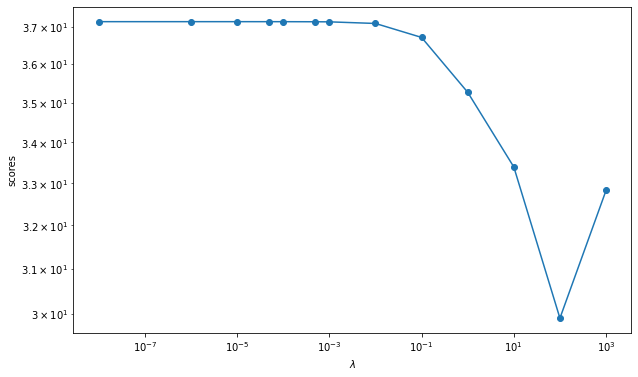

In [98]:
fit_lambdas = [d['alpha'] for d in ridgemodel.cv_results_['params']]
fit_scores = ridgemodel.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [99]:
for cur_alpha in lambs:
    lr_object =  Ridge(alpha=cur_alpha)
    scores = cross_val_score(lr_object, X, y, scoring = 'neg_mean_squared_error', cv=5)
    print("lambda {0}\t R^2 scores: {1}\t Mean R^2: {2}".format(cur_alpha,scores,np.mean(scores)))

lambda 1e-08	 R^2 scores: [-12.46030055 -26.048621   -33.07413791 -80.76237111 -33.31360652]	 Mean R^2: -37.13180741822799
lambda 1e-06	 R^2 scores: [-12.46029902 -26.04861047 -33.07413091 -80.76237049 -33.31360171]	 Mean R^2: -37.13180252061324
lambda 1e-05	 R^2 scores: [-12.46028509 -26.04851477 -33.07406732 -80.76236482 -33.313558  ]	 Mean R^2: -37.13175799757185
lambda 5e-05	 R^2 scores: [-12.46022317 -26.04808947 -33.07378467 -80.7623396  -33.31336375]	 Mean R^2: -37.13156013328607
lambda 0.0001	 R^2 scores: [-12.46014577 -26.04755797 -33.0734314  -80.76230809 -33.31312096]	 Mean R^2: -37.131312839423686
lambda 0.0005	 R^2 scores: [-12.4595269  -26.04331049 -33.07060657 -80.76205605 -33.31117973]	 Mean R^2: -37.12933594718385
lambda 0.001	 R^2 scores: [-12.45875401 -26.03801254 -33.06707884 -80.76174119 -33.30875579]	 Mean R^2: -37.126868473029035
lambda 0.01	 R^2 scores: [-12.44497288 -25.94477456 -33.0042035  -80.75610865 -33.26561555]	 Mean R^2: -37.08313502629092
lambda 0.1	 R

In [100]:
#Linear regression model
def ridge_with_builtin_transformation(lambdas, X, y, transfer = "StandardScaler"):
  """
  :transfer     None for No transformation
                "StandardScaler" for StandardScaler Transformation
                "MinMaxScaler" for MinMaxScaler transformation
                "Quantile" for Quantile Transformation 
  """
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
  from sklearn.linear_model import Ridge
  from sklearn.pipeline import Pipeline

  #Train test split
  SEED = 101
  test_size_percentage = 0.3
  no_of_cv = 5

  if transfer == "StandardScaler":
    trf = StandardScaler()
  elif transfer == "MinMaxScaler":
    trf = MinMaxScaler(feature_range=(0, 1))
  elif transfer == "Quantile":
    trf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
  else:
    trf = None

  if trf == None:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED )
  else:
    X_trf = trf.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_trf,y, test_size = test_size_percentage, random_state = SEED )

  #Cross validation method
  #ridge_results = {"alpha":[],"cv_score":[]}
  ridge_results = dict()
  for cur_alpha in lambdas:
    ridge_obj = Ridge(alpha=cur_alpha)
    if trf != None:
      pipeline = Pipeline(steps=[('t', trf),('m', ridge_obj)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      #print(cv_scores)
      mean_cv_score = np.abs(np.mean(cv_scores))
    elif trf == None:
      pipeline = Pipeline(steps=[('m', ridge_obj)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      #print(cv_scores)
      mean_cv_score = np.abs(np.mean(cv_scores))
    ridge_results[cur_alpha]=mean_cv_score
  #print(ridge_results)

  best_alpha, best_cv_score = min(ridge_results.items(), key=lambda x: x[1]) 
      
  return best_alpha, best_cv_score
      


In [101]:

(alpha, val) = ridge_with_builtin_transformation(lambs, X,y, "StandardScaler")
print(alpha)
print(val)



10.0
24.117762157707947


In [102]:
""" Min Max Scaler
100.0
29.9057019475403

[-12.46030054 -26.04862107 -33.07413798 -80.76237096 -33.31360638]
[-12.4602978  -26.04861764 -33.07413849 -80.76235563 -33.31358836]
[-12.46027287 -26.04858648 -33.07414308 -80.76221626 -33.31342453]
[-12.46016207 -26.04844796 -33.07416347 -80.76159685 -33.31269641]
[-12.46002358 -26.04827483 -33.07418897 -80.76082263 -33.31178636]
[-12.45891596 -26.04689042 -33.07439326 -80.7546303  -33.30450934]
[-12.45753225 -26.04516152 -33.07464936 -80.74689359 -33.29542159]
[-12.432777   -26.01434327 -33.07939812 -80.60833048 -33.13344515]
[-12.20032588 -25.73570405 -33.1405396  -79.29192699 -31.66389858]
[-10.90256736 -24.71371945 -34.57802789 -70.73158224 -24.10377622]
[-14.33167906 -32.96583835 -53.49320152 -61.56372634 -15.88642777]
[ -27.72074061  -62.974883   -104.05830208  -74.91583766  -34.66056414]
[ -32.17974682  -88.64459706 -147.37995635  -90.26478097  -77.11906317]
"""
""" Standard scaler
[-12.46030057 -26.0486211  -33.07413798 -80.76237112 -33.31360656]
[-12.46030042 -26.04862086 -33.07413791 -80.76237086 -33.31360612]
[-12.46029906 -26.04861866 -33.07413724 -80.7623685  -33.31360215]
[-12.46029303 -26.04860886 -33.07413428 -80.76235803 -33.31358449]
[-12.46028549 -26.04859661 -33.07413058 -80.76234494 -33.31356242]
[-12.46022519 -26.04849864 -33.07410098 -80.76224024 -33.31338584]
[-12.46014981 -26.04837617 -33.07406399 -80.76210937 -33.31316512]
[-12.45879341 -26.04617235 -33.0733985  -80.75975384 -33.30919331]
[-12.44526862 -26.0241964  -33.0667878  -80.73621806 -33.26959096]
[-12.31383098 -25.81071944 -33.00492279 -80.50284    -32.88479591]
[-11.29705923 -24.26948196 -32.68855808 -78.37508886 -29.89441072]
[ -9.87120886 -24.61188224 -36.29869598 -68.84997032 -21.14481336]
[-20.03031484 -45.99278914 -73.61059144 -66.50248223 -22.35865261]
"""

' Standard scaler\n[-12.46030057 -26.0486211  -33.07413798 -80.76237112 -33.31360656]\n[-12.46030042 -26.04862086 -33.07413791 -80.76237086 -33.31360612]\n[-12.46029906 -26.04861866 -33.07413724 -80.7623685  -33.31360215]\n[-12.46029303 -26.04860886 -33.07413428 -80.76235803 -33.31358449]\n[-12.46028549 -26.04859661 -33.07413058 -80.76234494 -33.31356242]\n[-12.46022519 -26.04849864 -33.07410098 -80.76224024 -33.31338584]\n[-12.46014981 -26.04837617 -33.07406399 -80.76210937 -33.31316512]\n[-12.45879341 -26.04617235 -33.0733985  -80.75975384 -33.30919331]\n[-12.44526862 -26.0241964  -33.0667878  -80.73621806 -33.26959096]\n[-12.31383098 -25.81071944 -33.00492279 -80.50284    -32.88479591]\n[-11.29705923 -24.26948196 -32.68855808 -78.37508886 -29.89441072]\n[ -9.87120886 -24.61188224 -36.29869598 -68.84997032 -21.14481336]\n[-20.03031484 -45.99278914 -73.61059144 -66.50248223 -22.35865261]\n'

In [103]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = ridge_with_builtin_transformation(lambs, X,y, trf_setting)
  result_set["Method"].append("Ridge Regression")
  result_set["Data extent"].append("X (AS IS)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results1 = pd.DataFrame()
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results,results_append])
results1
  


Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00

[28 rows x 7 columns]

In [104]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]

result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = ridge_with_builtin_transformation(lambs, X_first_cutoff,y, trf_setting)
  result_set["Method"].append("Ridge Regression")
  result_set["Data extent"].append("X (First cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1
  


Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00
0            Ridge Regression   X (First cutoff)  ...    26.12  10.00
1            Ridge Regression   X (First cutoff)  ...    24.05   0.10
2            Ridge Regression   X (First cutoff)  ...    26.10  10.00
3            Ridge Regression   X (First cutoff)  ...    26.12   0.10

[32 rows x 7 columns]

In [105]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]

result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = ridge_with_builtin_transformation(lambs, X_second_cutoff,y, trf_setting)
  result_set["Method"].append("Ridge Regression")
  result_set["Data extent"].append("X (Second cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1
  


Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00
0            Ridge Regression   X (First cutoff)  ...    26.12  10.00
1            Ridge Regression   X (First cutoff)  ...    24.05   0.10
2            Ridge Regression   X (First cutoff)  ...    26.10  10.00
3            Ridge Regression   X (First cutoff)  ...    26.12   0.10
0            Ridge Regression  X (Second cutoff)  ...    24.91   0.10
1            Ridge Regression  X (Second cutoff)  ...    22.82   1.00
2            Ridge Regression  X (Second cutoff)  ...    24.89  10.00
3            Ridge Regression  X (Second cutoff)  ...    24.89   0.10

[36 rows x 7 columns]

In [106]:
#results.drop(results[results.Method == "Ridge Regression"].index, inplace = True)
#results

##**LASSO REGRESSION**

In [107]:
#Linear regression model
def lasso_with_builtin_transformation(lambdas, X, y, transfer = "StandardScaler"):
  """
  :transfer     None for No transformation
                "StandardScaler" for StandardScaler Transformation
                "MinMaxScaler" for MinMaxScaler transformation
                "Quantile" for Quantile Transformation 
  """
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
  from sklearn.linear_model import Lasso
  from sklearn.pipeline import Pipeline

  #Train test split
  SEED = 101
  test_size_percentage = 0.3
  no_of_cv = 5

  if transfer == "StandardScaler":
    trf = StandardScaler()
  elif transfer == "MinMaxScaler":
    trf = MinMaxScaler(feature_range=(0, 1))
  elif transfer == "Quantile":
    trf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
  else:
    trf = None

  if trf == None:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED )
  else:
    X_trf = trf.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_trf,y, test_size = test_size_percentage, random_state = SEED )

  #Cross validation method
  #ridge_results = {"alpha":[],"cv_score":[]}
  lasso_results = dict()
  for cur_alpha in lambdas:
    lasso_obj = Lasso(alpha=cur_alpha)
    if trf != None:
      pipeline = Pipeline(steps=[('t', trf),('m', lasso_obj)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      #print(cv_scores)
      mean_cv_score = np.abs(np.mean(cv_scores))
    elif trf == None:
      pipeline = Pipeline(steps=[('m', lasso_obj)])
      #evaluate the pipeline
      kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
      cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
      #print(cv_scores)
      mean_cv_score = np.abs(np.mean(cv_scores))
    lasso_results[cur_alpha]=mean_cv_score
  #print(ridge_results)

  best_alpha, best_cv_score = min(lasso_results.items(), key=lambda x: x[1]) 
      
  return best_alpha, best_cv_score
      


In [108]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = lasso_with_builtin_transformation(lambs, X,y, trf_setting)
  result_set["Method"].append("Lasso Regression")
  result_set["Data extent"].append("X (AS IS)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1


Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00
0            Ridge Regression   X (First cutoff)  ...    26.12  10.00
1            Ridge Regression   X (First cutoff)  ...    24.05   0.10
2            Ridge Regression   X (First cutoff)  ...    26.10  10.00
3            Ridge Regression   X (First cutoff)  ...    26.12   0.10
0            Ridge Regression  X (Second cutoff)  ...    24.91   0.10
1            Ridge Regression  X (Second cutoff)  ...    22.82   1.00
2            Ridge Regression  X (Second cutoff)  ...    24.89  10.00
3            Ridge Regression  X (Second cutoff)  ...    24.89   0.10
0            Lasso Regression          X (AS IS)  ...    24.26   0.00
1            Lasso Regression          X (AS IS)  ...    22.05   0.01
2            Lasso Regression          X (AS IS)  ...    24.22   0.01
3            Lasso Regression          X (AS IS)  ...    24.23   0.01

[40 rows x 7 columns]

In [109]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]

result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = lasso_with_builtin_transformation(lambs, X_first_cutoff,y, trf_setting)
  result_set["Method"].append("Lasso Regression")
  result_set["Data extent"].append("X (First cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1

Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00
0            Ridge Regression   X (First cutoff)  ...    26.12  10.00
1            Ridge Regression   X (First cutoff)  ...    24.05   0.10
2            Ridge Regression   X (First cutoff)  ...    26.10  10.00
3            Ridge Regression   X (First cutoff)  ...    26.12   0.10
0            Ridge Regression  X (Second cutoff)  ...    24.91   0.10
1            Ridge Regression  X (Second cutoff)  ...    22.82   1.00
2            Ridge Regression  X (Second cutoff)  ...    24.89  10.00
3            Ridge Regression  X (Second cutoff)  ...    24.89   0.10
0            Lasso Regression          X (AS IS)  ...    24.26   0.00
1            Lasso Regression          X (AS IS)  ...    22.05   0.01
2            Lasso Regression          X (AS IS)  ...    24.22   0.01
3            Lasso Regression          X (AS IS)  ...    24.23   0.01
0            Lasso Regression   X (First cutoff)  ...    26.14   0.00
1            Lasso Regression   X (First cutoff)  ...    24.05   0.00
2            Lasso Regression   X (First cutoff)  ...    26.14   0.00
3            Lasso Regression   X (First cutoff)  ...    26.14   0.00

[44 rows x 7 columns]

In [110]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]

result_set = {"Method":[],"Data extent":[], "Scaling":[],"alpha":[],"cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, val) = lasso_with_builtin_transformation(lambs, X_second_cutoff,y, trf_setting)
  result_set["Method"].append("Lasso Regression")
  result_set["Data extent"].append("X (Second cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1
  


Method        Data extent  ... cv_score  alpha
0  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
1  Multiple Linear Regression          X (AS IS)  ...    22.06    nan
2  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
3  Multiple Linear Regression          X (AS IS)  ...    24.26    nan
0  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
1  Multiple Linear Regression   X (First cutoff)  ...    24.05    nan
2  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
3  Multiple Linear Regression   X (First cutoff)  ...    26.14    nan
0  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
1  Multiple Linear Regression  X (Second cutoff)  ...    22.82    nan
2  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
3  Multiple Linear Regression  X (Second cutoff)  ...    24.91    nan
0       Polynomial Regression          X (AS IS)  ...    16.86    nan
1       Polynomial Regression          X (AS IS)  ...    28.68    nan
2       Polynomial Regression          X (AS IS)  ...    15.57    nan
3       Polynomial Regression          X (AS IS)  ...    23.40    nan
0       Polynomial Regression   X (First cutoff)  ...    22.89    nan
1       Polynomial Regression   X (First cutoff)  ...    21.28    nan
2       Polynomial Regression   X (First cutoff)  ...    28.72    nan
3       Polynomial Regression   X (First cutoff)  ...    29.32    nan
0       Polynomial Regression  X (Second cutoff)  ...    18.73    nan
1       Polynomial Regression  X (Second cutoff)  ...    22.00    nan
2       Polynomial Regression  X (Second cutoff)  ...    62.34    nan
3       Polynomial Regression  X (Second cutoff)  ...    16.56    nan
0            Ridge Regression          X (AS IS)  ...    24.24   0.10
1            Ridge Regression          X (AS IS)  ...    22.00  10.00
2            Ridge Regression          X (AS IS)  ...    24.12  10.00
3            Ridge Regression          X (AS IS)  ...    24.20   1.00
0            Ridge Regression   X (First cutoff)  ...    26.12  10.00
1            Ridge Regression   X (First cutoff)  ...    24.05   0.10
2            Ridge Regression   X (First cutoff)  ...    26.10  10.00
3            Ridge Regression   X (First cutoff)  ...    26.12   0.10
0            Ridge Regression  X (Second cutoff)  ...    24.91   0.10
1            Ridge Regression  X (Second cutoff)  ...    22.82   1.00
2            Ridge Regression  X (Second cutoff)  ...    24.89  10.00
3            Ridge Regression  X (Second cutoff)  ...    24.89   0.10
0            Lasso Regression          X (AS IS)  ...    24.26   0.00
1            Lasso Regression          X (AS IS)  ...    22.05   0.01
2            Lasso Regression          X (AS IS)  ...    24.22   0.01
3            Lasso Regression          X (AS IS)  ...    24.23   0.01
0            Lasso Regression   X (First cutoff)  ...    26.14   0.00
1            Lasso Regression   X (First cutoff)  ...    24.05   0.00
2            Lasso Regression   X (First cutoff)  ...    26.14   0.00
3            Lasso Regression   X (First cutoff)  ...    26.14   0.00
0            Lasso Regression  X (Second cutoff)  ...    24.91   0.00
1            Lasso Regression  X (Second cutoff)  ...    22.82   0.00
2            Lasso Regression  X (Second cutoff)  ...    24.91   0.00
3            Lasso Regression  X (Second cutoff)  ...    24.91   0.00

[48 rows x 7 columns]

##**ELASTICNET**

In [111]:
#Linear regression model
def elasticnet_with_builtin_transformation(alphas,l1_ratios, X, y, transfer = "StandardScaler"):
  """
  :transfer     None for No transformation
                "StandardScaler" for StandardScaler Transformation
                "MinMaxScaler" for MinMaxScaler transformation
                "Quantile" for Quantile Transformation 
  """
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
  from sklearn.linear_model import ElasticNet
  from sklearn.pipeline import Pipeline

  #Train test split
  SEED = 101
  test_size_percentage = 0.3
  no_of_cv = 5

  if transfer == "StandardScaler":
    trf = StandardScaler()
  elif transfer == "MinMaxScaler":
    trf = MinMaxScaler(feature_range=(0, 1))
  elif transfer == "Quantile":
    trf = QuantileTransformer(n_quantiles=100, output_distribution='normal')
  else:
    trf = None

  if trf == None:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size_percentage, random_state = SEED )
  else:
    X_trf = trf.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_trf,y, test_size = test_size_percentage, random_state = SEED )

  #Cross validation method
  #ridge_results = {"alpha":[],"cv_score":[]}
  elastic_results = pd.DataFrame(columns = ['alpha', 'l1_ratio', 'cv_score'])
  for cur_alpha in alphas:
    for cur_l1ratio in l1_ratios:
      elastic_obj = ElasticNet(alpha=cur_alpha, l1_ratio=cur_l1ratio)
      if trf != None:
        pipeline = Pipeline(steps=[('t', trf),('m', elastic_obj)])
        #evaluate the pipeline
        kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
        cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
        #print(cv_scores)
        mean_cv_score = np.abs(np.mean(cv_scores))
      elif trf == None:
        pipeline = Pipeline(steps=[('m', elastic_obj)])
        #evaluate the pipeline
        kfold = KFold(n_splits=no_of_cv, random_state=SEED,shuffle =True )
        cv_scores = cross_val_score (pipeline, X, y, scoring = 'neg_mean_squared_error', cv = kfold) 
        #print(cv_scores)
        mean_cv_score = np.abs(np.mean(cv_scores))
      # append rows to an empty DataFrame
      elastic_results = elastic_results.append({'alpha' : cur_alpha, 'l1_ratio' : cur_l1ratio, 'cv_score' : mean_cv_score}, ignore_index = True)
      
    #print(ridge_results)

  best_al = elastic_results.loc[elastic_results['cv_score'].idxmin()]["alpha"]
  best_l1 = elastic_results.loc[elastic_results['cv_score'].idxmin()]["l1_ratio"]
  best_cv_score = elastic_results.loc[elastic_results['cv_score'].idxmin()]["cv_score"]
      
  return best_al, best_l1, best_cv_score
      


In [112]:
#param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio' : arange(0, 1, 0.01)}
alps = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_r = np.arange(0, 1, 0.01)



In [113]:
#Multiple Linear Regression with different transformation on X data
#from sklearn.linear_model import Ridge
result_set = {"Method":[] ,"Data extent":[], "Scaling":[],"alpha":[],"l1_ratio":[], "cv_score":[]}
for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, l1, val) = elasticnet_with_builtin_transformation(alps, l1_r, X,y, trf_setting)
  result_set["Method"].append("ElasticNet Regression")
  result_set["Data extent"].append("X (AS IS)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["l1_ratio"].append(l1)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1


Method        Data extent  ... alpha  l1_ratio
0  Multiple Linear Regression          X (AS IS)  ...   nan       nan
1  Multiple Linear Regression          X (AS IS)  ...   nan       nan
2  Multiple Linear Regression          X (AS IS)  ...   nan       nan
3  Multiple Linear Regression          X (AS IS)  ...   nan       nan
0  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
1  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
2  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
3  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
0  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
1  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
2  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
3  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
0       Polynomial Regression          X (AS IS)  ...   nan       nan
1       Polynomial Regression          X (AS IS)  ...   nan       nan
2       Polynomial Regression          X (AS IS)  ...   nan       nan
3       Polynomial Regression          X (AS IS)  ...   nan       nan
0       Polynomial Regression   X (First cutoff)  ...   nan       nan
1       Polynomial Regression   X (First cutoff)  ...   nan       nan
2       Polynomial Regression   X (First cutoff)  ...   nan       nan
3       Polynomial Regression   X (First cutoff)  ...   nan       nan
0       Polynomial Regression  X (Second cutoff)  ...   nan       nan
1       Polynomial Regression  X (Second cutoff)  ...   nan       nan
2       Polynomial Regression  X (Second cutoff)  ...   nan       nan
3       Polynomial Regression  X (Second cutoff)  ...   nan       nan
0            Ridge Regression          X (AS IS)  ...  0.10       nan
1            Ridge Regression          X (AS IS)  ... 10.00       nan
2            Ridge Regression          X (AS IS)  ... 10.00       nan
3            Ridge Regression          X (AS IS)  ...  1.00       nan
0            Ridge Regression   X (First cutoff)  ... 10.00       nan
1            Ridge Regression   X (First cutoff)  ...  0.10       nan
2            Ridge Regression   X (First cutoff)  ... 10.00       nan
3            Ridge Regression   X (First cutoff)  ...  0.10       nan
0            Ridge Regression  X (Second cutoff)  ...  0.10       nan
1            Ridge Regression  X (Second cutoff)  ...  1.00       nan
2            Ridge Regression  X (Second cutoff)  ... 10.00       nan
3            Ridge Regression  X (Second cutoff)  ...  0.10       nan
0            Lasso Regression          X (AS IS)  ...  0.00       nan
1            Lasso Regression          X (AS IS)  ...  0.01       nan
2            Lasso Regression          X (AS IS)  ...  0.01       nan
3            Lasso Regression          X (AS IS)  ...  0.01       nan
0            Lasso Regression   X (First cutoff)  ...  0.00       nan
1            Lasso Regression   X (First cutoff)  ...  0.00       nan
2            Lasso Regression   X (First cutoff)  ...  0.00       nan
3            Lasso Regression   X (First cutoff)  ...  0.00       nan
0            Lasso Regression  X (Second cutoff)  ...  0.00       nan
1            Lasso Regression  X (Second cutoff)  ...  0.00       nan
2            Lasso Regression  X (Second cutoff)  ...  0.00       nan
3            Lasso Regression  X (Second cutoff)  ...  0.00       nan
0       ElasticNet Regression          X (AS IS)  ...  0.00      0.51
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
2       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
3       ElasticNet Regression          X (AS IS)  ...  0.00      0.00

[52 rows x 8 columns]

In [114]:
#Multiple Linear Regression with different transformation on X data
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]

for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, l1, val) = elasticnet_with_builtin_transformation(alps, l1_r, X_first_cutoff, y, trf_setting)
  result_set["Method"].append("ElasticNet Regression")
  result_set["Data extent"].append("X (First Cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["l1_ratio"].append(l1)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1

Method        Data extent  ... alpha  l1_ratio
0  Multiple Linear Regression          X (AS IS)  ...   nan       nan
1  Multiple Linear Regression          X (AS IS)  ...   nan       nan
2  Multiple Linear Regression          X (AS IS)  ...   nan       nan
3  Multiple Linear Regression          X (AS IS)  ...   nan       nan
0  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
1  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
2  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
3  Multiple Linear Regression   X (First cutoff)  ...   nan       nan
0  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
1  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
2  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
3  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
0       Polynomial Regression          X (AS IS)  ...   nan       nan
1       Polynomial Regression          X (AS IS)  ...   nan       nan
2       Polynomial Regression          X (AS IS)  ...   nan       nan
3       Polynomial Regression          X (AS IS)  ...   nan       nan
0       Polynomial Regression   X (First cutoff)  ...   nan       nan
1       Polynomial Regression   X (First cutoff)  ...   nan       nan
2       Polynomial Regression   X (First cutoff)  ...   nan       nan
3       Polynomial Regression   X (First cutoff)  ...   nan       nan
0       Polynomial Regression  X (Second cutoff)  ...   nan       nan
1       Polynomial Regression  X (Second cutoff)  ...   nan       nan
2       Polynomial Regression  X (Second cutoff)  ...   nan       nan
3       Polynomial Regression  X (Second cutoff)  ...   nan       nan
0            Ridge Regression          X (AS IS)  ...  0.10       nan
1            Ridge Regression          X (AS IS)  ... 10.00       nan
2            Ridge Regression          X (AS IS)  ... 10.00       nan
3            Ridge Regression          X (AS IS)  ...  1.00       nan
0            Ridge Regression   X (First cutoff)  ... 10.00       nan
1            Ridge Regression   X (First cutoff)  ...  0.10       nan
2            Ridge Regression   X (First cutoff)  ... 10.00       nan
3            Ridge Regression   X (First cutoff)  ...  0.10       nan
0            Ridge Regression  X (Second cutoff)  ...  0.10       nan
1            Ridge Regression  X (Second cutoff)  ...  1.00       nan
2            Ridge Regression  X (Second cutoff)  ... 10.00       nan
3            Ridge Regression  X (Second cutoff)  ...  0.10       nan
0            Lasso Regression          X (AS IS)  ...  0.00       nan
1            Lasso Regression          X (AS IS)  ...  0.01       nan
2            Lasso Regression          X (AS IS)  ...  0.01       nan
3            Lasso Regression          X (AS IS)  ...  0.01       nan
0            Lasso Regression   X (First cutoff)  ...  0.00       nan
1            Lasso Regression   X (First cutoff)  ...  0.00       nan
2            Lasso Regression   X (First cutoff)  ...  0.00       nan
3            Lasso Regression   X (First cutoff)  ...  0.00       nan
0            Lasso Regression  X (Second cutoff)  ...  0.00       nan
1            Lasso Regression  X (Second cutoff)  ...  0.00       nan
2            Lasso Regression  X (Second cutoff)  ...  0.00       nan
3            Lasso Regression  X (Second cutoff)  ...  0.00       nan
0       ElasticNet Regression          X (AS IS)  ...  0.00      0.51
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
2       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
3       ElasticNet Regression          X (AS IS)  ...  0.00      0.00
0       ElasticNet Regression          X (AS IS)  ...  0.00      0.51
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
2       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
3       ElasticNet Regression          X (AS IS)  ...  0.00      0.00
4       ElasticNet Regression   X

In [115]:
#Multiple Linear Regression with different transformation on X data
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]

for trf_setting in [None, "Quantile", "StandardScaler", "MinMaxScaler"]:
  (alpha, l1, val) = elasticnet_with_builtin_transformation(alps, l1_r, X_second_cutoff, y, trf_setting)
  result_set["Method"].append("ElasticNet Regression")
  result_set["Data extent"].append("X (Second Cutoff)")
  result_set["Scaling"].append(trf_setting)
  result_set["alpha"].append(alpha)
  result_set["l1_ratio"].append(l1)
  result_set["cv_score"].append(val)
results_append = pd.DataFrame.from_dict(result_set)
results1 = pd.concat([results1,results_append])
results1

Method        Data extent  ... alpha  l1_ratio
0   Multiple Linear Regression          X (AS IS)  ...   nan       nan
1   Multiple Linear Regression          X (AS IS)  ...   nan       nan
2   Multiple Linear Regression          X (AS IS)  ...   nan       nan
3   Multiple Linear Regression          X (AS IS)  ...   nan       nan
0   Multiple Linear Regression   X (First cutoff)  ...   nan       nan
..                         ...                ...  ...   ...       ...
7        ElasticNet Regression   X (First Cutoff)  ...  0.00      0.00
8        ElasticNet Regression  X (Second Cutoff)  ...  0.00      0.00
9        ElasticNet Regression  X (Second Cutoff)  ...  0.00      0.00
10       ElasticNet Regression  X (Second Cutoff)  ...  0.01      0.00
11       ElasticNet Regression  X (Second Cutoff)  ...  0.00      0.15

[72 rows x 8 columns]

In [116]:
#Top performing model
results1[results1["Method"] != "Polynomial Regression"].nsmallest(10, 'cv_score', keep='all')

Method        Data extent  ... alpha  l1_ratio
1            Ridge Regression          X (AS IS)  ... 10.00       nan
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
1       ElasticNet Regression          X (AS IS)  ...  0.01      0.00
1            Lasso Regression          X (AS IS)  ...  0.01       nan
1  Multiple Linear Regression          X (AS IS)  ...   nan       nan
9       ElasticNet Regression  X (Second Cutoff)  ...  0.00      0.00
1            Ridge Regression  X (Second cutoff)  ...  1.00       nan
1  Multiple Linear Regression  X (Second cutoff)  ...   nan       nan
1            Lasso Regression  X (Second cutoff)  ...  0.00       nan

[10 rows x 8 columns]

As seen above, the "Quantile" transformation leads to better cv score across different model

##**GRIDSEARCHCV**

This is used for tuning model hyperparameters. In Ridge and Lasso regression, we have only one parameter (alpha) to be tuned and in ElasticNet, we have to tune two parameters (alpha and l1_ratio). 

GridSearchCV provides a mechanism, where in models can be compared against a spread of parameters feature space.

Following scenarios are performed under GridSearchCV.
1.   X AS IS - Original dataset
2.   X FIRST CUTOFF - After feature selection (first threshold)
3.   X SECOND CUTOFF - After feature selection (second threshold)
4.   Quantiled transformed X with all the features
5.   Quantiled transformed X with features selection using first threshold
6.   Quantiled transformed X with features selection using second threshold


In [118]:
# Quantiled transformed dataset
# Quantiled transformed X with all the features
df_qt
# Quantiled transformed X with features selection using first threshold
df_qt_1 = df_qt[important_features_first_cutoff.Feature.to_list()]
# Quantiled transformed X with features selection using second threshold
df_qt_2 = df_qt[important_features_second_cutoff.Feature.to_list()]

In [119]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import ElasticNet, Ridge, Lasso

###ElasticNet Regression

In [120]:
# define model
elastic_model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
elastic_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio': np.arange(0, 1, 0.01)}
# define search
elastic_grid = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
elastic_grid.fit(X, y)
# summarize
print("ELASTICNET RESULT WITH X AS IS")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid.best_score_)))
print('Best parameters: %s' % elastic_grid.best_params_)
print('Best estimator model: %s' % elastic_grid.best_estimator_)

ELASTICNET RESULT WITH X AS IS
------------------------------
RMSE: 4.888
Best parameters: {'alpha': 1e-05, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=1e-05, l1_ratio=0.0)


In [121]:
# define and perform the search
elastic_grid1 = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
elastic_grid1.fit(X_first_cutoff, y)
# summarize
print("ELASTICNET RESULT WITH X FIRST CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid1.best_score_)))
print('Best parameters: %s' % elastic_grid1.best_params_)
print('Best estimator model: %s' % elastic_grid1.best_estimator_)

ELASTICNET RESULT WITH X FIRST CUTOFF
------------------------------
RMSE: 5.135
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=0.01, l1_ratio=0.0)


In [122]:
# define and perform the search
elastic_grid2 = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
elastic_grid2.fit(X_second_cutoff, y)
# summarize
print("ELASTICNET RESULT WITH X SECOND CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid2.best_score_)))
print('Best parameters: %s' % elastic_grid2.best_params_)
print('Best estimator model: %s' % elastic_grid2.best_estimator_)

ELASTICNET RESULT WITH X SECOND CUTOFF
------------------------------
RMSE: 4.996
Best parameters: {'alpha': 0.0001, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=0.0001, l1_ratio=0.0)


In [123]:
#After fitting quantile transformed data to the model
# define and perform the search
elastic_grid_qt = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
elastic_grid_qt.fit(df_qt, y)
# summarize
print("ELASTICNET RESULT WITH X Quantile")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid_qt.best_score_)))
print('Best parameters: %s' % elastic_grid_qt.best_params_)
print('Best estimator model: %s' % elastic_grid_qt.best_estimator_)

ELASTICNET RESULT WITH X Quantile
------------------------------
RMSE: 4.721
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=0.01, l1_ratio=0.0)


In [124]:
#After fitting quantile transformed data to the model
# define and perform the search
elastic_grid_qt1 = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
elastic_grid_qt1.fit(df_qt_1, y)
# summarize
print("ELASTICNET RESULT WITH X FIRST CUTOFF Quantile")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid_qt1.best_score_)))
print('Best parameters: %s' % elastic_grid_qt1.best_params_)
print('Best estimator model: %s' % elastic_grid_qt1.best_estimator_)

ELASTICNET RESULT WITH X FIRST CUTOFF Quantile
------------------------------
RMSE: 5.014
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=0.01, l1_ratio=0.0)


In [125]:
#After fitting quantile transformed data to the model
# define and perform the search
elastic_grid_qt2 = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
elastic_grid_qt2.fit(df_qt_2, y)
# summarize
print("ELASTICNET RESULT WITH X SECOND CUTOFF Quantile")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_grid_qt2.best_score_)))
print('Best parameters: %s' % elastic_grid_qt2.best_params_)
print('Best estimator model: %s' % elastic_grid_qt2.best_estimator_)

ELASTICNET RESULT WITH X SECOND CUTOFF Quantile
------------------------------
RMSE: 4.883
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}
Best estimator model: ElasticNet(alpha=0.01, l1_ratio=0.0)


In [128]:
#Summarised version:
data_sequence = ["Original","Original first cutoff", "Original second cutoff","Original with QT", "First cutoff with QT", "Second cutoff with QT"]

#Model initialization
elastic_grid_generalised = GridSearchCV(elastic_model, elastic_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#Empty dictionary for result storing
result_summary = {"Model_name":[],"Dataset":[], "Best_model":[],"Model_parameter":[],"RMSE":[]}

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  elastic_grid_generalised.fit(df, y)
  result_summary["Model_name"].append("ElasticNet")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(elastic_grid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(elastic_grid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(elastic_grid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)

In [129]:
results_final

Model_name                 Dataset  ...                     Model_parameter RMSE
0  ElasticNet                Original  ...   {'alpha': 1e-05, 'l1_ratio': 0.0} 4.89
1  ElasticNet   Original first cutoff  ...    {'alpha': 0.01, 'l1_ratio': 0.0} 5.13
2  ElasticNet  Original second cutoff  ...  {'alpha': 0.0001, 'l1_ratio': 0.0} 5.00
3  ElasticNet        Original with QT  ...    {'alpha': 0.01, 'l1_ratio': 0.0} 4.72
4  ElasticNet    First cutoff with QT  ...    {'alpha': 0.01, 'l1_ratio': 0.0} 5.01
5  ElasticNet   Second cutoff with QT  ...    {'alpha': 0.01, 'l1_ratio': 0.0} 4.88

[6 rows x 5 columns]


###Ridge Regression

In [130]:
# define model
ridge_model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
ridge_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0, 200.0]}
# define search
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
ridge_grid.fit(X, y)
# summarize
print("RIDGE RESULT WITH X AS IS")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid.best_score_)))
print('Best parameters: %s' % ridge_grid.best_params_)

RIDGE RESULT WITH X AS IS
------------------------------
RMSE: 4.888
Best parameters: {'alpha': 0.01}


In [131]:
# define and perform the search
ridge_grid1 = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_grid1.fit(X_first_cutoff, y)
# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid1.best_score_)))
print('Best parameters: %s' % ridge_grid1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF
------------------------------
RMSE: 5.134
Best parameters: {'alpha': 10.0}


In [132]:
# define and perform the search
ridge_grid2 = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_grid2.fit(X_second_cutoff, y)
# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid2.best_score_)))
print('Best parameters: %s' % ridge_grid2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF
------------------------------
RMSE: 4.996
Best parameters: {'alpha': 0.01}


In [133]:
#After fitting quantile transformed data to the model
# define and perform the search
ridge_grid_qt = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_grid_qt.fit(df_qt, y)
# summarize
print("RIDGE RESULT WITH X Quantile (GridSearchCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid_qt.best_score_)))
print('Best parameters: %s' % ridge_grid_qt.best_params_)

RIDGE RESULT WITH X Quantile (GridSearchCV)
------------------------------
RMSE: 4.721
Best parameters: {'alpha': 10.0}


In [134]:
#After fitting quantile transformed data to the model
# define and perform the search
ridge_grid_qt1 = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_grid_qt1.fit(df_qt_1, y)
# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF Quantile (GridSearchCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid_qt1.best_score_)))
print('Best parameters: %s' % ridge_grid_qt1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF Quantile (GridSearchCV)
------------------------------
RMSE: 5.012
Best parameters: {'alpha': 10.0}


In [135]:
#After fitting quantile transformed data to the model
# define and perform the search
ridge_grid_qt2 = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_grid_qt2.fit(df_qt_2, y)
# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF Quantile (GridSearchCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_grid_qt2.best_score_)))
print('Best parameters: %s' % ridge_grid_qt2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF Quantile (GridSearchCV)
------------------------------
RMSE: 4.883
Best parameters: {'alpha': 10.0}


In [143]:
#Summarised version for Ridge Regression:

#Model initialization
ridge_grid_generalised = GridSearchCV(ridge_model, ridge_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#Empty dictionary for result storing
#result_summary = {"Model_name":[],"Dataset":[], "Best_model":[],"Model_parameter":[],"RMSE":[]}

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  ridge_grid_generalised.fit(df, y)
  result_summary["Model_name"].append("Ridge")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(ridge_grid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(ridge_grid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(ridge_grid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0   ElasticNet  ... 4.89
1   ElasticNet  ... 5.13
2   ElasticNet  ... 5.00
3   ElasticNet  ... 4.72
4   ElasticNet  ... 5.01
5   ElasticNet  ... 4.88
6        Ridge  ... 4.89
7        Ridge  ... 5.13
8        Ridge  ... 5.00
9        Ridge  ... 4.72
10       Ridge  ... 5.01
11       Ridge  ... 4.88

[12 rows x 5 columns]

###Lasso Regression

In [144]:
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
lasso_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0, 200.0]}
# define search
lasso_grid = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
lasso_grid.fit(X, y)
# summarize
print("LASSO RESULT WITH X AS IS")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid.best_score_)))
print('Best parameters: %s' % lasso_grid.best_params_)

LASSO RESULT WITH X AS IS
------------------------------
RMSE: 4.888
Best parameters: {'alpha': 0.0}


In [145]:
# define and perform the search
lasso_grid1 = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_grid1.fit(X_first_cutoff, y)
# summarize
print("LASSO RESULT WITH X FIRST CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid1.best_score_)))
print('Best parameters: %s' % lasso_grid1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF
------------------------------
RMSE: 5.137
Best parameters: {'alpha': 0.01}


In [146]:
# define and perform the search
lasso_grid2 = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_grid2.fit(X_second_cutoff, y)
# summarize
print("LASSO RESULT WITH X SECOND CUTOFF")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid2.best_score_)))
print('Best parameters: %s' % lasso_grid2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF
------------------------------
RMSE: 4.996
Best parameters: {'alpha': 0.0}


In [147]:
# define and perform the search
lasso_grid_qt = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_grid_qt.fit(df_qt, y)
# summarize
print("LASSO RESULT WITH X Quantile (GridSearchCV")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid_qt.best_score_)))
print('Best parameters: %s' % lasso_grid_qt.best_params_)

LASSO RESULT WITH X Quantile (GridSearchCV
------------------------------
RMSE: 4.723
Best parameters: {'alpha': 0.0}


In [148]:
# define and perform the search
lasso_grid_qt1 = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_grid_qt1.fit(df_qt_1, y)
# summarize
print("LASSO RESULT WITH X FIRST CUTOFF Quantile (GridSearchCV")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid_qt1.best_score_)))
print('Best parameters: %s' % lasso_grid_qt1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF Quantile (GridSearchCV
------------------------------
RMSE: 5.016
Best parameters: {'alpha': 0.01}


In [149]:
# define and perform the search
lasso_grid_qt2 = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_grid_qt2.fit(df_qt_2, y)
# summarize
print("LASSO RESULT WITH X SECOND CUTOFF Quantile (GridSearchCV")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_grid_qt2.best_score_)))
print('Best parameters: %s' % lasso_grid_qt2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF Quantile (GridSearchCV
------------------------------
RMSE: 4.885
Best parameters: {'alpha': 0.0}


In [150]:
#Summarised version for Ridge Regression:

#Model initialization
lasso_grid_generalised = GridSearchCV(lasso_model, lasso_param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#Empty dictionary for result storing
#result_summary = {"Model_name":[],"Dataset":[], "Best_model":[],"Model_parameter":[],"RMSE":[]}

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  lasso_grid_generalised.fit(df, y)
  result_summary["Model_name"].append("Lasso")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(lasso_grid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(lasso_grid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(lasso_grid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0   ElasticNet  ... 4.89
1   ElasticNet  ... 5.13
2   ElasticNet  ... 5.00
3   ElasticNet  ... 4.72
4   ElasticNet  ... 5.01
5   ElasticNet  ... 4.88
6        Ridge  ... 4.89
7        Ridge  ... 5.13
8        Ridge  ... 5.00
9        Ridge  ... 4.72
10       Ridge  ... 5.01
11       Ridge  ... 4.88
12       Lasso  ... 4.89
13       Lasso  ... 5.14
14       Lasso  ... 5.00
15       Lasso  ... 4.72
16       Lasso  ... 5.02
17       Lasso  ... 4.89

[18 rows x 5 columns]

##**RANDOMIZEDSEARCHCV**

###ElasticNet

In [151]:
# grid search hyperparameters for the elastic net
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import ElasticNet
# define model
elastic_model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
elastic_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio': np.arange(0, 1, 0.01)}
# define search
random_search_elastic = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid, n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
# perform the search
random_search_elastic.fit(X, y)
# summarize
print("ELASTICNET RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(random_search_elastic.best_score_)))
print('Best parameters: %s' % random_search_elastic.best_params_)

ELASTICNET RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.888
Best parameters: {'l1_ratio': 0.32, 'alpha': 0.0}


In [152]:
# define and perform the search
elastic_random_grid1 = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
elastic_random_grid1.fit(X_first_cutoff, y)
# summarize
print("ELASTICNET RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_random_grid1.best_score_)))
print('Best parameters: %s' % elastic_random_grid1.best_params_)

ELASTICNET RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.135
Best parameters: {'l1_ratio': 0.19, 'alpha': 0.01}


In [153]:
# define and perform the search
elastic_random_grid2 = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
elastic_random_grid2.fit(X_second_cutoff, y)
# summarize
print("ELASTICNET RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_random_grid2.best_score_)))
print('Best parameters: %s' % elastic_random_grid2.best_params_)

ELASTICNET RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.996
Best parameters: {'l1_ratio': 0.68, 'alpha': 0.0001}


In [154]:
# define and perform the search
elastic_random_grid_qt = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
elastic_random_grid_qt.fit(df_qt, y)
# summarize
print("ELASTICNET RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_random_grid_qt.best_score_)))
print('Best parameters: %s' % elastic_random_grid_qt.best_params_)

ELASTICNET RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.721
Best parameters: {'l1_ratio': 0.19, 'alpha': 0.01}


In [155]:
# define and perform the search
elastic_random_grid_qt1 = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
elastic_random_grid_qt1.fit(df_qt_1, y)
# summarize
print("ELASTICNET RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_random_grid_qt1.best_score_)))
print('Best parameters: %s' % elastic_random_grid_qt1.best_params_)

ELASTICNET RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.014
Best parameters: {'l1_ratio': 0.19, 'alpha': 0.01}


In [156]:
# define and perform the search
elastic_random_grid_qt2 = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
elastic_random_grid_qt2.fit(df_qt_2, y)
# summarize
print("ELASTICNET RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_random_grid_qt2.best_score_)))
print('Best parameters: %s' % elastic_random_grid_qt2.best_params_)

ELASTICNET RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.883
Best parameters: {'l1_ratio': 0.19, 'alpha': 0.01}


In [157]:
#Summarised version for ElasticNet Regression:

#Model initialization
elastic_randomgrid_generalised = RandomizedSearchCV(elastic_model, param_distributions=elastic_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  elastic_randomgrid_generalised.fit(df, y)
  result_summary["Model_name"].append("Randomized - Elastic")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(elastic_randomgrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(elastic_randomgrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(elastic_randomgrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0             ElasticNet  ... 4.89
1             ElasticNet  ... 5.13
2             ElasticNet  ... 5.00
3             ElasticNet  ... 4.72
4             ElasticNet  ... 5.01
5             ElasticNet  ... 4.88
6                  Ridge  ... 4.89
7                  Ridge  ... 5.13
8                  Ridge  ... 5.00
9                  Ridge  ... 4.72
10                 Ridge  ... 5.01
11                 Ridge  ... 4.88
12                 Lasso  ... 4.89
13                 Lasso  ... 5.14
14                 Lasso  ... 5.00
15                 Lasso  ... 4.72
16                 Lasso  ... 5.02
17                 Lasso  ... 4.89
18  Randomized - Elastic  ... 4.89
19  Randomized - Elastic  ... 5.14
20  Randomized - Elastic  ... 5.00
21  Randomized - Elastic  ... 4.72
22  Randomized - Elastic  ... 5.01
23  Randomized - Elastic  ... 4.88

[24 rows x 5 columns]

###RIDGE Regression

In [158]:
# grid search hyperparameters for the elastic net
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import Ridge
# define model
ridge_model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
ridge_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define search
random_search_ridge = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid, n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
# perform the search
random_search_ridge.fit(X, y)
# summarize
print("RIDGE RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(random_search_ridge.best_score_)))
print('Best parameters: %s' % random_search_ridge.best_params_)

RIDGE RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.888
Best parameters: {'alpha': 0.01}


In [159]:
# define and perform the search
ridge_random_grid1 = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
ridge_random_grid1.fit(X_first_cutoff, y)
# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_random_grid1.best_score_)))
print('Best parameters: %s' % ridge_random_grid1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.134
Best parameters: {'alpha': 10.0}


In [160]:
# define and perform the search
ridge_random_grid2 = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
ridge_random_grid2.fit(X_second_cutoff, y)
# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_random_grid2.best_score_)))
print('Best parameters: %s' % ridge_random_grid2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.996
Best parameters: {'alpha': 0.01}


In [161]:
#After considering quantile transformed data for fitting the  model
# define and perform the search
ridge_random_grid_qt = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
ridge_random_grid_qt.fit(df_qt, y)
# summarize
print("RIDGE RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_random_grid_qt.best_score_)))
print('Best parameters: %s' % ridge_random_grid_qt.best_params_)

RIDGE RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.721
Best parameters: {'alpha': 10.0}


In [162]:
#After considering quantile transformed data for fitting the  model
# define and perform the search
ridge_random_grid_qt1 = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
ridge_random_grid_qt1.fit(df_qt_1, y)
# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_random_grid_qt1.best_score_)))
print('Best parameters: %s' % ridge_random_grid_qt1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.012
Best parameters: {'alpha': 10.0}


In [163]:
#After considering quantile transformed data for fitting the  model
# define and perform the search
ridge_random_grid_qt2 = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
ridge_random_grid_qt2.fit(df_qt_2, y)
# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_random_grid_qt2.best_score_)))
print('Best parameters: %s' % ridge_random_grid_qt2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.883
Best parameters: {'alpha': 10.0}


In [164]:
#Summarised version for Ridge Regression:

#Model initialization
ridge_randomgrid_generalised = RandomizedSearchCV(ridge_model, param_distributions=ridge_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  ridge_randomgrid_generalised.fit(df, y)
  result_summary["Model_name"].append("Randomized - Ridge")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(ridge_randomgrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(ridge_randomgrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(ridge_randomgrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0             ElasticNet  ... 4.89
1             ElasticNet  ... 5.13
2             ElasticNet  ... 5.00
3             ElasticNet  ... 4.72
4             ElasticNet  ... 5.01
5             ElasticNet  ... 4.88
6                  Ridge  ... 4.89
7                  Ridge  ... 5.13
8                  Ridge  ... 5.00
9                  Ridge  ... 4.72
10                 Ridge  ... 5.01
11                 Ridge  ... 4.88
12                 Lasso  ... 4.89
13                 Lasso  ... 5.14
14                 Lasso  ... 5.00
15                 Lasso  ... 4.72
16                 Lasso  ... 5.02
17                 Lasso  ... 4.89
18  Randomized - Elastic  ... 4.89
19  Randomized - Elastic  ... 5.14
20  Randomized - Elastic  ... 5.00
21  Randomized - Elastic  ... 4.72
22  Randomized - Elastic  ... 5.01
23  Randomized - Elastic  ... 4.88
24    Randomized - Ridge  ... 4.89
25    Randomized - Ridge  ... 5.13
26    Randomized - Ridge  ... 5.00
27    Randomized - Ridge  ... 4.72
28    Randomized - Ridge  ... 5.01
29    Randomized - Ridge  ... 4.88

[30 rows x 5 columns]

###LASSO REGRESSION

In [165]:
# grid search hyperparameters for the elastic net
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.linear_model import Lasso
# define model
lasso_model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )
# define grid
lasso_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define search
random_search_lasso = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid, n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
# perform the search
random_search_lasso.fit(X, y)
# summarize
print("LASSO RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(random_search_lasso.best_score_)))
print('Best parameters: %s' % random_search_lasso.best_params_)

LASSO RESULT WITH X AS IS (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.888
Best parameters: {'alpha': 0.0}


In [166]:
# define and perform the search
lasso_random_grid1 = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
lasso_random_grid1.fit(X_first_cutoff, y)
# summarize
print("LASSO RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_random_grid1.best_score_)))
print('Best parameters: %s' % lasso_random_grid1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.137
Best parameters: {'alpha': 0.01}


In [167]:
# define and perform the search
lasso_random_grid2 = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
lasso_random_grid2.fit(X_second_cutoff, y)
# summarize
print("LASSO RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_random_grid2.best_score_)))
print('Best parameters: %s' % lasso_random_grid2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.996
Best parameters: {'alpha': 0.0}


In [168]:
#After considering quantile transformed data for fitting the model
# define and perform the search
lasso_random_grid_qt = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
lasso_random_grid_qt.fit(df_qt, y)
# summarize
print("LASSO RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_random_grid_qt.best_score_)))
print('Best parameters: %s' % lasso_random_grid_qt.best_params_)

LASSO RESULT WITH X Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.723
Best parameters: {'alpha': 0.0}


In [169]:
#After considering quantile transformed data for fitting the model
# define and perform the search
lasso_random_grid_qt1 = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
lasso_random_grid_qt1.fit(df_qt_1, y)
# summarize
print("LASSO RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_random_grid_qt1.best_score_)))
print('Best parameters: %s' % lasso_random_grid_qt1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.016
Best parameters: {'alpha': 0.01}


In [170]:
#After considering quantile transformed data for fitting the model
# define and perform the search
lasso_random_grid_qt2 = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )
lasso_random_grid_qt2.fit(df_qt_2, y)
# summarize
print("LASSO RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_random_grid_qt2.best_score_)))
print('Best parameters: %s' % lasso_random_grid_qt2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF Quantile (RANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.885
Best parameters: {'alpha': 0.0}


In [171]:
#Summarised version for Lasso Regression:

#Model initialization
lasso_randomgrid_generalised = RandomizedSearchCV(lasso_model, param_distributions=lasso_param_grid,n_iter=30, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv, verbose=0, random_state=SEED )

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  lasso_randomgrid_generalised.fit(df, y)
  result_summary["Model_name"].append("Randomized - Lasso")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(lasso_randomgrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(lasso_randomgrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(lasso_randomgrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0             ElasticNet  ... 4.89
1             ElasticNet  ... 5.13
2             ElasticNet  ... 5.00
3             ElasticNet  ... 4.72
4             ElasticNet  ... 5.01
5             ElasticNet  ... 4.88
6                  Ridge  ... 4.89
7                  Ridge  ... 5.13
8                  Ridge  ... 5.00
9                  Ridge  ... 4.72
10                 Ridge  ... 5.01
11                 Ridge  ... 4.88
12                 Lasso  ... 4.89
13                 Lasso  ... 5.14
14                 Lasso  ... 5.00
15                 Lasso  ... 4.72
16                 Lasso  ... 5.02
17                 Lasso  ... 4.89
18  Randomized - Elastic  ... 4.89
19  Randomized - Elastic  ... 5.14
20  Randomized - Elastic  ... 5.00
21  Randomized - Elastic  ... 4.72
22  Randomized - Elastic  ... 5.01
23  Randomized - Elastic  ... 4.88
24    Randomized - Ridge  ... 4.89
25    Randomized - Ridge  ... 5.13
26    Randomized - Ridge  ... 5.00
27    Randomized - Ridge  ... 4.72
28    Randomized - Ridge  ... 5.01
29    Randomized - Ridge  ... 4.88
30    Randomized - Lasso  ... 4.89
31    Randomized - Lasso  ... 5.14
32    Randomized - Lasso  ... 5.00
33    Randomized - Lasso  ... 4.72
34    Randomized - Lasso  ... 5.02
35    Randomized - Lasso  ... 4.89

[36 rows x 5 columns]

##**BAYESSEARCHCV**

Using skopt library. 

This is not working with Sklearn (0.24.0 version). 

However this is working with sklearn (0.22.0 version)

###ELASTICNET

In [ ]:
!pip install scikit-optimize

In [ ]:
import skopt
print(skopt.__version__)

0.8.1


In [ ]:
#import BayesSearchCV
from skopt import BayesSearchCV

def bayes_search_CV_init(self, estimator, search_spaces, optimizer_kwargs=None,
                         n_iter=50, scoring=None, fit_params=None, n_jobs=1,
                         n_points=1, iid=True, refit=True, cv=None, verbose=0,
                         pre_dispatch='2*n_jobs', random_state=None,
                         error_score='raise', return_train_score=False):

        self.search_spaces = search_spaces
        self.n_iter = n_iter
        self.n_points = n_points
        self.random_state = random_state
        self.optimizer_kwargs = optimizer_kwargs
        self._check_search_space(self.search_spaces)
        self.fit_params = fit_params

        super(BayesSearchCV, self).__init__(
             estimator=estimator, scoring=scoring,
             n_jobs=n_jobs, refit=refit, cv=cv, verbose=verbose,
             pre_dispatch=pre_dispatch, error_score=error_score,
             return_train_score=return_train_score)
        
BayesSearchCV.__init__ = bayes_search_CV_init

In [ ]:
# define model
elastic_model = ElasticNet()
#Create the parameter feature space
elastic_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio': np.arange(0, 1, 0.01)}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )

#Define Bayes search
#elastic_model_bayes = BayesSearchCV(elastic_model,elastic_param_grid,n_iter=10,scoring = "neg_mean_squared_error",random_state=SEED,verbose=0, cv = cv,  n_jobs = -1)

elastic_model_bayes = BayesSearchCV(elastic_model,elastic_param_grid,n_iter=10,scoring = "neg_mean_squared_error",cv = cv)
elastic_model_bayes.fit(X,y)

# summarize
print("ELASTICNETT RESULT WITH X AS IS (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_model_bayes.best_score_)))
print('Best parameters: %s' % elastic_model_bayes.best_params_)

ValueError: ignored

In [ ]:
# define and perform the search
elastic_model_bayes1 = BayesSearchCV(elastic_model,elastic_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
elastic_model_bayes1.fit(X_first_cutoff, y)
# summarize
print("ELASTICNETT RESULT WITH X FIRST CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_model_bayes1.best_score_)))
print('Best parameters: %s' % elastic_model_bayes1.best_params_)

ValueError: ignored

In [ ]:
# define and perform the search
elastic_model_bayes2 = BayesSearchCV(elastic_model,elastic_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
elastic_model_bayes2.fit(X_second_cutoff, y)
# summarize
print("ELASTICNETT RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(elastic_model_bayes2.best_score_)))
print('Best parameters: %s' % elastic_model_bayes2.best_params_)

ELASTICNETT RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)
------------------------------
RMSE: 5.001
Best parameters: OrderedDict([('alpha', 0.0), ('l1_ratio', 0.53)])


###RIDGE REGRESSION

In [ ]:
from skopt import BayesSearchCV
# define model
ridge_model = Ridge()
#Create the parameter feature space
ridge_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )

#Define Bayes search
ridge_model_bayes = BayesSearchCV(ridge_model,ridge_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
ridge_model_bayes.fit(X,y)

# summarize
print("RIDGE RESULT WITH X AS IS (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_model_bayes.best_score_)))
print('Best parameters: %s' % ridge_model_bayes.best_params_)

RIDGE RESULT WITH X AS IS (BAYESEARCHCV)
------------------------------
RMSE: 4.892
Best parameters: OrderedDict([('alpha', 0.001)])


In [ ]:
# define and perform the search
ridge_model_bayes1 = BayesSearchCV(ridge_model,ridge_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
ridge_model_bayes1.fit(X_first_cutoff, y)
# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_model_bayes1.best_score_)))
print('Best parameters: %s' % ridge_model_bayes1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF (BAYESEARCHCV)
------------------------------
RMSE: 5.191
Best parameters: OrderedDict([('alpha', 10.0)])


In [ ]:
# define and perform the search
ridge_model_bayes2 = BayesSearchCV(ridge_model,ridge_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
ridge_model_bayes2.fit(X_second_cutoff, y)
# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(ridge_model_bayes2.best_score_)))
print('Best parameters: %s' % ridge_model_bayes2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)
------------------------------
RMSE: 5.001
Best parameters: OrderedDict([('alpha', 0.001)])


###LASSO REGRESSION

In [ ]:
# define model
lasso_model = Lasso()
#Create the parameter feature space
lasso_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED,shuffle =True )

#Define Bayes search
lasso_model_bayes = BayesSearchCV(lasso_model,lasso_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
lasso_model_bayes.fit(X,y)

# summarize
print("LASSO RESULT WITH X AS IS (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_model_bayes.best_score_)))
print('Best parameters: %s' % lasso_model_bayes.best_params_)

LASSO RESULT WITH X AS IS (BAYESEARCHCV)
------------------------------
RMSE: 4.892
Best parameters: OrderedDict([('alpha', 0.0)])


In [ ]:
# define and perform the search
lasso_model_bayes1 = BayesSearchCV(lasso_model,lasso_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
lasso_model_bayes1.fit(X_first_cutoff, y)
# summarize
print("LASSO RESULT WITH X FIRST CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_model_bayes1.best_score_)))
print('Best parameters: %s' % lasso_model_bayes1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF (BAYESEARCHCV)
------------------------------
RMSE: 5.193
Best parameters: OrderedDict([('alpha', 0.001)])


In [ ]:
# define and perform the search
lasso_model_bayes2 = BayesSearchCV(lasso_model,lasso_param_grid,n_iter=10,random_state=SEED,verbose=0, cv = cv, scoring = "neg_mean_squared_error", n_jobs = -1)
lasso_model_bayes2.fit(X_second_cutoff, y)
# summarize
print("LASSO RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(lasso_model_bayes2.best_score_)))
print('Best parameters: %s' % lasso_model_bayes2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF (BAYESEARCHCV)
------------------------------
RMSE: 5.001
Best parameters: OrderedDict([('alpha', 0.0)])


##**HALVINGGRIDSEARCHCV**

###ELASTICNET

In [172]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
#Create ElasticNet model
h_elastic0 = ElasticNet()
#Create the parameter feature space
elastic_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio': np.arange(0, 1, 0.01)}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_cv = HalvingGridSearchCV(h_elastic0, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv.fit(X, y)

# summarize
print("ELASTICNETT RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv.best_score_)))
print('Best parameters: %s' % halving_cv.best_params_)

ELASTICNETT RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.932
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.23}


In [173]:
#Create ElasticNet model
h_elastic1 = ElasticNet()

#Define Bayes search
halving_cv1 = HalvingGridSearchCV(h_elastic1, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv1.fit(X_first_cutoff, y)

# summarize
print("ELASTICNETT RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv1.best_score_)))
print('Best parameters: %s' % halving_cv1.best_params_)

ELASTICNETT RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.043
Best parameters: {'alpha': 0.0001, 'l1_ratio': 0.0}


In [174]:
#Create ElasticNet model
h_elastic2 = ElasticNet()

#Define Bayes search
halving_cv2 = HalvingGridSearchCV(h_elastic2, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv2.fit(X_second_cutoff, y)

# summarize
print("ELASTICNETT RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv2.best_score_)))
print('Best parameters: %s' % halving_cv2.best_params_)

ELASTICNETT RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.100
Best parameters: {'alpha': 0.0, 'l1_ratio': 0.01}


In [175]:
#After considering quantile transformed data for fitting the model
#Create ElasticNet model
h_elastic_qt = ElasticNet()

#Define Bayes search
halving_cv_qt = HalvingGridSearchCV(h_elastic_qt, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_qt.fit(df_qt, y)

# summarize
print("ELASTICNETT RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_qt.best_score_)))
print('Best parameters: %s' % halving_cv_qt.best_params_)

ELASTICNETT RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.913
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.76}


In [176]:
#After considering quantile transformed data for fitting the model
#Create ElasticNet model
h_elastic_qt1 = ElasticNet()

#Define Bayes search
halving_cv_qt1 = HalvingGridSearchCV(h_elastic_qt1, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_qt1.fit(df_qt_1, y)

# summarize
print("ELASTICNETT RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_qt1.best_score_)))
print('Best parameters: %s' % halving_cv_qt1.best_params_)

ELASTICNETT RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.936
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.0}


In [177]:
#After considering quantile transformed data for fitting the model
#Create ElasticNet model
h_elastic_qt2 = ElasticNet()

#Define Bayes search
halving_cv_qt2 = HalvingGridSearchCV(h_elastic_qt2, , random_state=SEEDelastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv)
halving_cv_qt2.fit(df_qt_2, y)

# summarize
print("ELASTICNETT RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_qt2.best_score_)))
print('Best parameters: %s' % halving_cv_qt2.best_params_)

ELASTICNETT RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.122
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.99}


In [178]:
#Summarised version for ElasticNet Regression:

#Model initialization
elastic_halvinggrid_generalised = HalvingGridSearchCV(h_elastic0, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  elastic_halvinggrid_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingGrid - ElasticNet")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(elastic_halvinggrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(elastic_halvinggrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(elastic_halvinggrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0                 ElasticNet  ... 4.89
1                 ElasticNet  ... 5.13
2                 ElasticNet  ... 5.00
3                 ElasticNet  ... 4.72
4                 ElasticNet  ... 5.01
5                 ElasticNet  ... 4.88
6                      Ridge  ... 4.89
7                      Ridge  ... 5.13
8                      Ridge  ... 5.00
9                      Ridge  ... 4.72
10                     Ridge  ... 5.01
11                     Ridge  ... 4.88
12                     Lasso  ... 4.89
13                     Lasso  ... 5.14
14                     Lasso  ... 5.00
15                     Lasso  ... 4.72
16                     Lasso  ... 5.02
17                     Lasso  ... 4.89
18      Randomized - Elastic  ... 4.89
19      Randomized - Elastic  ... 5.14
20      Randomized - Elastic  ... 5.00
21      Randomized - Elastic  ... 4.72
22      Randomized - Elastic  ... 5.01
23      Randomized - Elastic  ... 4.88
24        Randomized - Ridge  ... 4.89
25        Randomized - Ridge  ... 5.13
26        Randomized - Ridge  ... 5.00
27        Randomized - Ridge  ... 4.72
28        Randomized - Ridge  ... 5.01
29        Randomized - Ridge  ... 4.88
30        Randomized - Lasso  ... 4.89
31        Randomized - Lasso  ... 5.14
32        Randomized - Lasso  ... 5.00
33        Randomized - Lasso  ... 4.72
34        Randomized - Lasso  ... 5.02
35        Randomized - Lasso  ... 4.89
36  HalvingGrid - ElasticNet  ... 5.57
37  HalvingGrid - ElasticNet  ... 4.77
38  HalvingGrid - ElasticNet  ... 5.13
39  HalvingGrid - ElasticNet  ... 4.50
40  HalvingGrid - ElasticNet  ... 4.98
41  HalvingGrid - ElasticNet  ... 5.32

[42 rows x 5 columns]

###RIDGE REGRESSION

In [179]:
#Create ElasticNet model
h_ridge0 = Ridge()
#Create the parameter feature space
ridge_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_cv_ridge = HalvingGridSearchCV(h_ridge0, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge.fit(X, y)

# summarize
print("RIDGE RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge.best_score_)))
print('Best parameters: %s' % halving_cv_ridge.best_params_)

RIDGE RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.728
Best parameters: {'alpha': 0.1}


In [180]:
#Create ElasticNet model
h_ridge1 = Ridge()

#Define Bayes search
halving_cv_ridge1 = HalvingGridSearchCV(h_ridge1, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge1.fit(X_first_cutoff, y)

# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge1.best_score_)))
print('Best parameters: %s' % halving_cv_ridge1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.242
Best parameters: {'alpha': 10.0}


In [181]:
#Create ElasticNet model
h_ridge2 = Ridge()

#Define Bayes search
halving_cv_ridge2 = HalvingGridSearchCV(h_ridge2, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge2.fit(X_second_cutoff, y)

# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge2.best_score_)))
print('Best parameters: %s' % halving_cv_ridge2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.048
Best parameters: {'alpha': 0.1}


In [182]:
#After quantile transformation
#Create ElasticNet model
h_ridge_qt = Ridge()

#Define Bayes search
halving_cv_ridge_qt = HalvingGridSearchCV(h_ridge_qt, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge_qt.fit(df_qt, y)

# summarize
print("RIDGE RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge_qt.best_score_)))
print('Best parameters: %s' % halving_cv_ridge_qt.best_params_)

RIDGE RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.763
Best parameters: {'alpha': 10.0}


In [183]:
#After quantile transformation
#Create ElasticNet model
h_ridge_qt1 = Ridge()

#Define Bayes search
halving_cv_ridge_qt1 = HalvingGridSearchCV(h_ridge_qt1, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge_qt1.fit(df_qt_1, y)

# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge_qt1.best_score_)))
print('Best parameters: %s' % halving_cv_ridge_qt1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.050
Best parameters: {'alpha': 0.1}


In [185]:
#After quantile transformation
#Create ElasticNet model
h_ridge_qt2 = Ridge()

#Define Bayes search
halving_cv_ridge_qt2 = HalvingGridSearchCV(h_ridge_qt2, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_ridge_qt2.fit(df_qt_2, y)

# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_ridge_qt2.best_score_)))
print('Best parameters: %s' % halving_cv_ridge_qt2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.978
Best parameters: {'alpha': 1.0}


In [186]:
#Summarised version for Ridge Regression:

#Model initialization
ridge_halvinggrid_generalised = HalvingGridSearchCV(h_ridge0, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)

#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  ridge_halvinggrid_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingGrid - Ridge")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(ridge_halvinggrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(ridge_halvinggrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(ridge_halvinggrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0                 ElasticNet  ... 4.89
1                 ElasticNet  ... 5.13
2                 ElasticNet  ... 5.00
3                 ElasticNet  ... 4.72
4                 ElasticNet  ... 5.01
5                 ElasticNet  ... 4.88
6                      Ridge  ... 4.89
7                      Ridge  ... 5.13
8                      Ridge  ... 5.00
9                      Ridge  ... 4.72
10                     Ridge  ... 5.01
11                     Ridge  ... 4.88
12                     Lasso  ... 4.89
13                     Lasso  ... 5.14
14                     Lasso  ... 5.00
15                     Lasso  ... 4.72
16                     Lasso  ... 5.02
17                     Lasso  ... 4.89
18      Randomized - Elastic  ... 4.89
19      Randomized - Elastic  ... 5.14
20      Randomized - Elastic  ... 5.00
21      Randomized - Elastic  ... 4.72
22      Randomized - Elastic  ... 5.01
23      Randomized - Elastic  ... 4.88
24        Randomized - Ridge  ... 4.89
25        Randomized - Ridge  ... 5.13
26        Randomized - Ridge  ... 5.00
27        Randomized - Ridge  ... 4.72
28        Randomized - Ridge  ... 5.01
29        Randomized - Ridge  ... 4.88
30        Randomized - Lasso  ... 4.89
31        Randomized - Lasso  ... 5.14
32        Randomized - Lasso  ... 5.00
33        Randomized - Lasso  ... 4.72
34        Randomized - Lasso  ... 5.02
35        Randomized - Lasso  ... 4.89
36  HalvingGrid - ElasticNet  ... 5.57
37  HalvingGrid - ElasticNet  ... 4.77
38  HalvingGrid - ElasticNet  ... 5.13
39  HalvingGrid - ElasticNet  ... 4.50
40  HalvingGrid - ElasticNet  ... 4.98
41  HalvingGrid - ElasticNet  ... 5.32
42       HalvingGrid - Ridge  ... 4.59
43       HalvingGrid - Ridge  ... 5.51
44       HalvingGrid - Ridge  ... 5.41
45       HalvingGrid - Ridge  ... 5.13
46       HalvingGrid - Ridge  ... 5.09
47       HalvingGrid - Ridge  ... 4.82

[48 rows x 5 columns]

###LASSO REGRESSION

In [187]:
#Create ElasticNet model
h_lasso0 = Lasso()
#Create the parameter feature space
lasso_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_cv_lasso = HalvingGridSearchCV(h_lasso0, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso.fit(X, y)

# summarize
print("LASSO RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso.best_score_)))
print('Best parameters: %s' % halving_cv_lasso.best_params_)

LASSO RESULT WITH X AS IS (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.769
Best parameters: {'alpha': 0.01}


In [188]:
#Create ElasticNet model
h_lasso1 = Lasso()

#Define Bayes search
halving_cv_lasso1 = HalvingGridSearchCV(h_lasso1, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso1.fit(X_first_cutoff, y)

# summarize
print("LASSO RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso1.best_score_)))
print('Best parameters: %s' % halving_cv_lasso1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.154
Best parameters: {'alpha': 0.1}


In [189]:
#Create ElasticNet model
h_lasso2 = Lasso()

#Define Bayes search
halving_cv_lasso2 = HalvingGridSearchCV(h_lasso2, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso2.fit(X_second_cutoff, y)

# summarize
print("LASSO RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso2.best_score_)))
print('Best parameters: %s' % halving_cv_lasso2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 5.059
Best parameters: {'alpha': 0.1}


In [190]:
#Fitting on quantile transformed data
#Create ElasticNet model
h_lasso_qt = Lasso()

#Define Bayes search
halving_cv_lasso_qt = HalvingGridSearchCV(h_lasso_qt, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso_qt.fit(df_qt, y)

# summarize
print("LASSO RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso_qt.best_score_)))
print('Best parameters: %s' % halving_cv_lasso_qt.best_params_)


LASSO RESULT WITH X Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.781
Best parameters: {'alpha': 0.1}


In [191]:
#Fitting on quantile transformed data
#Create ElasticNet model
h_lasso_qt1 = Lasso()

#Define Bayes search
halving_cv_lasso_qt1 = HalvingGridSearchCV(h_lasso_qt1, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso_qt1.fit(df_qt_1, y)

# summarize
print("LASSO RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso_qt1.best_score_)))
print('Best parameters: %s' % halving_cv_lasso_qt1.best_params_)


LASSO RESULT WITH X FIRST CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.967
Best parameters: {'alpha': 0.0001}


In [192]:
#Fitting on quantile transformed data
#Create ElasticNet model
h_lasso_qt2 = Lasso()

#Define Bayes search
halving_cv_lasso_qt2 = HalvingGridSearchCV(h_lasso_qt2, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)
halving_cv_lasso_qt2.fit(df_qt_2, y)

# summarize
print("LASSO RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_cv_lasso_qt2.best_score_)))
print('Best parameters: %s' % halving_cv_lasso_qt2.best_params_)


LASSO RESULT WITH X SECOND CUTOFF Quantile (HALVINGGRIDSEARCHCV)
------------------------------
RMSE: 4.998
Best parameters: {'alpha': 0.001}


In [194]:
#Summarised version for Lasso Regression:


#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  #Model initialization
  lasso_halvinggrid_generalised = HalvingGridSearchCV(h_lasso0, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, min_resources="exhaust", factor=3, cv = cv, random_state=SEED)

  lasso_halvinggrid_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingGrid - Lasso")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(lasso_halvinggrid_generalised.best_estimator_)
  result_summary["Model_parameter"].append(lasso_halvinggrid_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(lasso_halvinggrid_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0                 ElasticNet  ... 4.89
1                 ElasticNet  ... 5.13
2                 ElasticNet  ... 5.00
3                 ElasticNet  ... 4.72
4                 ElasticNet  ... 5.01
5                 ElasticNet  ... 4.88
6                      Ridge  ... 4.89
7                      Ridge  ... 5.13
8                      Ridge  ... 5.00
9                      Ridge  ... 4.72
10                     Ridge  ... 5.01
11                     Ridge  ... 4.88
12                     Lasso  ... 4.89
13                     Lasso  ... 5.14
14                     Lasso  ... 5.00
15                     Lasso  ... 4.72
16                     Lasso  ... 5.02
17                     Lasso  ... 4.89
18      Randomized - Elastic  ... 4.89
19      Randomized - Elastic  ... 5.14
20      Randomized - Elastic  ... 5.00
21      Randomized - Elastic  ... 4.72
22      Randomized - Elastic  ... 5.01
23      Randomized - Elastic  ... 4.88
24        Randomized - Ridge  ... 4.89
25        Randomized - Ridge  ... 5.13
26        Randomized - Ridge  ... 5.00
27        Randomized - Ridge  ... 4.72
28        Randomized - Ridge  ... 5.01
29        Randomized - Ridge  ... 4.88
30        Randomized - Lasso  ... 4.89
31        Randomized - Lasso  ... 5.14
32        Randomized - Lasso  ... 5.00
33        Randomized - Lasso  ... 4.72
34        Randomized - Lasso  ... 5.02
35        Randomized - Lasso  ... 4.89
36  HalvingGrid - ElasticNet  ... 5.57
37  HalvingGrid - ElasticNet  ... 4.77
38  HalvingGrid - ElasticNet  ... 5.13
39  HalvingGrid - ElasticNet  ... 4.50
40  HalvingGrid - ElasticNet  ... 4.98
41  HalvingGrid - ElasticNet  ... 5.32
42       HalvingGrid - Ridge  ... 4.59
43       HalvingGrid - Ridge  ... 5.51
44       HalvingGrid - Ridge  ... 5.41
45       HalvingGrid - Ridge  ... 5.13
46       HalvingGrid - Ridge  ... 5.09
47       HalvingGrid - Ridge  ... 4.82
48       HalvingGrid - Lasso  ... 5.23
49       HalvingGrid - Lasso  ... 4.66
50       HalvingGrid - Lasso  ... 5.44
51       HalvingGrid - Lasso  ... 4.60
52       HalvingGrid - Lasso  ... 5.40
53       HalvingGrid - Lasso  ... 4.98
54       HalvingGrid - Lasso  ... 4.91
55       HalvingGrid - Lasso  ... 5.03
56       HalvingGrid - Lasso  ... 4.96
57       HalvingGrid - Lasso  ... 4.88
58       HalvingGrid - Lasso  ... 5.40
59       HalvingGrid - Lasso  ... 5.10

[60 rows x 5 columns]

##**HALVINGRANDOMISEDSEARCHCV**

###ElasticNet

In [195]:
#from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

#Create ElasticNet model
hr_elastic0 = ElasticNet()
#Create the parameter feature space
elastic_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 'l1_ratio': np.arange(0, 1, 0.01)}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_random_cv = HalvingRandomSearchCV(h_elastic0, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv.fit(X, y)

# summarize
print("ELASTICNETT RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv.best_score_)))
print('Best parameters: %s' % halving_random_cv.best_params_)

ELASTICNETT RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.314
Best parameters: {'l1_ratio': 0.86, 'alpha': 0.001}


In [196]:
#Create ElasticNet model
hr_elastic1 = ElasticNet()

#Define Bayes search
halving_random_cv1 = HalvingRandomSearchCV(hr_elastic1, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv1.fit(X_first_cutoff, y)

# summarize
print("ELASTICNETT RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv1.best_score_)))
print('Best parameters: %s' % halving_random_cv1.best_params_)

ELASTICNETT RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.105
Best parameters: {'l1_ratio': 0.84, 'alpha': 0.001}


In [197]:
#Create ElasticNet model
hr_elastic2 = ElasticNet()

#Define Bayes search
halving_random_cv2 = HalvingRandomSearchCV(hr_elastic2, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv2.fit(X_second_cutoff, y)

# summarize
print("ELASTICNETT RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv2.best_score_)))
print('Best parameters: %s' % halving_random_cv2.best_params_)

ELASTICNETT RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.045
Best parameters: {'l1_ratio': 0.16, 'alpha': 0.0001}


In [198]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_elastic_qt = ElasticNet()

#Define Bayes search
halving_random_cv_ela_qt = HalvingRandomSearchCV(hr_elastic_qt, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ela_qt.fit(df_qt, y)

# summarize
print("ELASTICNETT RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ela_qt.best_score_)))
print('Best parameters: %s' % halving_random_cv_ela_qt.best_params_)

ELASTICNETT RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.820
Best parameters: {'l1_ratio': 0.42, 'alpha': 0.01}


In [199]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_elastic_qt1 = ElasticNet()

#Define Bayes search
halving_random_cv_ela_qt1 = HalvingRandomSearchCV(hr_elastic_qt1, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ela_qt1.fit(df_qt_1, y)

# summarize
print("ELASTICNETT RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ela_qt1.best_score_)))
print('Best parameters: %s' % halving_random_cv_ela_qt1.best_params_)

ELASTICNETT RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.950
Best parameters: {'l1_ratio': 0.5700000000000001, 'alpha': 0.1}


In [200]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_elastic_qt2 = ElasticNet()

#Define Bayes search
halving_random_cv_ela_qt2 = HalvingRandomSearchCV(hr_elastic_qt1, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ela_qt2.fit(df_qt_2, y)

# summarize
print("ELASTICNETT RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ela_qt2.best_score_)))
print('Best parameters: %s' % halving_random_cv_ela_qt2.best_params_)

ELASTICNETT RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.977
Best parameters: {'l1_ratio': 0.05, 'alpha': 0.0001}


In [201]:
#Summarised version for ElasticNet Regression:


#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  #Model initialization
  elastic_halvingrandom_generalised = HalvingRandomSearchCV(hr_elastic0, elastic_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"

  elastic_halvingrandom_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingRandom - ElasticNet")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(elastic_halvingrandom_generalised.best_estimator_)
  result_summary["Model_parameter"].append(elastic_halvingrandom_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(elastic_halvingrandom_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0                   ElasticNet  ... 4.89
1                   ElasticNet  ... 5.13
2                   ElasticNet  ... 5.00
3                   ElasticNet  ... 4.72
4                   ElasticNet  ... 5.01
..                         ...  ...  ...
61  HalvingRandom - ElasticNet  ... 5.47
62  HalvingRandom - ElasticNet  ... 5.28
63  HalvingRandom - ElasticNet  ... 5.25
64  HalvingRandom - ElasticNet  ... 5.09
65  HalvingRandom - ElasticNet  ... 4.82

[66 rows x 5 columns]

###RIDGE REGRESSION

In [202]:
#Create ElasticNet model
hr_ridge0 = Ridge()
#Create the parameter feature space
ridge_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_random_cv_ridge0 = HalvingRandomSearchCV(hr_ridge0, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge0.fit(X, y)

# summarize
print("RIDGE RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge0.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge0.best_params_)

RIDGE RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.896
Best parameters: {'alpha': 10.0}


In [203]:
#Create ElasticNet model
hr_ridge1 = Ridge()

#Define Bayes search
halving_random_cv_ridge1 = HalvingRandomSearchCV(hr_ridge1, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge1.fit(X_first_cutoff, y)

# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge1.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.317
Best parameters: {'alpha': 1.0}


In [204]:
#Create ElasticNet model
hr_ridge2 = Ridge()

#Define Bayes search
halving_random_cv_ridge2 = HalvingRandomSearchCV(hr_ridge2, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge2.fit(X_second_cutoff, y)

# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge2.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.439
Best parameters: {'alpha': 1.0}


In [205]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_ridge_qt = Ridge()

#Define Bayes search
halving_random_cv_ridge_qt = HalvingRandomSearchCV(hr_ridge_qt, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge_qt.fit(df_qt, y)

# summarize
print("RIDGE RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge_qt.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge_qt.best_params_)

RIDGE RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.029
Best parameters: {'alpha': 10.0}


In [206]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_ridge_qt1 = Ridge()

#Define Bayes search
halving_random_cv_ridge_qt1 = HalvingRandomSearchCV(hr_ridge_qt1, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge_qt1.fit(df_qt_1, y)

# summarize
print("RIDGE RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge_qt1.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge_qt1.best_params_)

RIDGE RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.186
Best parameters: {'alpha': 0.1}


In [216]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_ridge_qt2 = Ridge()

#Define Bayes search
halving_random_cv_ridge_qt2 = HalvingRandomSearchCV(hr_ridge_qt2, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_ridge_qt2.fit(df_qt_2, y)

# summarize
print("RIDGE RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_ridge_qt2.best_score_)))
print('Best parameters: %s' % halving_random_cv_ridge_qt2.best_params_)

RIDGE RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.752
Best parameters: {'alpha': 0.0}


In [215]:
#Summarised version for Ridge Regression:


#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  #Model initialization
  ridge_halvingrandom_generalised = HalvingRandomSearchCV(hr_ridge0, ridge_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"

  ridge_halvingrandom_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingRandom - Ridge")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(ridge_halvingrandom_generalised.best_estimator_)
  result_summary["Model_parameter"].append(ridge_halvingrandom_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(ridge_halvingrandom_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0              ElasticNet  ... 4.89
1              ElasticNet  ... 5.13
2              ElasticNet  ... 5.00
3              ElasticNet  ... 4.72
4              ElasticNet  ... 5.01
..                    ...  ...  ...
79  HalvingRandom - Ridge  ... 5.11
80  HalvingRandom - Ridge  ... 4.93
81  HalvingRandom - Ridge  ... 4.67
82  HalvingRandom - Ridge  ... 4.96
83  HalvingRandom - Ridge  ... 4.75

[84 rows x 5 columns]

###LASSO REGRESSION

In [217]:
#Create ElasticNet model
hr_lasso0 = Lasso()
#Create the parameter feature space
lasso_param_grid = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]}
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=SEED)
#cv = KFold(n_splits = 5, random_state= SEED)

#Define Bayes search
halving_random_cv_lasso0 = HalvingRandomSearchCV(hr_lasso0, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso0.fit(X, y)

# summarize
print("LASSO RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso0.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso0.best_params_)

LASSO RESULT WITH X AS IS (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.946
Best parameters: {'alpha': 0.01}


In [218]:
#Create ElasticNet model
hr_lasso1 = Lasso()

#Define Bayes search
halving_random_cv_lasso1 = HalvingRandomSearchCV(hr_lasso1, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso1.fit(X_first_cutoff, y)

# summarize
print("LASSO RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso1.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso1.best_params_)

LASSO RESULT WITH X FIRST CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 5.113
Best parameters: {'alpha': 0.1}


In [219]:
#Create ElasticNet model
hr_lasso2 = Lasso()

#Define Bayes search
halving_random_cv_lasso2 = HalvingRandomSearchCV(hr_lasso2, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso2.fit(X_second_cutoff, y)

# summarize
print("LASSO RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso2.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso2.best_params_)

LASSO RESULT WITH X SECOND CUTOFF (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.927
Best parameters: {'alpha': 0.001}


In [220]:
#Fitting on quantile transformed data
#Create ElasticNet model
hr_lasso_qt = Lasso()

#Define Bayes search
halving_random_cv_lasso_qt = HalvingRandomSearchCV(hr_lasso_qt, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso_qt.fit(df_qt, y)

# summarize
print("LASSO RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso_qt.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso_qt.best_params_)

LASSO RESULT WITH X Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.664
Best parameters: {'alpha': 0.1}


In [221]:
#Create ElasticNet model
hr_lasso_qt1 = Lasso()

#Define Bayes search
halving_random_cv_lasso_qt1 = HalvingRandomSearchCV(hr_lasso_qt1, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso_qt1.fit(df_qt_1, y)

# summarize
print("LASSO RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso_qt1.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso_qt1.best_params_)


LASSO RESULT WITH X FIRST CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.961
Best parameters: {'alpha': 0.001}


In [222]:
#Create ElasticNet model
hr_lasso_qt2 = Lasso()

#Define Bayes search
halving_random_cv_lasso_qt2 = HalvingRandomSearchCV(hr_lasso_qt2, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"
halving_random_cv_lasso_qt2.fit(df_qt_2, y)

# summarize
print("LASSO RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)")
print("------------------------------")
print('RMSE: %.3f' % np.sqrt(np.abs(halving_random_cv_lasso_qt2.best_score_)))
print('Best parameters: %s' % halving_random_cv_lasso_qt2.best_params_)


LASSO RESULT WITH X SECOND CUTOFF Quantile (HALVINGRANDOMIZEDSEARCHCV)
------------------------------
RMSE: 4.752
Best parameters: {'alpha': 0.0}


In [223]:
#Summarised version for Ridge Regression:


#Looping through various dataset (both Original and Quantile transformed)
for i, df in enumerate((X, X_first_cutoff, X_second_cutoff, df_qt, df_qt_1, df_qt_2)):
  #Model initialization
  lasso_halvingrandom_generalised = HalvingRandomSearchCV(hr_lasso0, lasso_param_grid, scoring="neg_mean_squared_error", n_jobs=-1, n_candidates='exhaust', factor=3, cv = cv, random_state=SEED) #, n_candidates='exhaust', min_resources = "smallest"

  lasso_halvingrandom_generalised.fit(df, y)
  result_summary["Model_name"].append("HalvingRandom - Lasso")
  result_summary["Dataset"].append(data_sequence[i])
  result_summary["Best_model"].append(lasso_halvingrandom_generalised.best_estimator_)
  result_summary["Model_parameter"].append(lasso_halvingrandom_generalised.best_params_)
  result_summary["RMSE"].append(np.sqrt(np.abs(lasso_halvingrandom_generalised.best_score_)))
  
#Converting dictionary to a dataframe
results_final = pd.DataFrame.from_dict(result_summary)
results_final

Model_name  ... RMSE
0              ElasticNet  ... 4.89
1              ElasticNet  ... 5.13
2              ElasticNet  ... 5.00
3              ElasticNet  ... 4.72
4              ElasticNet  ... 5.01
..                    ...  ...  ...
85  HalvingRandom - Lasso  ... 5.11
86  HalvingRandom - Lasso  ... 4.93
87  HalvingRandom - Lasso  ... 4.66
88  HalvingRandom - Lasso  ... 4.96
89  HalvingRandom - Lasso  ... 4.75

[90 rows x 5 columns]

##**ELASTICNETCV**

alpha: 0.000000
l1_ratio_: 0.900000
RMSE:  5.343  and R2_SCORE:  0.712


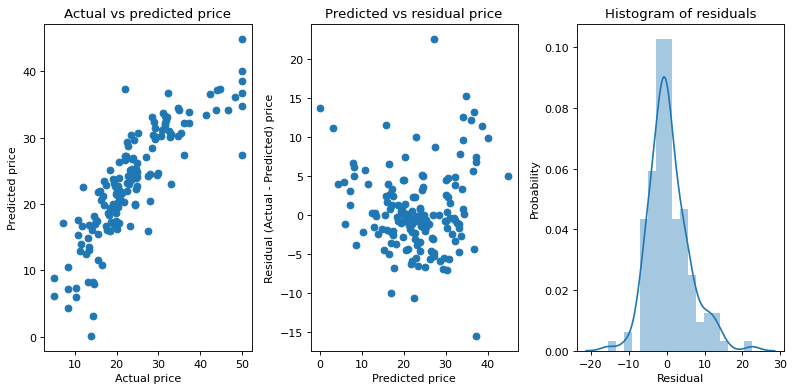

In [224]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model.alpha_))
print('l1_ratio_: %f' % elastic_cv_model.l1_ratio_)


#Model evaluation
model_a = ElasticNet(alpha=elastic_cv_model.alpha_, l1_ratio=elastic_cv_model.l1_ratio_)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = SEED)
model_a.fit(X_train, y_train)
y_pred_ela = model_a.predict(X_test)


mse_ela, rmse_ela, r2_ela = mse_rmse_r2(y_test,y_pred_ela)
print("RMSE: ", round(rmse_ela,3) , " and R2_SCORE: ",  round(r2_ela,3))

all_performance_plots(y_test,y_pred_ela)


alpha: 0.010000
l1_ratio_: 0.000000
RMSE:  5.696  and R2_SCORE:  0.673


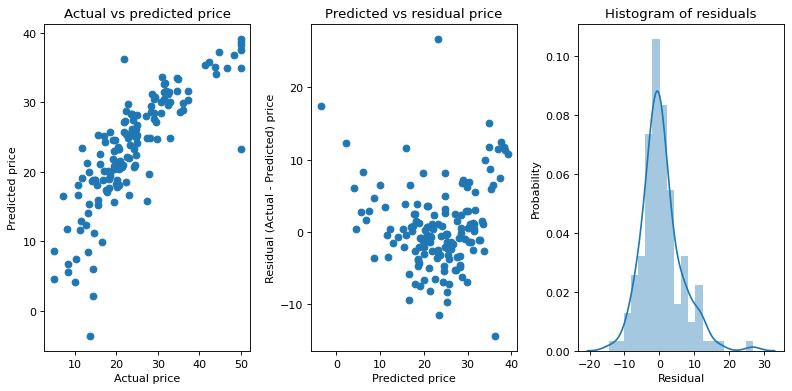

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model1 = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model1.fit(X_first_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model1.alpha_))
print('l1_ratio_: %f' % elastic_cv_model1.l1_ratio_)


#Model evaluation
model_a1 = ElasticNet(alpha=elastic_cv_model1.alpha_, l1_ratio=elastic_cv_model1.l1_ratio_)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_first_cutoff,y, test_size = 0.3, random_state = SEED)
model_a1.fit(X_train1, y_train1)
y_pred_ela1 = model_a1.predict(X_test1)


mse_ela1, rmse_ela1, r2_ela1 = mse_rmse_r2(y_test1,y_pred_ela1)
print("RMSE: ", round(rmse_ela1,3) , " and R2_SCORE: ",  round(r2_ela1,3))

all_performance_plots(y_test1,y_pred_ela1)


alpha: 0.000100
l1_ratio_: 0.000000
RMSE:  5.378  and R2_SCORE:  0.709


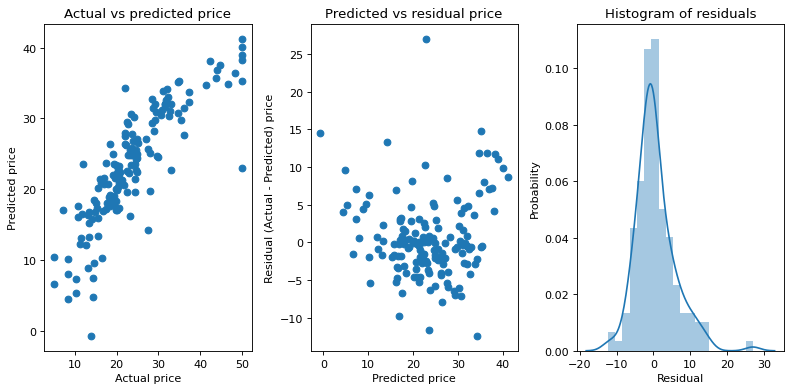

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model2 = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model2.fit(X_second_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model2.alpha_))
print('l1_ratio_: %f' % elastic_cv_model2.l1_ratio_)


#Model evaluation
model_a2 = ElasticNet(alpha=elastic_cv_model2.alpha_, l1_ratio=elastic_cv_model2.l1_ratio_)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_second_cutoff,y, test_size = 0.3, random_state = SEED)
model_a2.fit(X_train2, y_train2)
y_pred_ela2 = model_a2.predict(X_test2)


mse_ela2, rmse_ela2, r2_ela2 = mse_rmse_r2(y_test2,y_pred_ela2)
print("RMSE: ", round(rmse_ela2,3) , " and R2_SCORE: ",  round(r2_ela2,3))

all_performance_plots(y_test2,y_pred_ela2)


alpha: 0.010000
l1_ratio_: 0.160000
RMSE:  5.371  and R2_SCORE:  0.709


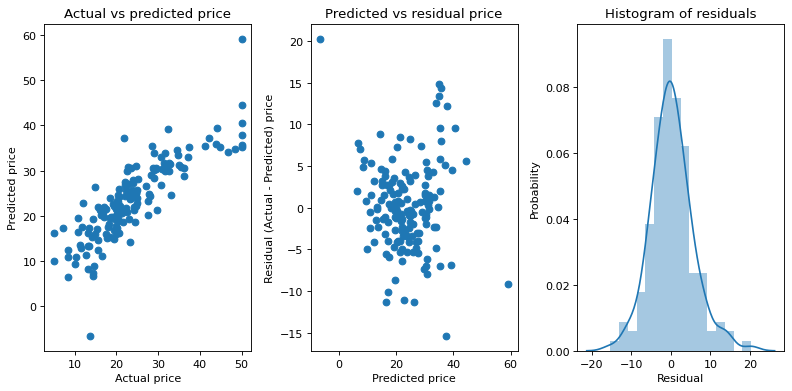

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model_qt = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model_qt.fit(df_qt, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model_qt.alpha_))
print('l1_ratio_: %f' % elastic_cv_model_qt.l1_ratio_)



#Model evaluation
model_elastic_qt = ElasticNet(alpha=elastic_cv_model_qt.alpha_, l1_ratio=elastic_cv_model_qt.l1_ratio_)
X_train_ela_qt, X_test_ela_qt, y_train_ela_qt, y_test_ela_qt = train_test_split(df_qt,y, test_size = 0.3, random_state = SEED)
model_elastic_qt.fit(X_train_ela_qt, y_train_ela_qt)
y_pred_ela_qt = model_elastic_qt.predict(X_test_ela_qt)


mse_ela_qt, rmse_ela_qt, r2_ela_qt = mse_rmse_r2(y_test_ela_qt,y_pred_ela_qt)
print("RMSE: ", round(rmse_ela_qt,3) , " and R2_SCORE: ",  round(r2_ela_qt,3))

all_performance_plots(y_test_ela_qt,y_pred_ela_qt)

alpha: 0.010000
l1_ratio_: 0.000000
RMSE:  5.641  and R2_SCORE:  0.679


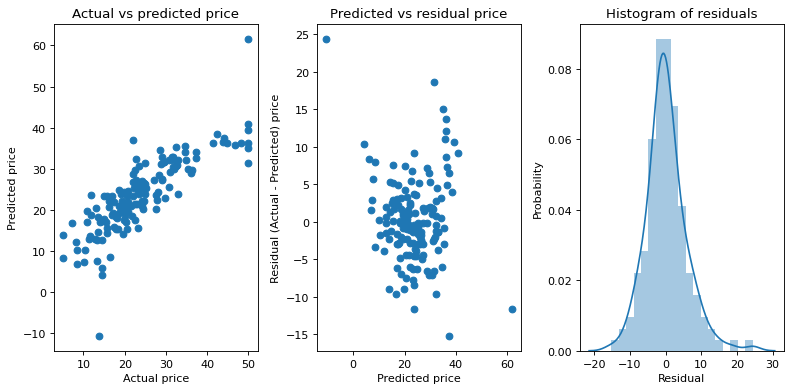

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_1 = df_qt[important_features_first_cutoff.Feature.to_list()]

# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model_qt1 = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model_qt1.fit(df_qt_1, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model_qt1.alpha_))
print('l1_ratio_: %f' % elastic_cv_model_qt1.l1_ratio_)


#Model evaluation
model_elastic_qt1 = ElasticNet(alpha=elastic_cv_model_qt1.alpha_, l1_ratio=elastic_cv_model_qt1.l1_ratio_)
X_train_ela_qt1, X_test_ela_qt1, y_train_ela_qt1, y_test_ela_qt1 = train_test_split(df_qt_1,y, test_size = 0.3, random_state = SEED)
model_elastic_qt1.fit(X_train_ela_qt1, y_train_ela_qt1)
y_pred_ela_qt1 = model_elastic_qt1.predict(X_test_ela_qt1)


mse_ela_qt1, rmse_ela_qt1, r2_ela_qt1 = mse_rmse_r2(y_test_ela_qt1,y_pred_ela_qt1)
print("RMSE: ", round(rmse_ela_qt1,3) , " and R2_SCORE: ",  round(r2_ela_qt1,3))

all_performance_plots(y_test_ela_qt1,y_pred_ela_qt1)

alpha: 0.010000
l1_ratio_: 0.000000
RMSE:  5.438  and R2_SCORE:  0.702


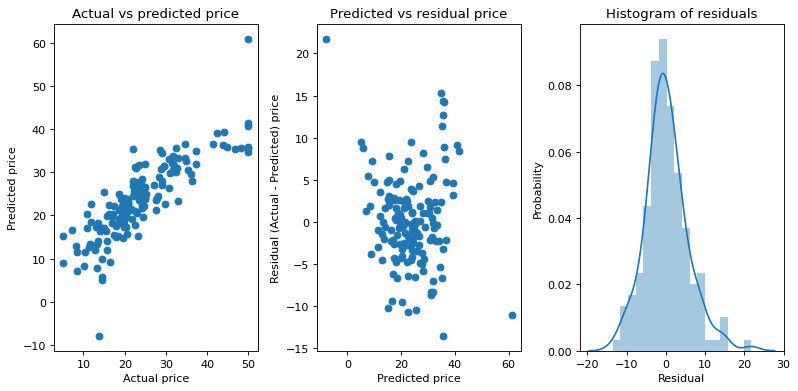

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_2 = df_qt[important_features_second_cutoff.Feature.to_list()]

# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_cv_model_qt2 = ElasticNetCV( l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, random_state = SEED)
# fit model on actual X, Y values 
elastic_cv_model_qt2.fit(df_qt_2, y)
# summarize chosen configuration
print('alpha: %f' % (elastic_cv_model_qt2.alpha_))
print('l1_ratio_: %f' % elastic_cv_model_qt2.l1_ratio_)


#Model evaluation
model_elastic_qt2 = ElasticNet(alpha=elastic_cv_model_qt2.alpha_, l1_ratio=elastic_cv_model_qt2.l1_ratio_)
X_train_ela_qt2, X_test_ela_qt2, y_train_ela_qt2, y_test_ela_qt2 = train_test_split(df_qt_2,y, test_size = 0.3, random_state = SEED)
model_elastic_qt2.fit(X_train_ela_qt2, y_train_ela_qt2)
y_pred_ela_qt2 = model_elastic_qt2.predict(X_test_ela_qt2)


mse_ela_qt2, rmse_ela_qt2, r2_ela_qt2 = mse_rmse_r2(y_test_ela_qt2,y_pred_ela_qt2)
print("RMSE: ", round(rmse_ela_qt2,3) , " and R2_SCORE: ",  round(r2_ela_qt2,3))

all_performance_plots(y_test_ela_qt2,y_pred_ela_qt2)

##**RIDGECV**

alpha: 0.000100
RMSE:  5.343  and R2_SCORE:  0.712


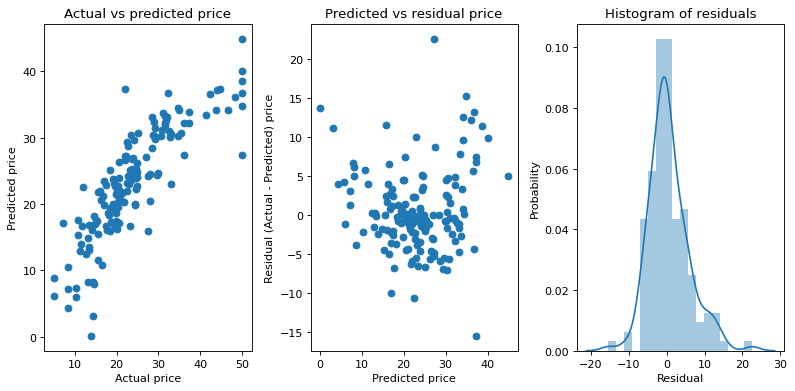

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model = RidgeCV( alphas=alphas, scoring = "neg_mean_squared_error", cv = cv)
# fit model on actual X, Y values 
ridge_cv_model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model.alpha_))


#Model evaluation
model_ridge0 = Ridge(alpha=ridge_cv_model.alpha_)
X_train_ridge0, X_test_ridge0, y_train_ridge0, y_test_ridge0 = train_test_split(X,y, test_size = 0.3, random_state = SEED)
model_ridge0.fit(X_train_ridge0, y_train_ridge0)
y_pred_ridge0 = model_ridge0.predict(X_test_ridge0)


mse_ridge0, rmse_ridge0, r2_ridge0 = mse_rmse_r2(y_test_ridge0,y_pred_ridge0)
print("RMSE: ", round(rmse_ridge0,3) , " and R2_SCORE: ",  round(r2_ridge0,3))

all_performance_plots(y_test_ridge0,y_pred_ridge0)


alpha: 10.000000
RMSE:  5.718  and R2_SCORE:  0.671


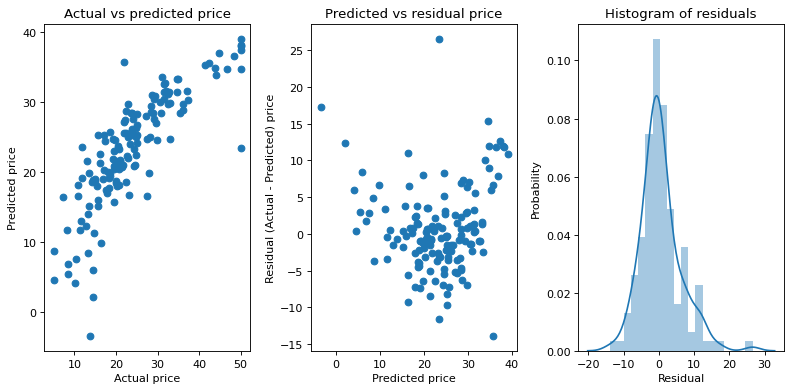

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model1 = RidgeCV( alphas=alphas, scoring = "neg_mean_squared_error", cv = cv)
# fit model on actual X, Y values 
ridge_cv_model1.fit(X_first_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model1.alpha_))


#Model evaluation
model_ridge1 = Ridge(alpha=ridge_cv_model1.alpha_)
X_train_ridge1, X_test_ridge1, y_train_ridge1, y_test_ridge1 = train_test_split(X_first_cutoff,y, test_size = 0.3, random_state = SEED)
model_ridge1.fit(X_train_ridge1, y_train_ridge1)
y_pred_ridge1 = model_ridge1.predict(X_test_ridge1)


mse_ridge1, rmse_ridge1, r2_ridge1 = mse_rmse_r2(y_test_ridge1,y_pred_ridge1)
print("RMSE: ", round(rmse_ridge1,3) , " and R2_SCORE: ",  round(r2_ridge1,3))

all_performance_plots(y_test_ridge1,y_pred_ridge1)


alpha: 0.100000
RMSE:  5.379  and R2_SCORE:  0.708


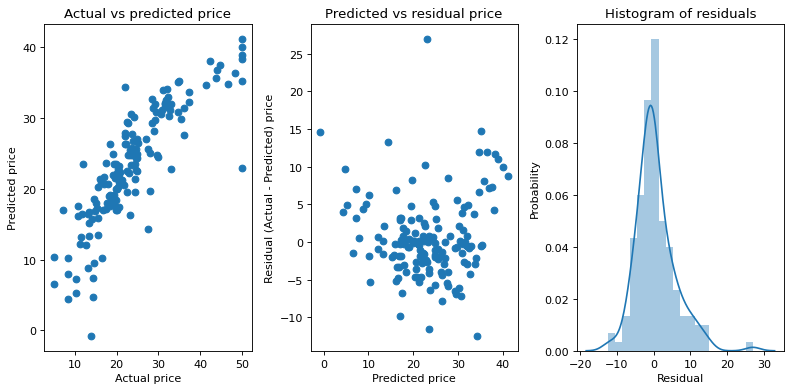

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model2 = RidgeCV( alphas=alphas, scoring = "neg_mean_squared_error", cv = cv)
# fit model on actual X, Y values 
ridge_cv_model2.fit(X_second_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model2.alpha_))


#Model evaluation
model_ridge2 = Ridge(alpha=ridge_cv_model2.alpha_)
X_train_ridge2, X_test_ridge2, y_train_ridge2, y_test_ridge2 = train_test_split(X_second_cutoff,y, test_size = 0.3, random_state = SEED)
model_ridge2.fit(X_train_ridge2, y_train_ridge2)
y_pred_ridge2 = model_ridge2.predict(X_test_ridge2)


mse_ridge2, rmse_ridge2, r2_ridge2 = mse_rmse_r2(y_test_ridge2,y_pred_ridge2)
print("RMSE: ", round(rmse_ridge2,3) , " and R2_SCORE: ",  round(r2_ridge2,3))

all_performance_plots(y_test_ridge2,y_pred_ridge2)


alpha: 10.000000
RMSE:  5.355  and R2_SCORE:  0.711


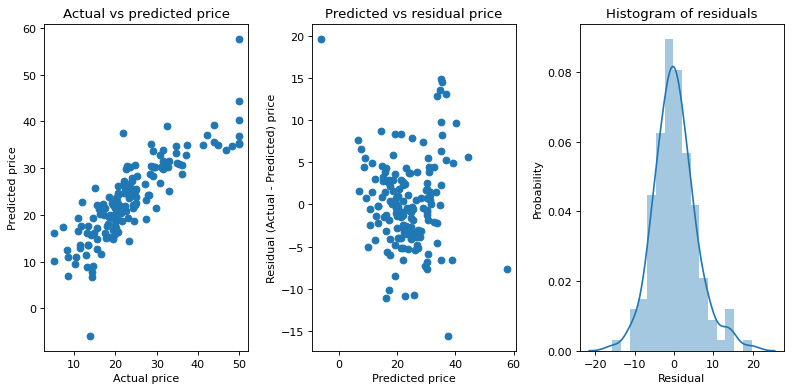

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model_qt = RidgeCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
ridge_cv_model_qt.fit(df_qt, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model_qt.alpha_))


#Model evaluation
model_ridge_qt = Ridge(alpha=ridge_cv_model_qt.alpha_)
X_train_ridge_qt, X_test_ridge_qt, y_train_ridge_qt, y_test_ridge_qt = train_test_split(df_qt,y, test_size = 0.3, random_state = SEED)
model_ridge_qt.fit(X_train_ridge_qt, y_train_ridge_qt)
y_pred_ridge_qt = model_ridge_qt.predict(X_test_ridge_qt)


mse_ridge_qt, rmse_ridge_qt, r2_ridge_qt = mse_rmse_r2(y_test_ridge_qt,y_pred_ridge_qt)
print("RMSE: ", round(rmse_ridge_qt,3) , " and R2_SCORE: ",  round(r2_ridge_qt,3))

all_performance_plots(y_test_ridge_qt,y_pred_ridge_qt)

alpha: 10.000000
RMSE:  5.613  and R2_SCORE:  0.683


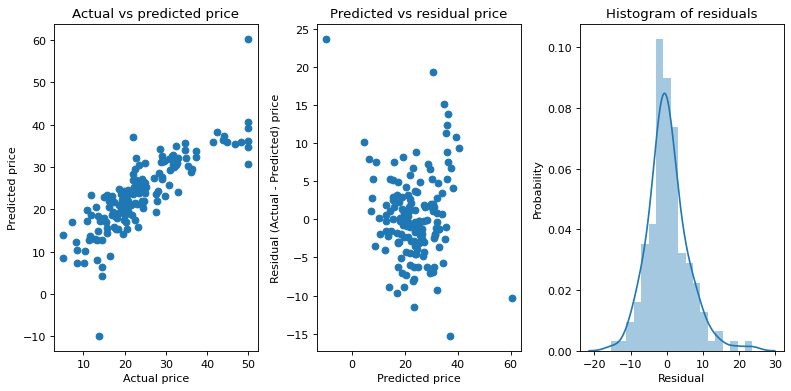

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_1 = df_qt[important_features_first_cutoff.Feature.to_list()]
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model_qt1 = RidgeCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
ridge_cv_model_qt1.fit(df_qt_1, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model_qt1.alpha_))


#Model evaluation
model_ridge_qt1 = Ridge(alpha=ridge_cv_model_qt1.alpha_)
X_train_ridge_qt1, X_test_ridge_qt1, y_train_ridge_qt1, y_test_ridge_qt1 = train_test_split(df_qt_1,y, test_size = 0.3, random_state = SEED)
model_ridge_qt1.fit(X_train_ridge_qt1, y_train_ridge_qt1)
y_pred_ridge_qt1 = model_ridge_qt1.predict(X_test_ridge_qt1)


mse_ridge_qt1, rmse_ridge_qt1, r2_ridge_qt1 = mse_rmse_r2(y_test_ridge_qt1,y_pred_ridge_qt1)
print("RMSE: ", round(rmse_ridge_qt1,3) , " and R2_SCORE: ",  round(r2_ridge_qt1,3))

all_performance_plots(y_test_ridge_qt1,y_pred_ridge_qt1)

alpha: 10.000000
RMSE:  5.417  and R2_SCORE:  0.704


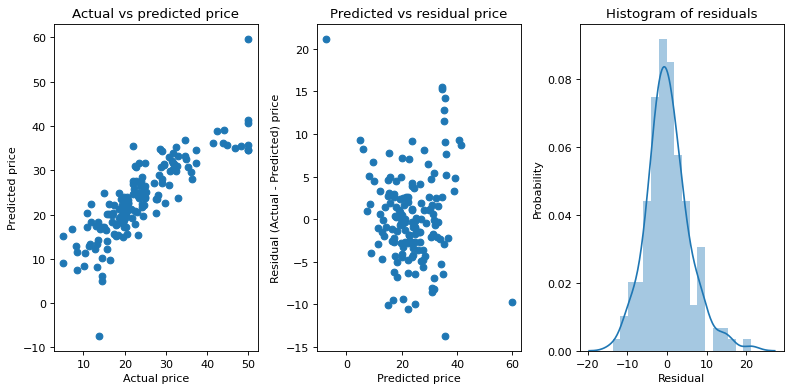

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_2 = df_qt[important_features_second_cutoff.Feature.to_list()]
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ridge_cv_model_qt2 = RidgeCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
ridge_cv_model_qt2.fit(df_qt_2, y)
# summarize chosen configuration
print('alpha: %f' % (ridge_cv_model_qt2.alpha_))


#Model evaluation
model_ridge_qt2 = Ridge(alpha=ridge_cv_model_qt2.alpha_)
X_train_ridge_qt2, X_test_ridge_qt2, y_train_ridge_qt2, y_test_ridge_qt2 = train_test_split(df_qt_2,y, test_size = 0.3, random_state = SEED)
model_ridge_qt2.fit(X_train_ridge_qt2, y_train_ridge_qt2)
y_pred_ridge_qt2 = model_ridge_qt2.predict(X_test_ridge_qt2)


mse_ridge_qt2, rmse_ridge_qt2, r2_ridge_qt2 = mse_rmse_r2(y_test_ridge_qt2,y_pred_ridge_qt2)
print("RMSE: ", round(rmse_ridge_qt2,3) , " and R2_SCORE: ",  round(r2_ridge_qt2,3))

all_performance_plots(y_test_ridge_qt2,y_pred_ridge_qt2)

##**LASSOCV**

alpha: 0.000000
RMSE:  5.343  and R2_SCORE:  0.712


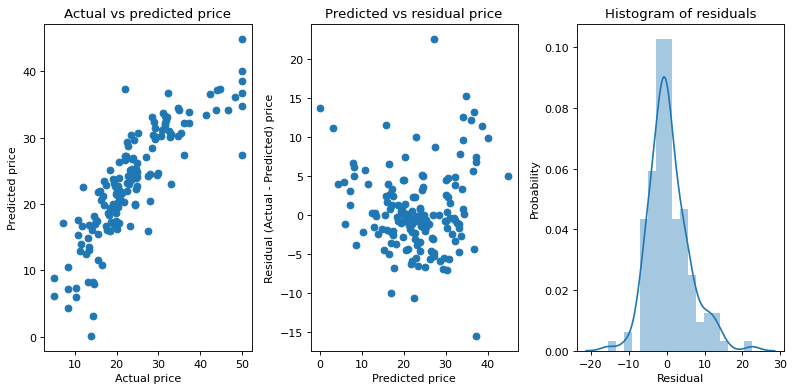

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model.alpha_))


#Model evaluation
model_lasso0 = Lasso(alpha=lasso_cv_model.alpha_)
X_train_lasso0, X_test_lasso0, y_train_lasso0, y_test_lasso0 = train_test_split(X,y, test_size = 0.3, random_state = SEED)
model_lasso0.fit(X_train_lasso0, y_train_lasso0)
y_pred_lasso0 = model_lasso0.predict(X_test_lasso0)


mse_lasso0, rmse_lasso0, r2_lasso0 = mse_rmse_r2(y_test_lasso0,y_pred_lasso0)
print("RMSE: ", round(rmse_lasso0,3) , " and R2_SCORE: ",  round(r2_lasso0,3))

all_performance_plots(y_test_lasso0,y_pred_lasso0)


alpha: 0.010000
RMSE:  5.686  and R2_SCORE:  0.674


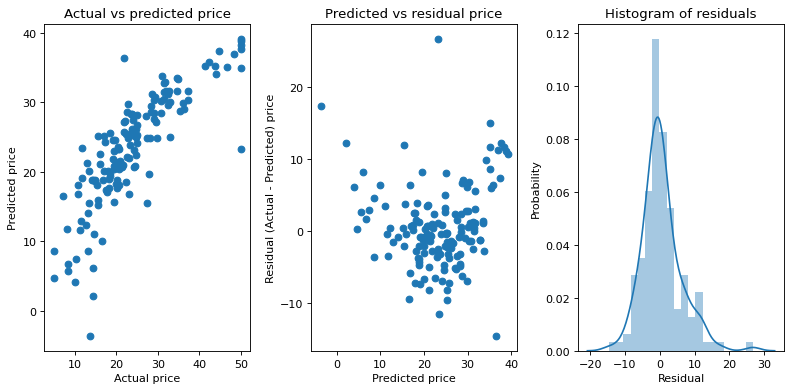

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model1 = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model1.fit(X_first_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model1.alpha_))


#Model evaluation
model_lasso1 = Lasso(alpha=lasso_cv_model1.alpha_)
X_train_lasso1, X_test_lasso1, y_train_lasso1, y_test_lasso1 = train_test_split(X_first_cutoff,y, test_size = 0.3, random_state = SEED)
model_lasso1.fit(X_train_lasso1, y_train_lasso1)
y_pred_lasso1 = model_lasso1.predict(X_test_lasso1)


mse_lasso1, rmse_lasso1, r2_lasso1 = mse_rmse_r2(y_test_lasso1,y_pred_lasso1)
print("RMSE: ", round(rmse_lasso1,3) , " and R2_SCORE: ",  round(r2_lasso1,3))

all_performance_plots(y_test_lasso1,y_pred_lasso1)


alpha: 0.000000
RMSE:  5.377  and R2_SCORE:  0.709


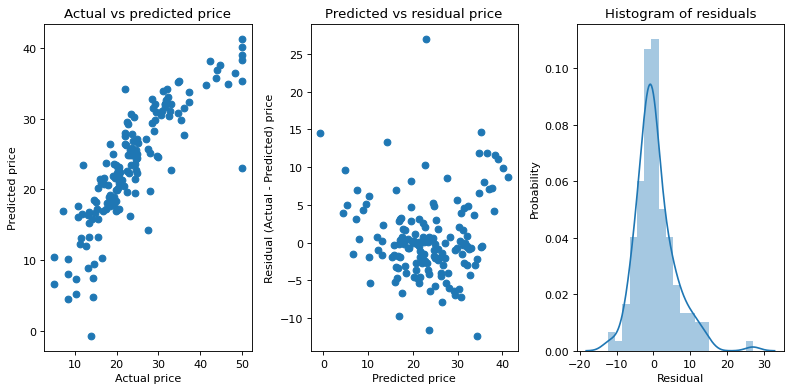

In [ ]:
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model2 = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model2.fit(X_second_cutoff, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model2.alpha_))


#Model evaluation
model_lasso2 = Lasso(alpha=lasso_cv_model2.alpha_)
X_train_lasso2, X_test_lasso2, y_train_lasso2, y_test_lasso2 = train_test_split(X_second_cutoff,y, test_size = 0.3, random_state = SEED)
model_lasso2.fit(X_train_lasso2, y_train_lasso2)
y_pred_lasso2 = model_lasso2.predict(X_test_lasso2)


mse_lasso2, rmse_lasso2, r2_lasso2 = mse_rmse_r2(y_test_lasso2,y_pred_lasso2)
print("RMSE: ", round(rmse_lasso2,3) , " and R2_SCORE: ",  round(r2_lasso2,3))

all_performance_plots(y_test_lasso2,y_pred_lasso2)


alpha: 0.010000
RMSE:  5.378  and R2_SCORE:  0.709


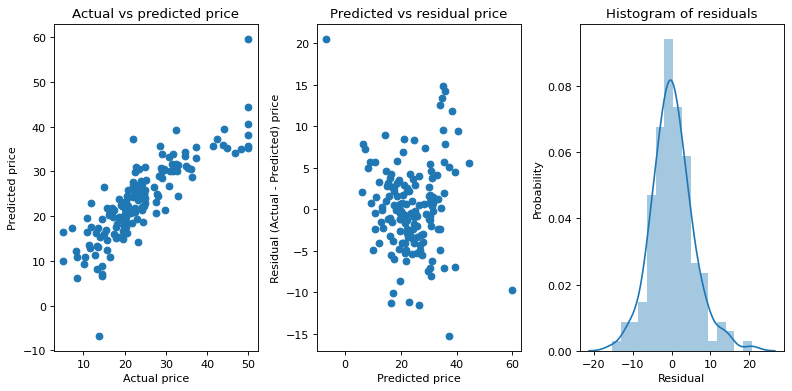

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model_qt = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model_qt.fit(df_qt, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model_qt.alpha_))


#Model evaluation
model_lasso_qt = Lasso(alpha=lasso_cv_model_qt.alpha_)
X_train_lasso_qt, X_test_lasso_qt, y_train_lasso_qt, y_test_lasso_qt = train_test_split(df_qt,y, test_size = 0.3, random_state = SEED)
model_lasso_qt.fit(X_train_lasso_qt, y_train_lasso_qt)
y_pred_lasso_qt = model_lasso_qt.predict(X_test_lasso_qt)


mse_lasso_qt, rmse_lasso_qt, r2_lasso_qt = mse_rmse_r2(y_test_lasso_qt,y_pred_lasso_qt)
print("RMSE: ", round(rmse_lasso_qt,3) , " and R2_SCORE: ",  round(r2_lasso_qt,3))

all_performance_plots(y_test_lasso_qt,y_pred_lasso_qt)

alpha: 0.010000
RMSE:  5.666  and R2_SCORE:  0.677


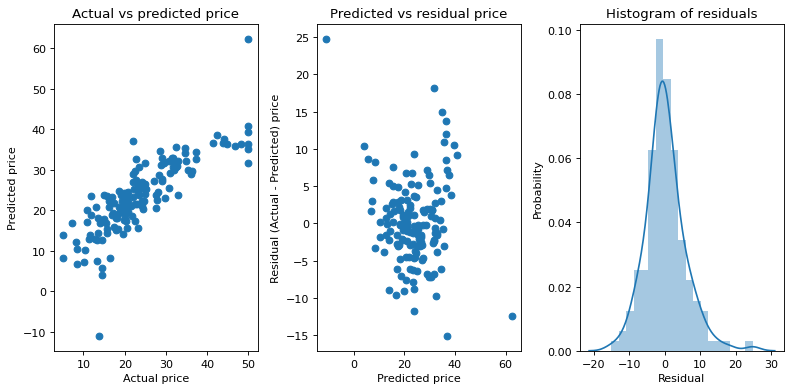

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_1 = df_qt[important_features_first_cutoff.Feature.to_list()]
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model_qt1 = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model_qt1.fit(df_qt_1, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model_qt1.alpha_))


#Model evaluation
model_lasso_qt1 = Lasso(alpha=lasso_cv_model_qt1.alpha_)
X_train_lasso_qt1, X_test_lasso_qt1, y_train_lasso_qt1, y_test_lasso_qt1 = train_test_split(df_qt_1,y, test_size = 0.3, random_state = SEED)
model_lasso_qt1.fit(X_train_lasso_qt1, y_train_lasso_qt1)
y_pred_lasso_qt1 = model_lasso_qt1.predict(X_test_lasso_qt1)


mse_lasso_qt1, rmse_lasso_qt1, r2_lasso_qt1 = mse_rmse_r2(y_test_lasso_qt1,y_pred_lasso_qt1)
print("RMSE: ", round(rmse_lasso_qt1,3) , " and R2_SCORE: ",  round(r2_lasso_qt1,3))

all_performance_plots(y_test_lasso_qt1,y_pred_lasso_qt1)

alpha: 0.000000
RMSE:  5.455  and R2_SCORE:  0.7


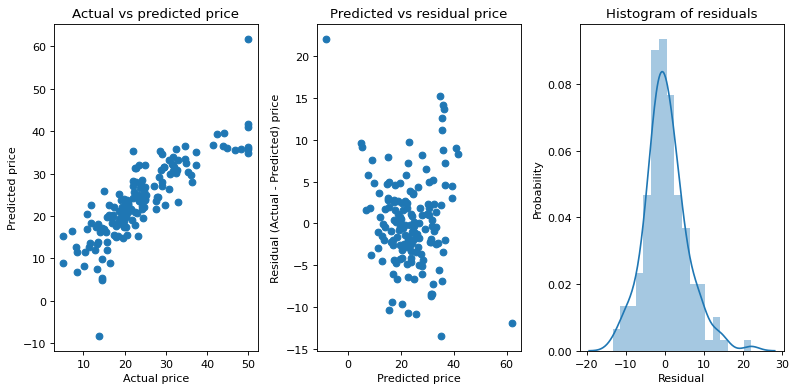

In [ ]:
#After quantile transformation
# use automatically configured elastic net algorithm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
df_qt_2 = df_qt[important_features_second_cutoff.Feature.to_list()]
# define model
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
lasso_cv_model_qt2 = LassoCV(alphas=alphas,  cv = cv)
# fit model on actual X, Y values 
lasso_cv_model_qt2.fit(df_qt_2, y)
# summarize chosen configuration
print('alpha: %f' % (lasso_cv_model_qt2.alpha_))


#Model evaluation
model_lasso_qt2 = Lasso(alpha=lasso_cv_model_qt2.alpha_)
X_train_lasso_qt2, X_test_lasso_qt2, y_train_lasso_qt2, y_test_lasso_qt2 = train_test_split(df_qt_2,y, test_size = 0.3, random_state = SEED)
model_lasso_qt2.fit(X_train_lasso_qt2, y_train_lasso_qt2)
y_pred_lasso_qt2 = model_lasso_qt2.predict(X_test_lasso_qt2)


mse_lasso_qt2, rmse_lasso_qt2, r2_lasso_qt2 = mse_rmse_r2(y_test_lasso_qt2,y_pred_lasso_qt2)
print("RMSE: ", round(rmse_lasso_qt2,3) , " and R2_SCORE: ",  round(r2_lasso_qt2,3))

all_performance_plots(y_test_lasso_qt2,y_pred_lasso_qt2)

##**HYPER PARAMETER TUNING (USING OPTUNA LIBRARY)**

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 17.9MB/s 
     |████████████████████████████████| 163kB 53.5MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 143kB 34.8MB/s 
     |████████████████████████████████| 112kB 39.2MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=23a123616fc2fc69c495bfdae8b205012e6c8fb8ec13f5520da0e05271efd9cd
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


###ELASTICNET

In [ ]:
# Importing the Packages:
import optuna

input_data= X
target_data = y

#Step 1. Define an objective function to be maximized.
def objective(trial):

    #model_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    ## Step 2. Setup values for the hyperparameters:
    #if model_name == 'LogReg':
    #    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
    #    classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    #else:
    #    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    #    classifier_obj = ensemble.RandomForestClassifier(
    #        max_depth=rf_max_depth, n_estimators=rf_n_estimators
    #    )
    elastic_alpha = trial.suggest_float("elastic_alpha", 1e-5, 1e2)
    elastic_l1 = trial.suggest_float("elastic_l1", 0,1)
    #rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    reg_model = ElasticNet(alpha = elastic_alpha, l1_ratio=elastic_l1, random_state=SEED)

    # Step 3: Scoring method:
    scores = cross_val_score(reg_model, input_data, target_data, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    mean_score = np.mean(np.abs(scores))
    return mean_score

# Step 4: Running it
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

[I 2021-05-01 11:19:20,267] A new study created in memory with name: no-name-14a0ba1a-241d-4fe4-83ca-e08a919931e6
[I 2021-05-01 11:19:20,323] Trial 0 finished with value: 72.88752198270153 and parameters: {'elastic_alpha': 93.33853631131387, 'elastic_l1': 0.6222005105808336}. Best is trial 0 with value: 72.88752198270153.
[I 2021-05-01 11:19:20,368] Trial 1 finished with value: 64.64161511211574 and parameters: {'elastic_alpha': 77.01584087336033, 'elastic_l1': 0.27669609013786745}. Best is trial 1 with value: 64.64161511211574.
[I 2021-05-01 11:19:20,416] Trial 2 finished with value: 72.8826315843064 and parameters: {'elastic_alpha': 99.55471248423297, 'elastic_l1': 0.5800538315813156}. Best is trial 1 with value: 64.64161511211574.
[I 2021-05-01 11:19:20,462] Trial 3 finished with value: 69.28765896623223 and parameters: {'elastic_alpha': 74.72540608025194, 'elastic_l1': 0.3739731152471343}. Best is trial 1 with value: 64.64161511211574.
[I 2021-05-01 11:19:20,508] Trial 4 finished w

The best trial is : 
FrozenTrial(number=66, values=[31.025232685372288], datetime_start=datetime.datetime(2021, 5, 1, 11, 19, 23, 744554), datetime_complete=datetime.datetime(2021, 5, 1, 11, 19, 23, 802233), params={'elastic_alpha': 0.5204624375189931, 'elastic_l1': 0.5539760491428456}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=66, state=TrialState.COMPLETE, value=None)
The best value is : 
31.025232685372288
The best parameters are : 
{'elastic_alpha': 0.5204624375189931, 'elastic_l1': 0.5539760491428456}


In [ ]:
input_data= X_first_cutoff
target_data = y

# Step 4: Running it
study_ela1 = optuna.create_study(direction="minimize")
study_ela1.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ela1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ela1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ela1.best_params}")

[I 2021-05-01 11:19:25,611] A new study created in memory with name: no-name-f794dbfd-0513-49a9-9dd5-08f3f9685aec
[I 2021-05-01 11:19:25,663] Trial 0 finished with value: 56.21885372459652 and parameters: {'elastic_alpha': 46.764924003233595, 'elastic_l1': 0.12917963254141795}. Best is trial 0 with value: 56.21885372459652.
[I 2021-05-01 11:19:25,711] Trial 1 finished with value: 57.840778402929075 and parameters: {'elastic_alpha': 31.441169032471937, 'elastic_l1': 0.5604948263636589}. Best is trial 0 with value: 56.21885372459652.
[I 2021-05-01 11:19:25,758] Trial 2 finished with value: 95.63076257856497 and parameters: {'elastic_alpha': 96.50666056581127, 'elastic_l1': 0.519041904353928}. Best is trial 0 with value: 56.21885372459652.
[I 2021-05-01 11:19:25,802] Trial 3 finished with value: 62.221470923030964 and parameters: {'elastic_alpha': 37.74199113685139, 'elastic_l1': 0.55545907625165}. Best is trial 0 with value: 56.21885372459652.
[I 2021-05-01 11:19:25,853] Trial 4 finished

The best trial is : 
FrozenTrial(number=38, values=[33.312433645235686], datetime_start=datetime.datetime(2021, 5, 1, 11, 19, 27, 523663), datetime_complete=datetime.datetime(2021, 5, 1, 11, 19, 27, 573516), params={'elastic_alpha': 0.2289286952178226, 'elastic_l1': 0.7247480038815303}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=38, state=TrialState.COMPLETE, value=None)
The best value is : 
33.312433645235686
The best parameters are : 
{'elastic_alpha': 0.2289286952178226, 'elastic_l1': 0.7247480038815303}


In [ ]:
input_data= X_second_cutoff
target_data = y

# Step 4: Running it
study_ela2 = optuna.create_study(direction="minimize")
study_ela2.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ela2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ela2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ela2.best_params}")

[I 2021-05-01 11:19:30,813] A new study created in memory with name: no-name-e90c8f54-d016-4b1e-a856-4624681c6a7c
[I 2021-05-01 11:19:30,866] Trial 0 finished with value: 84.79309400818094 and parameters: {'elastic_alpha': 56.64945475106431, 'elastic_l1': 0.7079621783495935}. Best is trial 0 with value: 84.79309400818094.
[I 2021-05-01 11:19:30,915] Trial 1 finished with value: 59.05458440654161 and parameters: {'elastic_alpha': 33.292068642975316, 'elastic_l1': 0.567803282822655}. Best is trial 1 with value: 59.05458440654161.
[I 2021-05-01 11:19:30,962] Trial 2 finished with value: 93.82098954085329 and parameters: {'elastic_alpha': 98.12718737589861, 'elastic_l1': 0.9298884510007978}. Best is trial 1 with value: 59.05458440654161.
[I 2021-05-01 11:19:31,009] Trial 3 finished with value: 45.126556191414494 and parameters: {'elastic_alpha': 9.207784311526225, 'elastic_l1': 0.9781404734761228}. Best is trial 3 with value: 45.126556191414494.
[I 2021-05-01 11:19:31,062] Trial 4 finished

The best trial is : 
FrozenTrial(number=84, values=[31.19395522413499], datetime_start=datetime.datetime(2021, 5, 1, 11, 19, 35, 114008), datetime_complete=datetime.datetime(2021, 5, 1, 11, 19, 35, 161049), params={'elastic_alpha': 0.22457805505856104, 'elastic_l1': 0.07368977022565198}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=84, state=TrialState.COMPLETE, value=None)
The best value is : 
31.19395522413499
The best parameters are : 
{'elastic_alpha': 0.22457805505856104, 'elastic_l1': 0.07368977022565198}


In [ ]:
#After quantile transformation
input_data= df_qt
target_data = y

# Step 4: Running it
study_elastic_qt = optuna.create_study(direction="minimize")
study_elastic_qt.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_elastic_qt.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_elastic_qt.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_elastic_qt.best_params}")

[I 2021-05-01 11:51:54,672] A new study created in memory with name: no-name-6922a1c5-72db-41db-87a0-bc8bb214d10a
[I 2021-05-01 11:51:54,727] Trial 0 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 90.28167210511002, 'elastic_l1': 0.7806820477743366}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:51:54,775] Trial 1 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 57.517028827369984, 'elastic_l1': 0.372142434199055}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:51:54,823] Trial 2 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 96.14975157036474, 'elastic_l1': 0.8881247602938785}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:51:54,872] Trial 3 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 87.2694877168574, 'elastic_l1': 0.7282833967102849}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:51:54,920] Trial 4 finished wi

The best trial is : 
FrozenTrial(number=56, values=[30.085247318069342], datetime_start=datetime.datetime(2021, 5, 1, 11, 51, 57, 640543), datetime_complete=datetime.datetime(2021, 5, 1, 11, 51, 57, 689986), params={'elastic_alpha': 0.15804748233206536, 'elastic_l1': 0.7172878383898679}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=56, state=TrialState.COMPLETE, value=None)
The best value is : 
30.085247318069342
The best parameters are : 
{'elastic_alpha': 0.15804748233206536, 'elastic_l1': 0.7172878383898679}


In [ ]:
input_data= df_qt[important_features_first_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_elastic_qt1 = optuna.create_study(direction="minimize")
study_elastic_qt1.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_elastic_qt1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_elastic_qt1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_elastic_qt1.best_params}")

[I 2021-05-01 11:52:06,214] A new study created in memory with name: no-name-c8aceaba-a574-4aa7-b443-f2e0040578d7
[I 2021-05-01 11:52:06,278] Trial 0 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 34.69289746107526, 'elastic_l1': 0.6721732985206106}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:52:06,333] Trial 1 finished with value: 74.1470659203124 and parameters: {'elastic_alpha': 7.9604678563435245, 'elastic_l1': 0.16252386595915524}. Best is trial 1 with value: 74.1470659203124.
[I 2021-05-01 11:52:06,382] Trial 2 finished with value: 95.58867802628556 and parameters: {'elastic_alpha': 90.81053262558834, 'elastic_l1': 0.05974087083137114}. Best is trial 1 with value: 74.1470659203124.
[I 2021-05-01 11:52:06,428] Trial 3 finished with value: 46.172787821125766 and parameters: {'elastic_alpha': 2.620175000744672, 'elastic_l1': 0.9662948347840083}. Best is trial 3 with value: 46.172787821125766.
[I 2021-05-01 11:52:06,476] Trial 4 finished

The best trial is : 
FrozenTrial(number=63, values=[32.203442370616216], datetime_start=datetime.datetime(2021, 5, 1, 11, 52, 9, 449100), datetime_complete=datetime.datetime(2021, 5, 1, 11, 52, 9, 503484), params={'elastic_alpha': 0.07236902617043424, 'elastic_l1': 0.7993330300014281}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=63, state=TrialState.COMPLETE, value=None)
The best value is : 
32.203442370616216
The best parameters are : 
{'elastic_alpha': 0.07236902617043424, 'elastic_l1': 0.7993330300014281}


In [ ]:
input_data= df_qt[important_features_second_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_elastic_qt2 = optuna.create_study(direction="minimize")
study_elastic_qt2.optimize(objective, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_elastic_qt2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_elastic_qt2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_elastic_qt2.best_params}")

[I 2021-05-01 11:52:11,437] A new study created in memory with name: no-name-bc2e3bc1-b9c5-4319-a426-b329fe0056da
[I 2021-05-01 11:52:11,489] Trial 0 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 14.391981925674287, 'elastic_l1': 0.9946987947311117}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:52:11,535] Trial 1 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 72.66442090322131, 'elastic_l1': 0.18059746698350687}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:52:11,581] Trial 2 finished with value: 81.51444761094172 and parameters: {'elastic_alpha': 7.961954586446206, 'elastic_l1': 0.5876897108755453}. Best is trial 2 with value: 81.51444761094172.
[I 2021-05-01 11:52:11,630] Trial 3 finished with value: 96.03278248852249 and parameters: {'elastic_alpha': 99.75099688011235, 'elastic_l1': 0.7554089112938025}. Best is trial 2 with value: 81.51444761094172.
[I 2021-05-01 11:52:11,680] Trial 4 finished

The best trial is : 
FrozenTrial(number=70, values=[30.892499270753785], datetime_start=datetime.datetime(2021, 5, 1, 11, 52, 15, 155846), datetime_complete=datetime.datetime(2021, 5, 1, 11, 52, 15, 208144), params={'elastic_alpha': 0.012032475205651372, 'elastic_l1': 0.8065085162721205}, distributions={'elastic_alpha': UniformDistribution(high=100.0, low=1e-05), 'elastic_l1': UniformDistribution(high=1.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=70, state=TrialState.COMPLETE, value=None)
The best value is : 
30.892499270753785
The best parameters are : 
{'elastic_alpha': 0.012032475205651372, 'elastic_l1': 0.8065085162721205}


###RIDGE REGRESSION

In [ ]:
input_data= X
target_data = y

#Step 1. Define an objective function to be maximized.
def objective_ridge(trial):

    #model_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    ## Step 2. Setup values for the hyperparameters:
    #if model_name == 'LogReg':
    #    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
    #    classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    #else:
    #    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    #    classifier_obj = ensemble.RandomForestClassifier(
    #        max_depth=rf_max_depth, n_estimators=rf_n_estimators
    #    )
    ridge_alpha = trial.suggest_float("ridge_alpha", 1e-5, 1e2)
    #rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    reg_model = Ridge(alpha = ridge_alpha, random_state=SEED)

    # Step 3: Scoring method:
    scores = cross_val_score(reg_model, input_data, target_data, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    mean_score = np.mean(np.abs(scores))
    return mean_score

# Step 4: Running it
study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge.best_params}")

[I 2021-05-01 11:29:38,823] A new study created in memory with name: no-name-0215ba1f-4716-4319-b45b-1aca52fbc5d1
[I 2021-05-01 11:29:38,879] Trial 0 finished with value: 31.98791203176534 and parameters: {'ridge_alpha': 25.104970918874074}. Best is trial 0 with value: 31.98791203176534.
[I 2021-05-01 11:29:38,923] Trial 1 finished with value: 29.994814650249236 and parameters: {'ridge_alpha': 89.81509407921405}. Best is trial 1 with value: 29.994814650249236.
[I 2021-05-01 11:29:38,972] Trial 2 finished with value: 33.469402103334595 and parameters: {'ridge_alpha': 9.409376108298712}. Best is trial 1 with value: 29.994814650249236.
[I 2021-05-01 11:29:39,021] Trial 3 finished with value: 31.481897397576983 and parameters: {'ridge_alpha': 33.2728261074989}. Best is trial 1 with value: 29.994814650249236.
[I 2021-05-01 11:29:39,069] Trial 4 finished with value: 29.974383121714737 and parameters: {'ridge_alpha': 91.87667926834136}. Best is trial 4 with value: 29.974383121714737.
[I 2021-

The best trial is : 
FrozenTrial(number=80, values=[29.905756189526308], datetime_start=datetime.datetime(2021, 5, 1, 11, 29, 42, 769749), datetime_complete=datetime.datetime(2021, 5, 1, 11, 29, 42, 815091), params={'ridge_alpha': 99.99265760012574}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=80, state=TrialState.COMPLETE, value=None)
The best value is : 
29.905756189526308
The best parameters are : 
{'ridge_alpha': 99.99265760012574}


In [ ]:
input_data= X_first_cutoff
target_data = y

# Step 4: Running it
study_ridge1 = optuna.create_study(direction="minimize")
study_ridge1.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge1.best_params}")

[I 2021-05-01 11:29:46,958] A new study created in memory with name: no-name-da5cbd46-13ba-455c-bcc4-ba9c215efd6c
[I 2021-05-01 11:29:47,013] Trial 0 finished with value: 32.37644823420229 and parameters: {'ridge_alpha': 72.74439106071966}. Best is trial 0 with value: 32.37644823420229.
[I 2021-05-01 11:29:47,059] Trial 1 finished with value: 32.44299735843802 and parameters: {'ridge_alpha': 57.04928718994841}. Best is trial 0 with value: 32.37644823420229.
[I 2021-05-01 11:29:47,102] Trial 2 finished with value: 32.37221936902099 and parameters: {'ridge_alpha': 74.68050074455151}. Best is trial 2 with value: 32.37221936902099.
[I 2021-05-01 11:29:47,148] Trial 3 finished with value: 32.51201064839071 and parameters: {'ridge_alpha': 48.4134451107797}. Best is trial 2 with value: 32.37221936902099.
[I 2021-05-01 11:29:47,190] Trial 4 finished with value: 33.05977502365282 and parameters: {'ridge_alpha': 19.236698293489603}. Best is trial 2 with value: 32.37221936902099.
[I 2021-05-01 11

The best trial is : 
FrozenTrial(number=39, values=[32.36034903876901], datetime_start=datetime.datetime(2021, 5, 1, 11, 29, 48, 808081), datetime_complete=datetime.datetime(2021, 5, 1, 11, 29, 48, 852189), params={'ridge_alpha': 87.44673919052656}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=39, state=TrialState.COMPLETE, value=None)
The best value is : 
32.36034903876901
The best parameters are : 
{'ridge_alpha': 87.44673919052656}


In [ ]:
input_data= X_second_cutoff
target_data = y

# Step 4: Running it
study_ridge2 = optuna.create_study(direction="minimize")
study_ridge2.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge2.best_params}")

[I 2021-05-01 11:29:54,989] A new study created in memory with name: no-name-b31e2c39-5d2e-4529-a67f-6dc195b6ccec
[I 2021-05-01 11:29:55,039] Trial 0 finished with value: 31.128710128842243 and parameters: {'ridge_alpha': 94.80112168340526}. Best is trial 0 with value: 31.128710128842243.
[I 2021-05-01 11:29:55,082] Trial 1 finished with value: 31.12643953726025 and parameters: {'ridge_alpha': 88.10297613854925}. Best is trial 1 with value: 31.12643953726025.
[I 2021-05-01 11:29:55,125] Trial 2 finished with value: 31.180119212915297 and parameters: {'ridge_alpha': 65.91232593317893}. Best is trial 1 with value: 31.12643953726025.
[I 2021-05-01 11:29:55,167] Trial 3 finished with value: 32.41569982860675 and parameters: {'ridge_alpha': 10.030927185724876}. Best is trial 1 with value: 31.12643953726025.
[I 2021-05-01 11:29:55,212] Trial 4 finished with value: 31.15766749651263 and parameters: {'ridge_alpha': 70.89726540893022}. Best is trial 1 with value: 31.12643953726025.
[I 2021-05-0

The best trial is : 
FrozenTrial(number=68, values=[31.126357224917864], datetime_start=datetime.datetime(2021, 5, 1, 11, 29, 58, 270853), datetime_complete=datetime.datetime(2021, 5, 1, 11, 29, 58, 315980), params={'ridge_alpha': 89.13697403034466}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=68, state=TrialState.COMPLETE, value=None)
The best value is : 
31.126357224917864
The best parameters are : 
{'ridge_alpha': 89.13697403034466}


In [ ]:
#After quantile transformation
input_data= df_qt
target_data = y

# Step 4: Running it
study_ridge_qt = optuna.create_study(direction="minimize")
study_ridge_qt.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge_qt.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge_qt.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge_qt.best_params}")

[I 2021-05-01 11:47:04,030] A new study created in memory with name: no-name-ccc77b3f-5dad-46b6-9166-67b80e992b6d
[I 2021-05-01 11:47:04,087] Trial 0 finished with value: 31.01690496048925 and parameters: {'ridge_alpha': 74.61341527202852}. Best is trial 0 with value: 31.01690496048925.
[I 2021-05-01 11:47:04,145] Trial 1 finished with value: 31.203489395977847 and parameters: {'ridge_alpha': 82.85109127500938}. Best is trial 0 with value: 31.01690496048925.
[I 2021-05-01 11:47:04,195] Trial 2 finished with value: 31.366769389747695 and parameters: {'ridge_alpha': 89.7389943309092}. Best is trial 0 with value: 31.01690496048925.
[I 2021-05-01 11:47:04,244] Trial 3 finished with value: 30.52142782629349 and parameters: {'ridge_alpha': 9.789977579000418}. Best is trial 3 with value: 30.52142782629349.
[I 2021-05-01 11:47:04,293] Trial 4 finished with value: 31.36886489821533 and parameters: {'ridge_alpha': 89.82589847397585}. Best is trial 3 with value: 30.52142782629349.
[I 2021-05-01 1

The best trial is : 
FrozenTrial(number=77, values=[30.34848132890603], datetime_start=datetime.datetime(2021, 5, 1, 11, 47, 7, 856625), datetime_complete=datetime.datetime(2021, 5, 1, 11, 47, 7, 910499), params={'ridge_alpha': 26.69890684625369}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=77, state=TrialState.COMPLETE, value=None)
The best value is : 
30.34848132890603
The best parameters are : 
{'ridge_alpha': 26.69890684625369}


In [ ]:
#After quantile transformation (on first cutoff variables)
input_data= df_qt[important_features_first_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_ridge_qt1 = optuna.create_study(direction="minimize")
study_ridge_qt1.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge_qt1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge_qt1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge_qt1.best_params}")

[I 2021-05-01 11:48:22,606] A new study created in memory with name: no-name-dc212129-e745-42a3-b2bc-431098af45f9
[I 2021-05-01 11:48:22,656] Trial 0 finished with value: 32.74119147601927 and parameters: {'ridge_alpha': 97.09585428040573}. Best is trial 0 with value: 32.74119147601927.
[I 2021-05-01 11:48:22,699] Trial 1 finished with value: 32.368645049314786 and parameters: {'ridge_alpha': 76.31233146639224}. Best is trial 1 with value: 32.368645049314786.
[I 2021-05-01 11:48:22,741] Trial 2 finished with value: 31.959543105056248 and parameters: {'ridge_alpha': 43.73193638800761}. Best is trial 2 with value: 31.959543105056248.
[I 2021-05-01 11:48:22,783] Trial 3 finished with value: 32.70787409207718 and parameters: {'ridge_alpha': 95.36147735197609}. Best is trial 2 with value: 31.959543105056248.
[I 2021-05-01 11:48:22,826] Trial 4 finished with value: 31.89757173560479 and parameters: {'ridge_alpha': 31.954652343345977}. Best is trial 4 with value: 31.89757173560479.
[I 2021-05

The best trial is : 
FrozenTrial(number=83, values=[31.89151106855264], datetime_start=datetime.datetime(2021, 5, 1, 11, 48, 26, 610793), datetime_complete=datetime.datetime(2021, 5, 1, 11, 48, 26, 663514), params={'ridge_alpha': 27.183002959647922}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=83, state=TrialState.COMPLETE, value=None)
The best value is : 
31.89151106855264
The best parameters are : 
{'ridge_alpha': 27.183002959647922}


In [ ]:
#After quantile transformation (on first cutoff variables)
input_data= df_qt[important_features_second_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_ridge_qt2 = optuna.create_study(direction="minimize")
study_ridge_qt2.optimize(objective_ridge, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_ridge_qt2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_ridge_qt2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_ridge_qt2.best_params}")

[I 2021-05-01 11:48:39,038] A new study created in memory with name: no-name-8400d18f-1515-48cd-8c8a-69504ba1d55f
[I 2021-05-01 11:48:39,088] Trial 0 finished with value: 32.380329999572474 and parameters: {'ridge_alpha': 85.04233401873817}. Best is trial 0 with value: 32.380329999572474.
[I 2021-05-01 11:48:39,135] Trial 1 finished with value: 31.57268326637353 and parameters: {'ridge_alpha': 51.80442973000002}. Best is trial 1 with value: 31.57268326637353.
[I 2021-05-01 11:48:39,187] Trial 2 finished with value: 32.601876313517884 and parameters: {'ridge_alpha': 93.51724447977482}. Best is trial 1 with value: 31.57268326637353.
[I 2021-05-01 11:48:39,232] Trial 3 finished with value: 30.854551639431556 and parameters: {'ridge_alpha': 1.0478078906012618}. Best is trial 3 with value: 30.854551639431556.
[I 2021-05-01 11:48:39,275] Trial 4 finished with value: 31.070898351846473 and parameters: {'ridge_alpha': 25.682140171048445}. Best is trial 3 with value: 30.854551639431556.
[I 2021

The best trial is : 
FrozenTrial(number=26, values=[30.854533666653047], datetime_start=datetime.datetime(2021, 5, 1, 11, 48, 40, 299642), datetime_complete=datetime.datetime(2021, 5, 1, 11, 48, 40, 347688), params={'ridge_alpha': 1.181960789501596}, distributions={'ridge_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=26, state=TrialState.COMPLETE, value=None)
The best value is : 
30.854533666653047
The best parameters are : 
{'ridge_alpha': 1.181960789501596}


###LASSO REGRESSION

In [ ]:
input_data= X
target_data = y

#Step 1. Define an objective function to be maximized.
def objective_lasso(trial):

    #model_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    ## Step 2. Setup values for the hyperparameters:
    #if model_name == 'LogReg':
    #    logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
    #    classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    #else:
    #    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    #    classifier_obj = ensemble.RandomForestClassifier(
    #        max_depth=rf_max_depth, n_estimators=rf_n_estimators
    #    )
    lasso_alpha = trial.suggest_float("lasso_alpha", 1e-5, 1e2)
    #rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    #rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    reg_model = Lasso(alpha = lasso_alpha, random_state=SEED)

    # Step 3: Scoring method:
    scores = cross_val_score(reg_model, input_data, target_data, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    mean_score = np.mean(np.abs(scores))
    return mean_score

# Step 4: Running it
study_lasso = optuna.create_study(direction="minimize")
study_lasso.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso.best_params}")

[I 2021-05-01 11:29:59,855] A new study created in memory with name: no-name-8ddb1761-b617-487e-a5c3-ff4d0ec65752
[I 2021-05-01 11:29:59,907] Trial 0 finished with value: 73.56762442329287 and parameters: {'lasso_alpha': 88.77441542696599}. Best is trial 0 with value: 73.56762442329287.
[I 2021-05-01 11:29:59,957] Trial 1 finished with value: 73.21373649150986 and parameters: {'lasso_alpha': 73.86848510903458}. Best is trial 1 with value: 73.21373649150986.
[I 2021-05-01 11:30:00,009] Trial 2 finished with value: 72.99361088110878 and parameters: {'lasso_alpha': 63.71903058156912}. Best is trial 2 with value: 72.99361088110878.
[I 2021-05-01 11:30:00,059] Trial 3 finished with value: 72.93641637062085 and parameters: {'lasso_alpha': 60.94468309642122}. Best is trial 3 with value: 72.93641637062085.
[I 2021-05-01 11:30:00,106] Trial 4 finished with value: 72.09812870639315 and parameters: {'lasso_alpha': 40.76942628484529}. Best is trial 4 with value: 72.09812870639315.
[I 2021-05-01 11

The best trial is : 
FrozenTrial(number=82, values=[34.45619687039277], datetime_start=datetime.datetime(2021, 5, 1, 11, 30, 4, 140058), datetime_complete=datetime.datetime(2021, 5, 1, 11, 30, 4, 189928), params={'lasso_alpha': 0.298384436051349}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=82, state=TrialState.COMPLETE, value=None)
The best value is : 
34.45619687039277
The best parameters are : 
{'lasso_alpha': 0.298384436051349}


In [ ]:
input_data= X_first_cutoff
target_data = y

# Step 4: Running it
study_lasso1 = optuna.create_study(direction="minimize")
study_lasso1.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso1.best_params}")

[I 2021-05-01 11:30:45,133] A new study created in memory with name: no-name-ed4428bb-316f-43a9-9e88-ba3d2057098d
[I 2021-05-01 11:30:45,193] Trial 0 finished with value: 85.38154359912059 and parameters: {'lasso_alpha': 41.25954872567077}. Best is trial 0 with value: 85.38154359912059.
[I 2021-05-01 11:30:45,238] Trial 1 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 56.10459493066058}. Best is trial 0 with value: 85.38154359912059.
[I 2021-05-01 11:30:45,284] Trial 2 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 61.03013964396322}. Best is trial 0 with value: 85.38154359912059.
[I 2021-05-01 11:30:45,330] Trial 3 finished with value: 45.85482475422908 and parameters: {'lasso_alpha': 10.040668315620186}. Best is trial 3 with value: 45.85482475422908.
[I 2021-05-01 11:30:45,379] Trial 4 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 91.29602463369585}. Best is trial 3 with value: 45.85482475422908.
[I 2021-05-01 1

The best trial is : 
FrozenTrial(number=94, values=[33.96313548184284], datetime_start=datetime.datetime(2021, 5, 1, 11, 30, 49, 726733), datetime_complete=datetime.datetime(2021, 5, 1, 11, 30, 49, 773007), params={'lasso_alpha': 0.007967346246877515}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=94, state=TrialState.COMPLETE, value=None)
The best value is : 
33.96313548184284
The best parameters are : 
{'lasso_alpha': 0.007967346246877515}


In [ ]:
input_data= X_second_cutoff
target_data = y

# Step 4: Running it
study_lasso2 = optuna.create_study(direction="minimize")
study_lasso2.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso2.best_params}")

[I 2021-05-01 11:31:15,568] A new study created in memory with name: no-name-58cc15c5-2c2a-45d1-8932-c6e132850d52
[I 2021-05-01 11:31:15,622] Trial 0 finished with value: 82.65387644040058 and parameters: {'lasso_alpha': 37.97639527635852}. Best is trial 0 with value: 82.65387644040058.
[I 2021-05-01 11:31:15,670] Trial 1 finished with value: 91.96478347201958 and parameters: {'lasso_alpha': 60.20523983385143}. Best is trial 0 with value: 82.65387644040058.
[I 2021-05-01 11:31:15,714] Trial 2 finished with value: 60.46745366882966 and parameters: {'lasso_alpha': 23.745004935863626}. Best is trial 2 with value: 60.46745366882966.
[I 2021-05-01 11:31:15,760] Trial 3 finished with value: 93.80553112943511 and parameters: {'lasso_alpha': 89.5531052827444}. Best is trial 2 with value: 60.46745366882966.
[I 2021-05-01 11:31:15,810] Trial 4 finished with value: 66.63643002964528 and parameters: {'lasso_alpha': 27.631442598410597}. Best is trial 2 with value: 60.46745366882966.
[I 2021-05-01 1

The best trial is : 
FrozenTrial(number=74, values=[33.32391509310242], datetime_start=datetime.datetime(2021, 5, 1, 11, 31, 19, 280212), datetime_complete=datetime.datetime(2021, 5, 1, 11, 31, 19, 333825), params={'lasso_alpha': 0.0356310217109323}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=74, state=TrialState.COMPLETE, value=None)
The best value is : 
33.32391509310242
The best parameters are : 
{'lasso_alpha': 0.0356310217109323}


In [ ]:
#After quantile transformation
input_data= df_qt
target_data = y

# Step 4: Running it
study_lasso_qt = optuna.create_study(direction="minimize")
study_lasso_qt.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso_qt.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso_qt.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso_qt.best_params}")

[I 2021-05-01 11:39:31,565] A new study created in memory with name: no-name-00361682-8247-4e73-9626-555a5b5e3a23
[I 2021-05-01 11:39:33,209] Trial 0 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 27.802301727992162}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:39:33,266] Trial 1 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 76.82381496285693}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:39:33,320] Trial 2 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 89.55383156721216}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:39:33,373] Trial 3 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 19.29045628111062}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:39:33,434] Trial 4 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 62.6787919403703}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11

The best trial is : 
FrozenTrial(number=73, values=[30.05017766306282], datetime_start=datetime.datetime(2021, 5, 1, 11, 39, 36, 988140), datetime_complete=datetime.datetime(2021, 5, 1, 11, 39, 37, 31838), params={'lasso_alpha': 0.12243147943191063}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=73, state=TrialState.COMPLETE, value=None)
The best value is : 
30.05017766306282
The best parameters are : 
{'lasso_alpha': 0.12243147943191063}


In [ ]:
#After quantile transformation (on first cutoff variables)
input_data= df_qt[important_features_first_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_lasso_qt1 = optuna.create_study(direction="minimize")
study_lasso_qt1.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso_qt1.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso_qt1.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso_qt1.best_params}")

[I 2021-05-01 11:46:06,041] A new study created in memory with name: no-name-ef3aa7e0-513b-4106-bd0a-92cc86cd432f
[I 2021-05-01 11:46:06,097] Trial 0 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 43.59061615065876}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:46:06,145] Trial 1 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 36.17219780265422}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:46:06,190] Trial 2 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 11.079825739219444}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:46:06,234] Trial 3 finished with value: 91.91848121496442 and parameters: {'lasso_alpha': 7.084739584676736}. Best is trial 3 with value: 91.91848121496442.
[I 2021-05-01 11:46:06,278] Trial 4 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 35.53674318932212}. Best is trial 3 with value: 91.91848121496442.
[I 2021-05-01 1

The best trial is : 
FrozenTrial(number=90, values=[32.18197139880887], datetime_start=datetime.datetime(2021, 5, 1, 11, 46, 10, 505605), datetime_complete=datetime.datetime(2021, 5, 1, 11, 46, 10, 550346), params={'lasso_alpha': 0.004825359978272409}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=90, state=TrialState.COMPLETE, value=None)
The best value is : 
32.18197139880887
The best parameters are : 
{'lasso_alpha': 0.004825359978272409}


In [ ]:
#After quantile transformation (on Second cutoff variables)
input_data= df_qt[important_features_second_cutoff.Feature.to_list()]
target_data = y

# Step 4: Running it
study_lasso_qt2 = optuna.create_study(direction="minimize")
study_lasso_qt2.optimize(objective_lasso, n_trials=100)

# Getting the best trial:
print(f"The best trial is : \n{study_lasso_qt2.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study_lasso_qt2.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study_lasso_qt2.best_params}")

[I 2021-05-01 11:45:52,521] A new study created in memory with name: no-name-0c77556b-5be0-4eef-9294-e64f6d65e7e3
[I 2021-05-01 11:45:52,582] Trial 0 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 44.99803485868452}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:45:52,638] Trial 1 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 77.08967978774159}. Best is trial 0 with value: 96.03278248852249.
[I 2021-05-01 11:45:52,687] Trial 2 finished with value: 67.36552622865364 and parameters: {'lasso_alpha': 5.10447119544076}. Best is trial 2 with value: 67.36552622865364.
[I 2021-05-01 11:45:52,734] Trial 3 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 76.08383517134925}. Best is trial 2 with value: 67.36552622865364.
[I 2021-05-01 11:45:52,780] Trial 4 finished with value: 96.03278248852249 and parameters: {'lasso_alpha': 44.57890150924495}. Best is trial 2 with value: 67.36552622865364.
[I 2021-05-01 11:

The best trial is : 
FrozenTrial(number=91, values=[30.903387820490792], datetime_start=datetime.datetime(2021, 5, 1, 11, 45, 57, 96668), datetime_complete=datetime.datetime(2021, 5, 1, 11, 45, 57, 143336), params={'lasso_alpha': 0.01246340791341289}, distributions={'lasso_alpha': UniformDistribution(high=100.0, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=91, state=TrialState.COMPLETE, value=None)
The best value is : 
30.903387820490792
The best parameters are : 
{'lasso_alpha': 0.01246340791341289}


##**Extra Analysis**

Model outcomes/results
##############################
MSE:  28.548  , RMSE:  5.343  and R2_SCORE:  0.712
With Cross-validation strategy, the CV score (Mean):  37.132


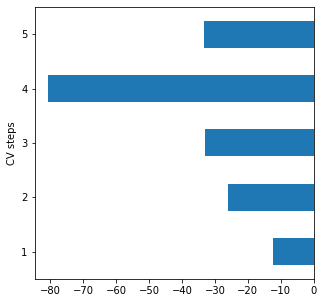

Plotting model performance
-----------------------------


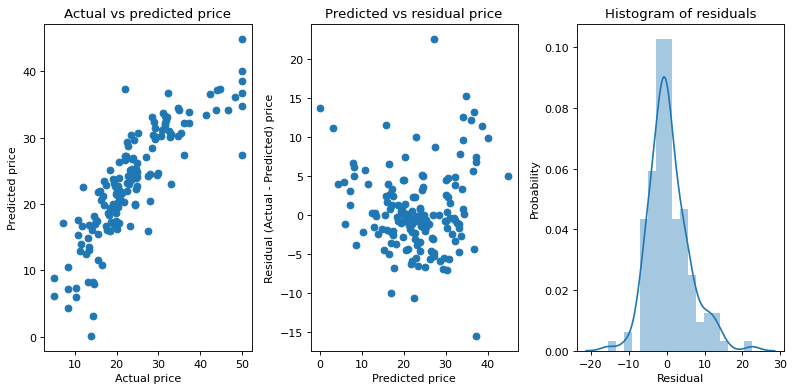


Plotting model coefficients
-----------------------------


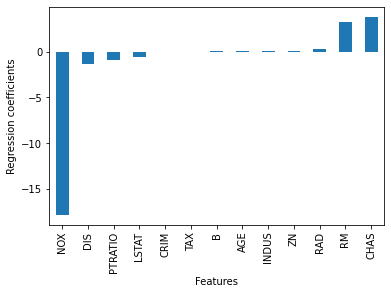

Learning curve
----------------------


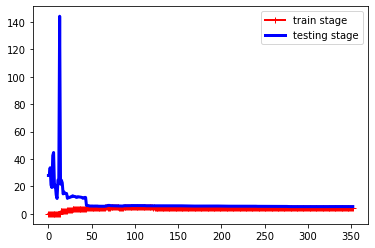

In [ ]:
#With X, y (AS IS) 
reg = LinearRegression()
model_evaluation(reg, X, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  32.303  , RMSE:  5.684  and R2_SCORE:  0.675
With Cross-validation strategy, the CV score (Mean):  33.96


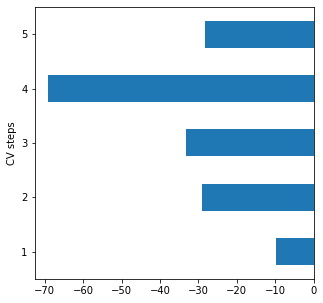

Plotting model performance
-----------------------------


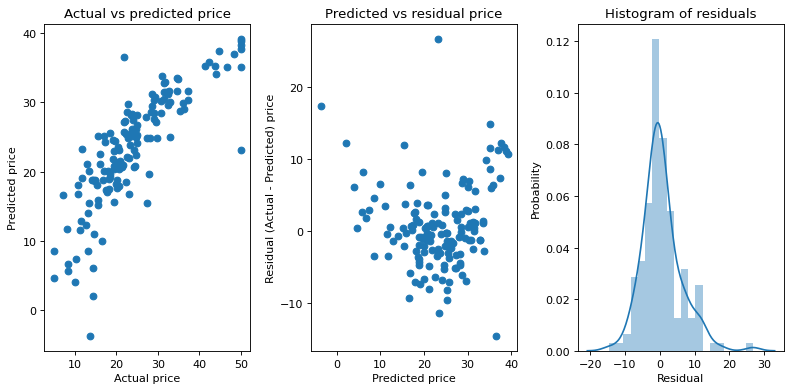


Plotting model coefficients
-----------------------------


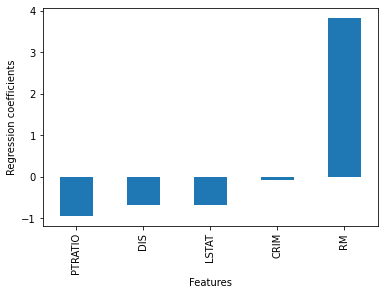

Learning curve
----------------------


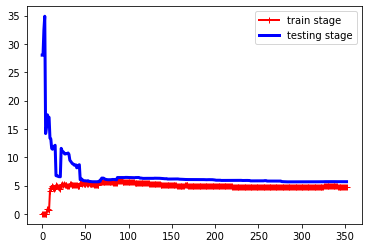

In [ ]:
#With X: AS PER FIRST CUTOFF LIST, y
X_first_cutoff =  X[important_features_first_cutoff.Feature.to_list()]
reg = LinearRegression()
model_evaluation(reg, X_first_cutoff, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  28.915  , RMSE:  5.377  and R2_SCORE:  0.709
With Cross-validation strategy, the CV score (Mean):  32.706


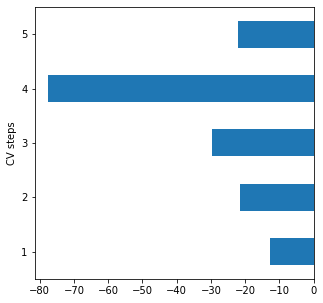

Plotting model performance
-----------------------------


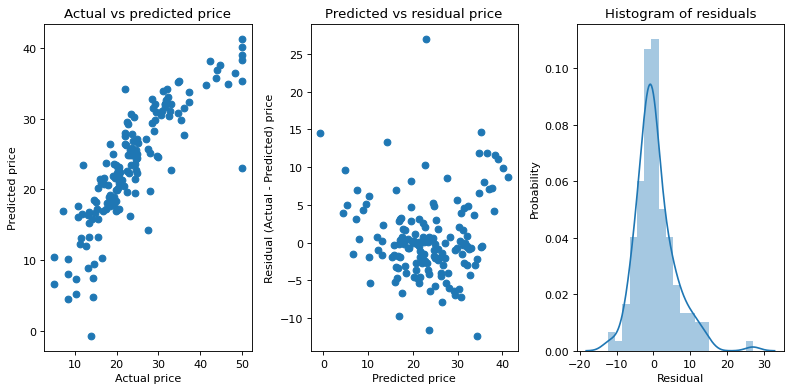


Plotting model coefficients
-----------------------------


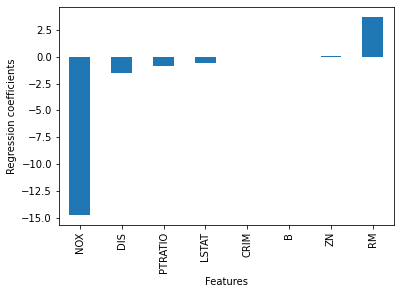

Learning curve
----------------------


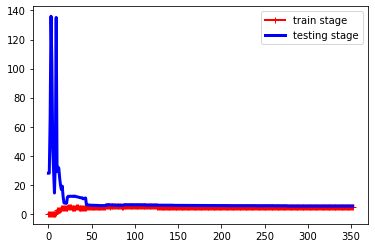

In [ ]:
#With X: AS PER SECOND CUTOFF LIST, y
X_second_cutoff =  X[important_features_second_cutoff.Feature.to_list()]
reg = LinearRegression()
model_evaluation(reg, X_second_cutoff, y, cv_action = 1)

###Linear regression after data transformation

**Quantile Transformation**

Model outcomes/results
##############################
MSE:  28.988  , RMSE:  5.384  and R2_SCORE:  0.708
With Cross-validation strategy, the CV score (Mean):  30.857


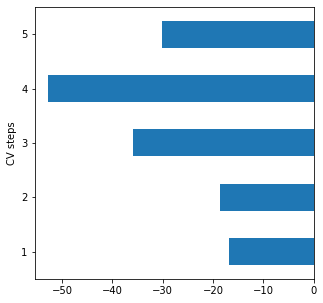

Plotting model performance
-----------------------------


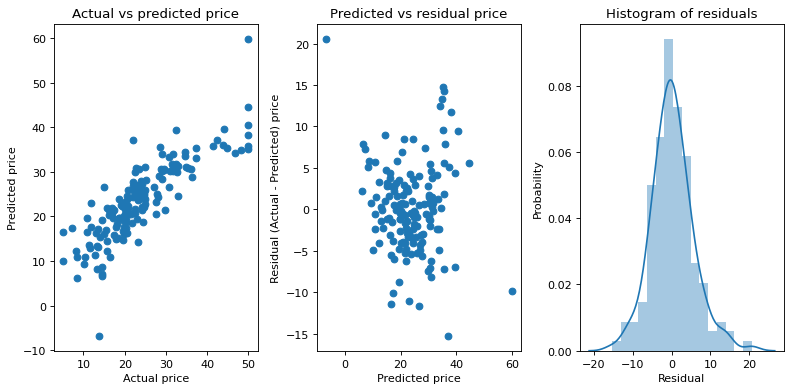


Plotting model coefficients
-----------------------------


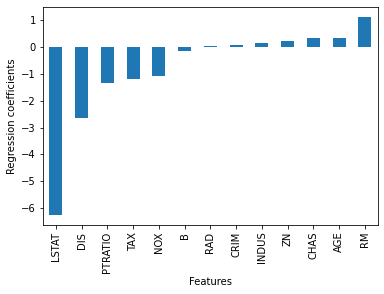

Learning curve
----------------------


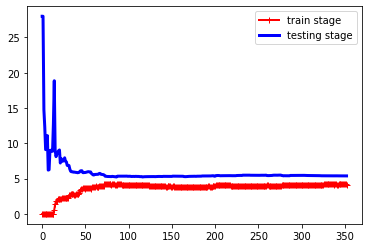

In [ ]:
trans_ct = QuantileTransformer(n_quantiles=100, output_distribution='normal')
X_qt = pd.DataFrame(trans_ct.fit_transform(X),columns = X.columns)
model_evaluation(reg, X_qt, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  32.058  , RMSE:  5.662  and R2_SCORE:  0.677
With Cross-validation strategy, the CV score (Mean):  32.174


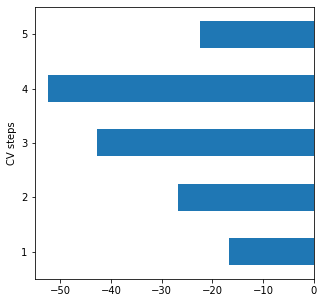

Plotting model performance
-----------------------------


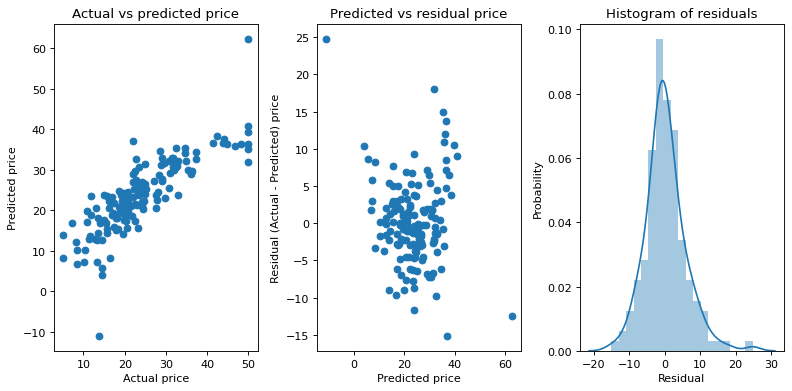


Plotting model coefficients
-----------------------------


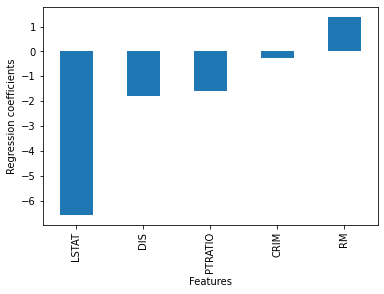

Learning curve
----------------------


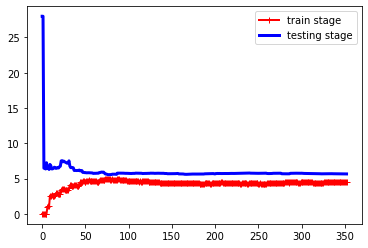

In [ ]:
X_qt_first_cutoff = pd.DataFrame(trans_ct.fit_transform(X_first_cutoff),columns = X_first_cutoff.columns)
model_evaluation(reg, X_qt_first_cutoff, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  29.757  , RMSE:  5.455  and R2_SCORE:  0.7
With Cross-validation strategy, the CV score (Mean):  30.855


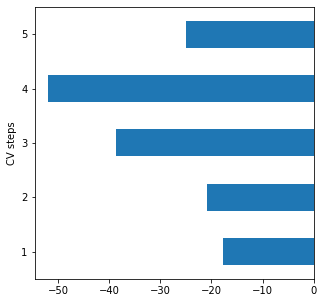

Plotting model performance
-----------------------------


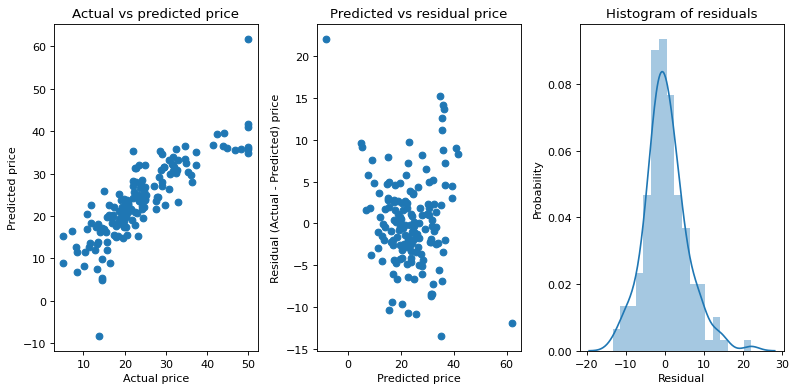


Plotting model coefficients
-----------------------------


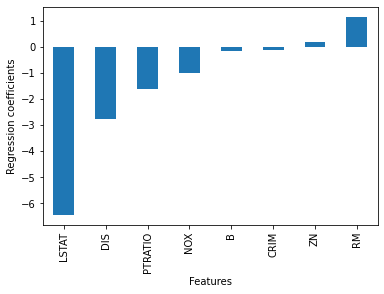

Learning curve
----------------------


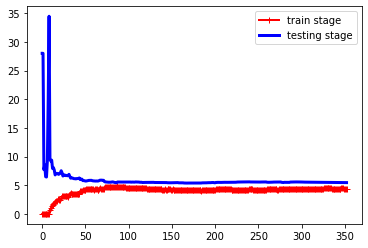

In [ ]:
X_qt_second_cutoff = pd.DataFrame(trans_ct.fit_transform(X_second_cutoff),columns = X_second_cutoff.columns)
model_evaluation(reg, X_qt_second_cutoff, y, cv_action = 1)

**Standard Scaler**

Model outcomes/results
##############################
MSE:  28.548  , RMSE:  5.343  and R2_SCORE:  0.712
With Cross-validation strategy, the CV score (Mean):  37.132


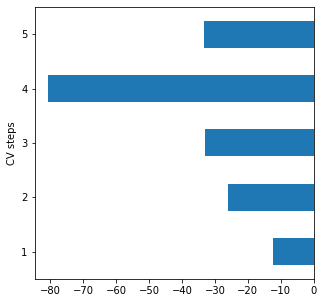

Plotting model performance
-----------------------------


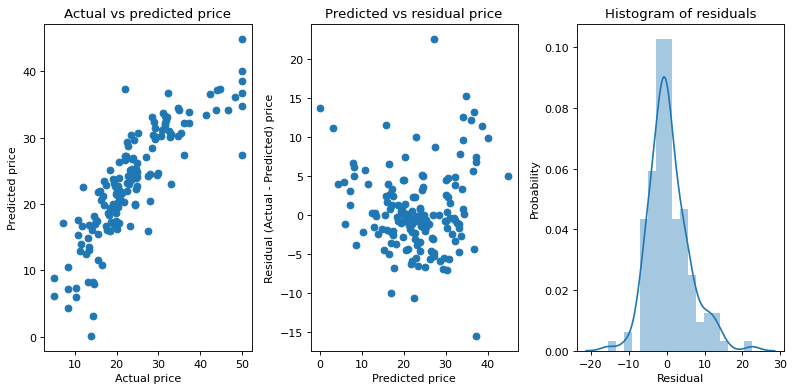


Plotting model coefficients
-----------------------------


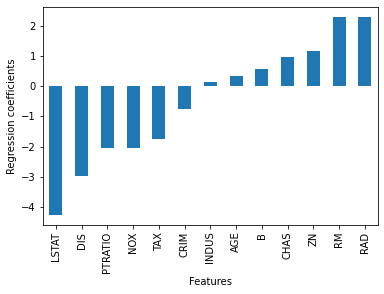

Learning curve
----------------------


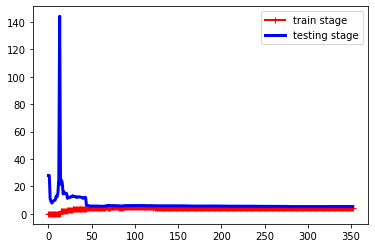

In [ ]:
scaler = StandardScaler()
X_sc = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
model_evaluation(reg, X_sc, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  32.303  , RMSE:  5.684  and R2_SCORE:  0.675
With Cross-validation strategy, the CV score (Mean):  33.96


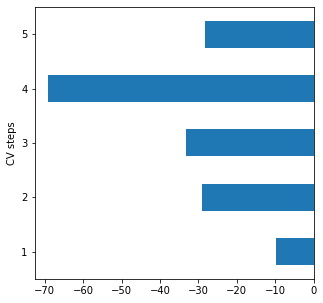

Plotting model performance
-----------------------------


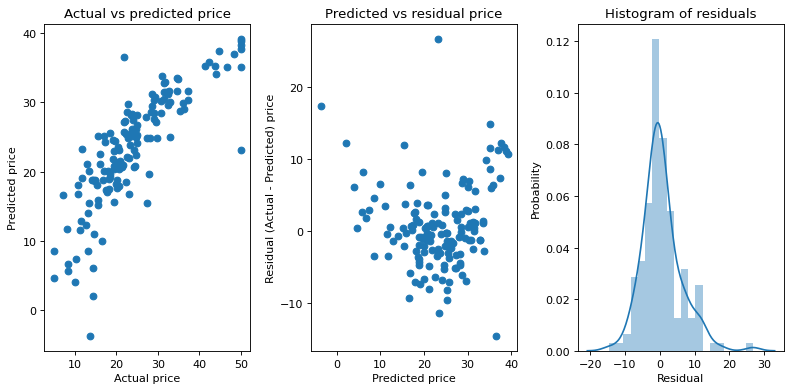


Plotting model coefficients
-----------------------------


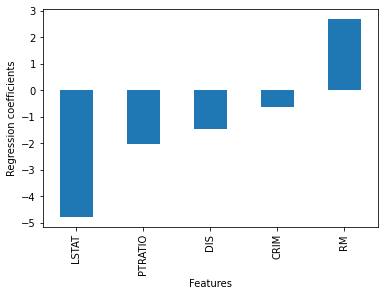

Learning curve
----------------------


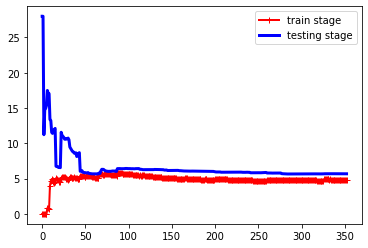

In [ ]:
X_sc_first_cutoff = pd.DataFrame(scaler.fit_transform(X_first_cutoff),columns = X_first_cutoff.columns)
model_evaluation(reg, X_sc_first_cutoff, y, cv_action = 1)

Model outcomes/results
##############################
MSE:  28.915  , RMSE:  5.377  and R2_SCORE:  0.709
With Cross-validation strategy, the CV score (Mean):  32.706


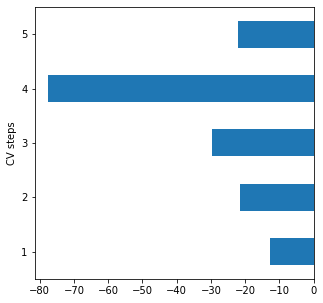

Plotting model performance
-----------------------------


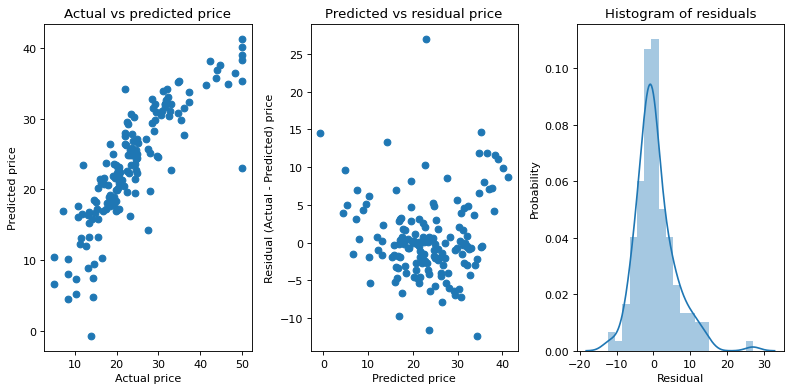


Plotting model coefficients
-----------------------------


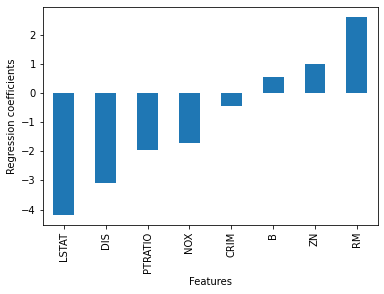

Learning curve
----------------------


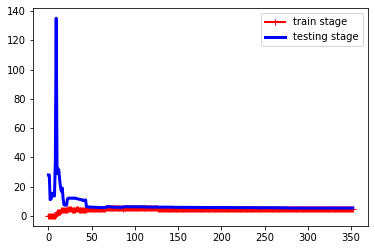

In [ ]:
X_sc_second_cutoff = pd.DataFrame(scaler.fit_transform(X_second_cutoff),columns = X_second_cutoff.columns)
model_evaluation(reg, X_sc_second_cutoff, y, cv_action = 1)

**MinMax Scaler**

Model outcomes/results
##############################
MSE:  28.548  , RMSE:  5.343  and R2_SCORE:  0.712
With Cross-validation strategy, the CV score (Mean):  37.132


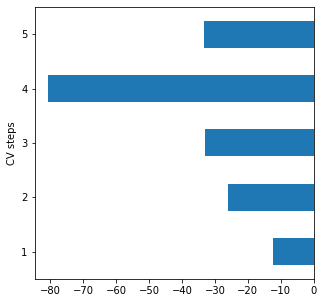

Plotting model performance
-----------------------------


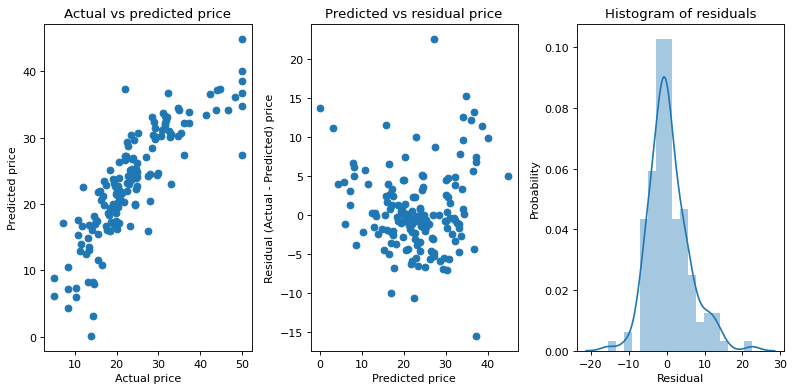


Plotting model coefficients
-----------------------------


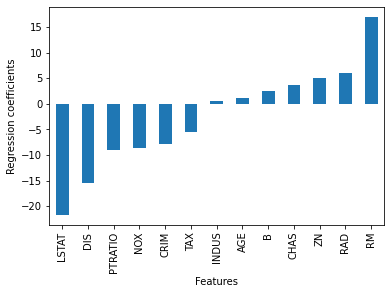

Learning curve
----------------------


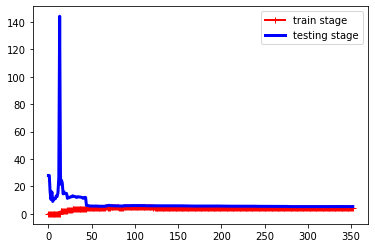

In [ ]:
mmscaler = MinMaxScaler()
X_mm = pd.DataFrame(mmscaler.fit_transform(X),columns = X.columns)
model_evaluation(reg, X_mm, y, cv_action = 1)

In [ ]:
# define the pipeline
trans_ct = QuantileTransformer(n_quantiles=100, output_distribution='normal')
reg_model = LinearRegression()
pipeline = Pipeline(steps=[('t', trans_ct), ('m', reg_model)])
# evaluate the pipeline
cv = KFold(n_splits=5, random_state=SEED)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report pipeline performance
print('Mean score: %.3f (std deviation: %.3f)' % (np.abs(np.mean(n_scores)), np.std(n_scores)))

Mean score: 29.913 (std deviation: 14.134)


In [ ]:
# define the pipeline
trans_std = MinMaxScaler(feature_range=(0,1))
reg_model = LinearRegression()
pipeline = Pipeline(steps=[('t', trans_std), ('m', reg_model)])
# evaluate the pipeline
cv = KFold(n_splits=5, random_state=SEED)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report pipeline performance
print('Mean score: %.3f (std deviation: %.3f)' % (np.abs(np.mean(n_scores)), np.std(n_scores)))

Mean score: 37.132 (std deviation: 23.092)


In [ ]:
# define the pipeline
trans_ct = QuantileTransformer(n_quantiles=100, output_distribution='normal')
reg_model = LinearRegression()
pipeline = Pipeline(steps=[('t', trans_ct), ('m', reg_model)])
# evaluate the pipeline
cv = KFold(n_splits=5, random_state=SEED)
n_scores = cross_val_score(pipeline, X_first_cutoff, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report pipeline performance
print('Mean score: %.3f (std deviation: %.3f)' % (np.abs(np.mean(n_scores)), np.std(n_scores)))

Mean score: 32.814 (std deviation: 14.652)


In [ ]:
# define the pipeline
trans_ct = QuantileTransformer(n_quantiles=100, output_distribution='normal')
reg_model = LinearRegression()
pipeline = Pipeline(steps=[('t', trans_ct), ('m', reg_model)])
# evaluate the pipeline
cv = KFold(n_splits=5, random_state=SEED)
n_scores = cross_val_score(pipeline, X_second_cutoff, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report pipeline performance
print('Mean score: %.3f (std deviation: %.3f)' % (np.abs(np.mean(n_scores)), np.std(n_scores)))

Mean score: 31.211 (std deviation: 13.845)


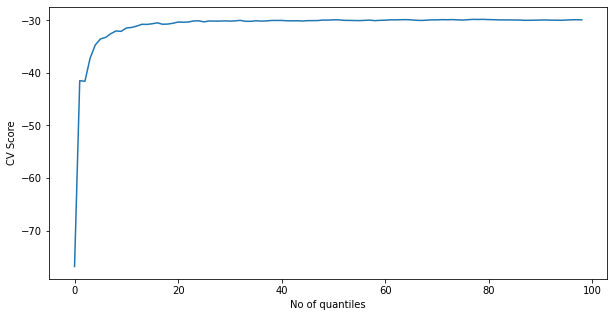

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,100): #No of quantile to change
		# define the pipeline
		trans_iter = QuantileTransformer(n_quantiles=i, output_distribution='normal')
		model_iter = LinearRegression()
		models[str(i)] = Pipeline(steps=[('t', trans_iter), ('m', model_iter)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = KFold(n_splits=5, random_state=SEED)
	scores_iter = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
	return scores_iter
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(np.mean(scores))
	#print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,5))
plt.plot(results)
plt.xlabel("No of quantiles")
plt.ylabel("CV Score")
plt.show()

##SOME IMPORTANT CODE SNIPPETS

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    


In [ ]:
# Import data
df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

###Fitting distribution to a predictor variable

In [ ]:

def fit_distribution(df,column,pct,pct_lower):
    y_std,size,y_org = standarise(df,column,pct,pct_lower)
    
    chi_square_statistics = []
    # create 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [ ]:
fit_distribution(bos,'MEDV',0.99,0.01)

(0.978878952298197, -1.7832146640728337, 1.3883473512178457)

(-2.2967037923558794e-16, 0.9999999999999999)

(76.18181610803504, 59.50168876199268, 59.94454104923045)

(4.80004987782203, 2410896.424119925, -2.1802248676330174, 1097063.6094508418)

(0.10046194879683529, -3.107343032945483, 30.930544962095276)

(-1.7832146640728335, 4.989119461176211)

(5.252334021314914, -2.2490593075038543, 0.42820134675305327)

(-1.7832146640728335, 1.7832146640728332)

(0.31927336237428616, -3.0169095372473556, 2.8661859807496777)

(0.8726643169247601, -2.519820166239276e-16, 0.9813789880986407)

(0.23831279767760183, -1.9292374417120741, 5.335314751544187)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
2   weibull_max         9.0
8       lognorm        10.0
4      invgauss        11.0
6         gamma        12.0
9      pearson3        12.0
3          beta        14.0
1          norm        51.0
10       triang        66.0
5      

In [ ]:
#Validating the above findings
y_std,len_y,y = standarise(bos, 'MEDV',0.99,0.01)

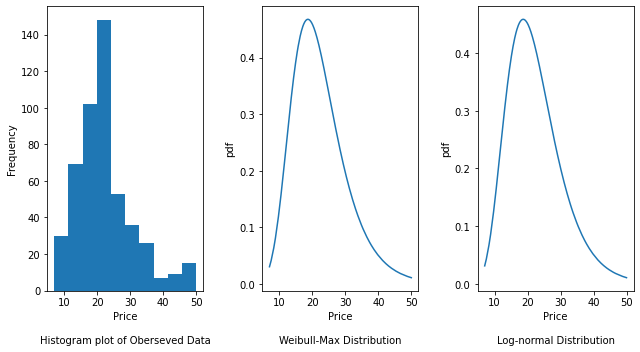

In [ ]:
#
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,weibull_max.pdf(y_std,76.18181610803504, 59.50168876199268, 59.94454104923045))
axes[1].set_xlabel('Price\n\nWeibull-Max Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,lognorm.pdf(y_std,0.31927336237428616, -3.0169095372473556, 2.8661859807496777))
axes[2].set_xlabel('Price\n\nLog-normal Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

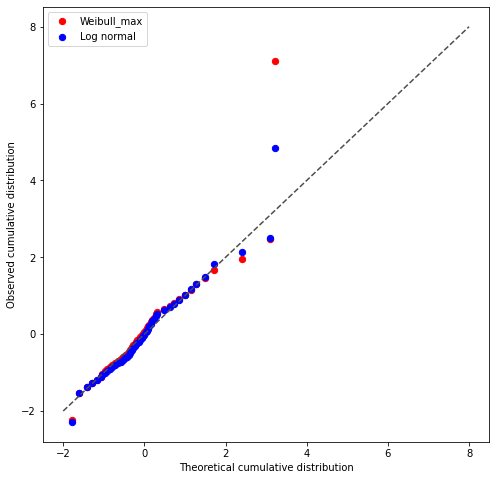

In [ ]:
data_points = weibull_max.rvs(76.18181610803504, 59.50168876199268, 59.94454104923045, size=2000)   
data_points2 = lognorm.rvs(0.31927336237428616, -3.0169095372473556, 2.8661859807496777,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 8], [-2, 8], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_expon= np.percentile(data_points, percentile_bins)


percentile_cutoffs_invgauss = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_invgauss,c='r',label = 'Weibull_max',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_expon,c='b',label = 'Log normal',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()

In [ ]:
#best_fitted_dist1, best_fitted_dist2 = get_most_fitted_distribution(bos,'B',0.99,0.01)
#best_fitted_dist1, best_fitted_dist2

('beta', 'weibull_min')

In [ ]:
#Selecting columns in a dataframe having numeric type
bos.select_dtypes('number').columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
#Filtering data for normality (used above)

#Method 1 (using .loc condition) Working perfectly
#stat.loc[(abs(stat['Skew'])<=0.1) | ((stat['Kurtosis'] >= 0.95*3) & (stat['Kurtosis']< 1.05*3))]

#Method 2 (using .loc and np.where condition) Working perfectly
#idx = np.where((abs(stat['Skew'])<=0.1) | ((stat['Kurtosis'] >= 0.95*3) & (stat['Kurtosis']< 1.05*3)))
#stat.iloc[idx]

#Method 3 (query method) Working perfectly
#stat.query('abs(Skew) <= 0.1 | (Kurtosis >= 0.95 * 3 & Kurtosis < 1.05 * 3)')

#Method 4 (Pandas boolean indexing) Working perfectly
#stat[(abs(stat['Skew'])<=0.1) | ((stat['Kurtosis'] >= 0.95*3) & (stat['Kurtosis']< 1.05*3))]

#Method 5 (eval method) Working perfectly
#stat[stat.eval("abs(Skew) <= 0.1 | (Kurtosis >= 0.95 * 3 & Kurtosis < 1.05 * 3)")]

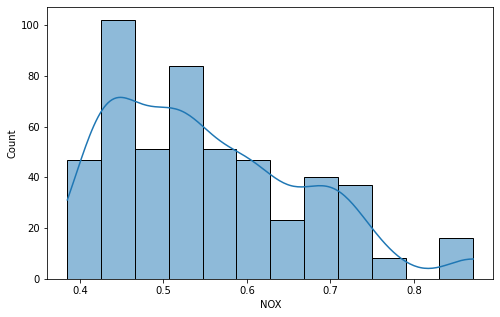

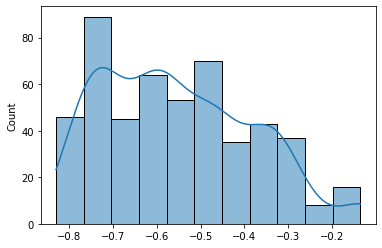

In [ ]:
#Displaying individual feature distribution and converting it to normal
plt.figure(figsize=(8,5))
sns.histplot(data=bos, x="NOX", kde = True)
plt.show()

# power transform
from scipy.stats import boxcox
data = boxcox(bos["NOX"], 0.3)
# histogram
sns.histplot(data=data, kde = True)
plt.show()